In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_app = pd.read_csv("./Dataset/application_train.csv")
test_app = pd.read_csv("./Dataset/application_test.csv")
bureau = pd.read_csv("./Dataset/bureau.csv")
bureau_bal = pd.read_csv("./Dataset/bureau_balance.csv")
credit_card = pd.read_csv("./Dataset/credit_card_balance.csv")
install_pay = pd.read_csv("./Dataset/installments_payments.csv")
pos_cash = pd.read_csv("./Dataset/POS_CASH_balance.csv")
prev_app = pd.read_csv("./Dataset/previous_application.csv")

# Data Exploration

## 1. Core Table

#### 1.1 Basic Information

In [3]:
# Basic statistics
# Memory usage
train_app.memory_usage(deep=True)

Index                              128
SK_ID_CURR                     2460088
TARGET                         2460088
NAME_CONTRACT_TYPE            20749632
CODE_GENDER                   17835646
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      2460088
AMT_REQ_CREDIT_BUREAU_WEEK     2460088
AMT_REQ_CREDIT_BUREAU_MON      2460088
AMT_REQ_CREDIT_BUREAU_QRT      2460088
AMT_REQ_CREDIT_BUREAU_YEAR     2460088
Length: 123, dtype: int64

In [4]:
train_app.shape

(307511, 122)

In [5]:
train_app["SK_ID_CURR"].nunique()

307511

In [6]:
# Data type distribution
train_app.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [7]:
# Display first 5 lines
train_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

#### 1.2 Target Variable Analysis

In [8]:
# Target variables analysis
target_counts = train_app['TARGET'].value_counts()
target_counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [9]:
target_pct = train_app['TARGET'].value_counts(normalize=True) * 100
target_pct

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

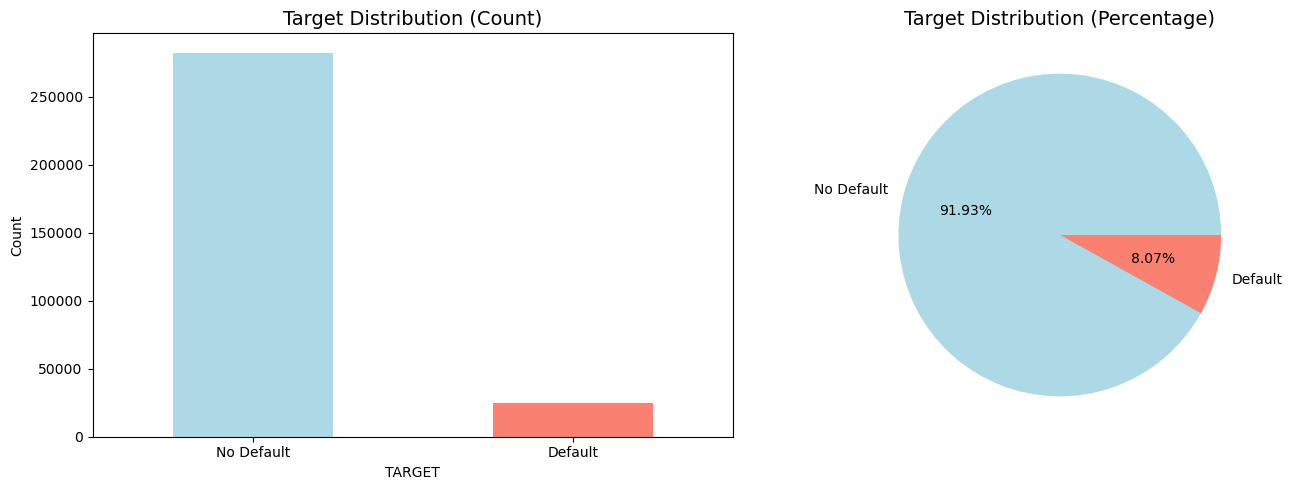

In [10]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
target_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Target Distribution (Count)', fontsize=14)
axes[0].set_xticklabels(['No Default', 'Default'], rotation=0)
axes[0].set_ylabel('Count')

axes[1].pie(target_counts.values, labels=['No Default', 'Default'], 
           autopct='%1.2f%%', colors=['lightblue', 'salmon'])
axes[1].set_title('Target Distribution (Percentage)', fontsize=14)

    
plt.tight_layout()
plt.show()

#### 1.3 Missing Values Analysis

In [11]:
# Missing values analysis
missing_data = train_app.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
missing_data

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [12]:
# DataFrame for columns of missing Value
missing_df = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percent': (missing_data / len(train_app)) * 100,
        'Data_Type': [str(train_app[col].dtype) for col in missing_data.index]
    })
missing_df

Missing_Count  Missing_Percent Data_Type
COMMONAREA_MEDI                  214865        69.872297   float64
COMMONAREA_AVG                   214865        69.872297   float64
COMMONAREA_MODE                  214865        69.872297   float64
NONLIVINGAPARTMENTS_MODE         213514        69.432963   float64
NONLIVINGAPARTMENTS_AVG          213514        69.432963   float64
...                                 ...              ...       ...
EXT_SOURCE_2                        660         0.214626   float64
AMT_GOODS_PRICE                     278         0.090403   float64
AMT_ANNUITY                          12         0.003902   float64
CNT_FAM_MEMBERS                       2         0.000650   float64
DAYS_LAST_PHONE_CHANGE                1         0.000325   float64

[67 rows x 3 columns]

In [13]:
high_missing = missing_df[missing_df['Missing_Percent'] > 50]
medium_missing = missing_df[(missing_df['Missing_Percent'] > 10) & (missing_df['Missing_Percent'] <= 50)]
low_missing = missing_df[missing_df['Missing_Percent'] <= 10]

print(f"\nHigh Missing (>50%): {len(high_missing)} columns")
print(f"Medium Missing (10-50%): {len(medium_missing)} columns") 
print(f"Low Missing (≤10%): {len(low_missing)} columns")


High Missing (>50%): 41 columns
Medium Missing (10-50%): 16 columns
Low Missing (≤10%): 10 columns


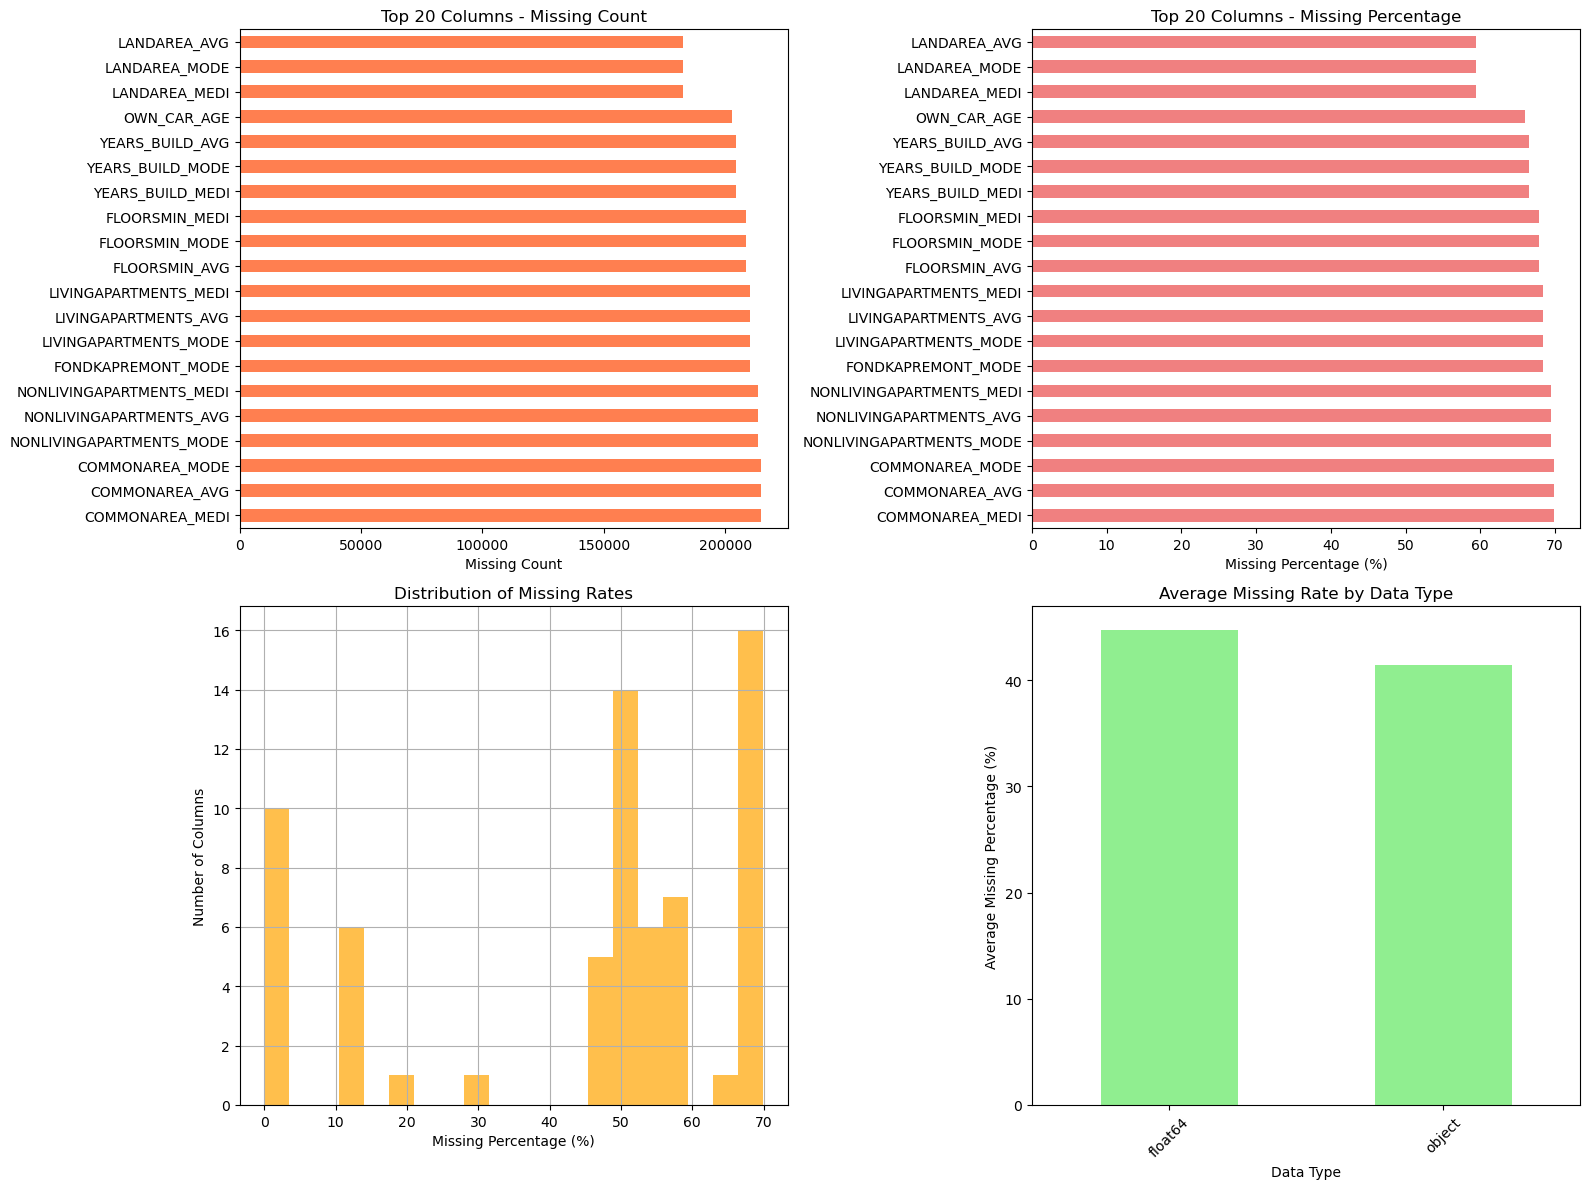

In [14]:
# Visualization of missing values
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_20_missing = missing_df.head(20)
top_20_missing['Missing_Count'].plot(kind='barh', ax=axes[0,0], color='coral')
axes[0,0].set_title('Top 20 Columns - Missing Count')
axes[0,0].set_xlabel('Missing Count')

top_20_missing['Missing_Percent'].plot(kind='barh', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Top 20 Columns - Missing Percentage')
axes[0,1].set_xlabel('Missing Percentage (%)')

missing_df['Missing_Percent'].hist(bins=20, ax=axes[1,0], alpha=0.7, color='orange')
axes[1,0].set_title('Distribution of Missing Rates')
axes[1,0].set_xlabel('Missing Percentage (%)')
axes[1,0].set_ylabel('Number of Columns')

missing_by_type = missing_df.groupby('Data_Type')['Missing_Percent'].mean().sort_values(ascending=False)
missing_by_type.plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Average Missing Rate by Data Type')
axes[1,1].set_xlabel('Data Type')
axes[1,1].set_ylabel('Average Missing Percentage (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 1.4 Feature Distribution Analysis

In [15]:
# Define key features (can be modified later)
key_features = {
    'Financial': ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'],
    'Personal': ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED'],
    'Application': ['HOUR_APPR_PROCESS_START', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION']
}


Financial Features:


AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06

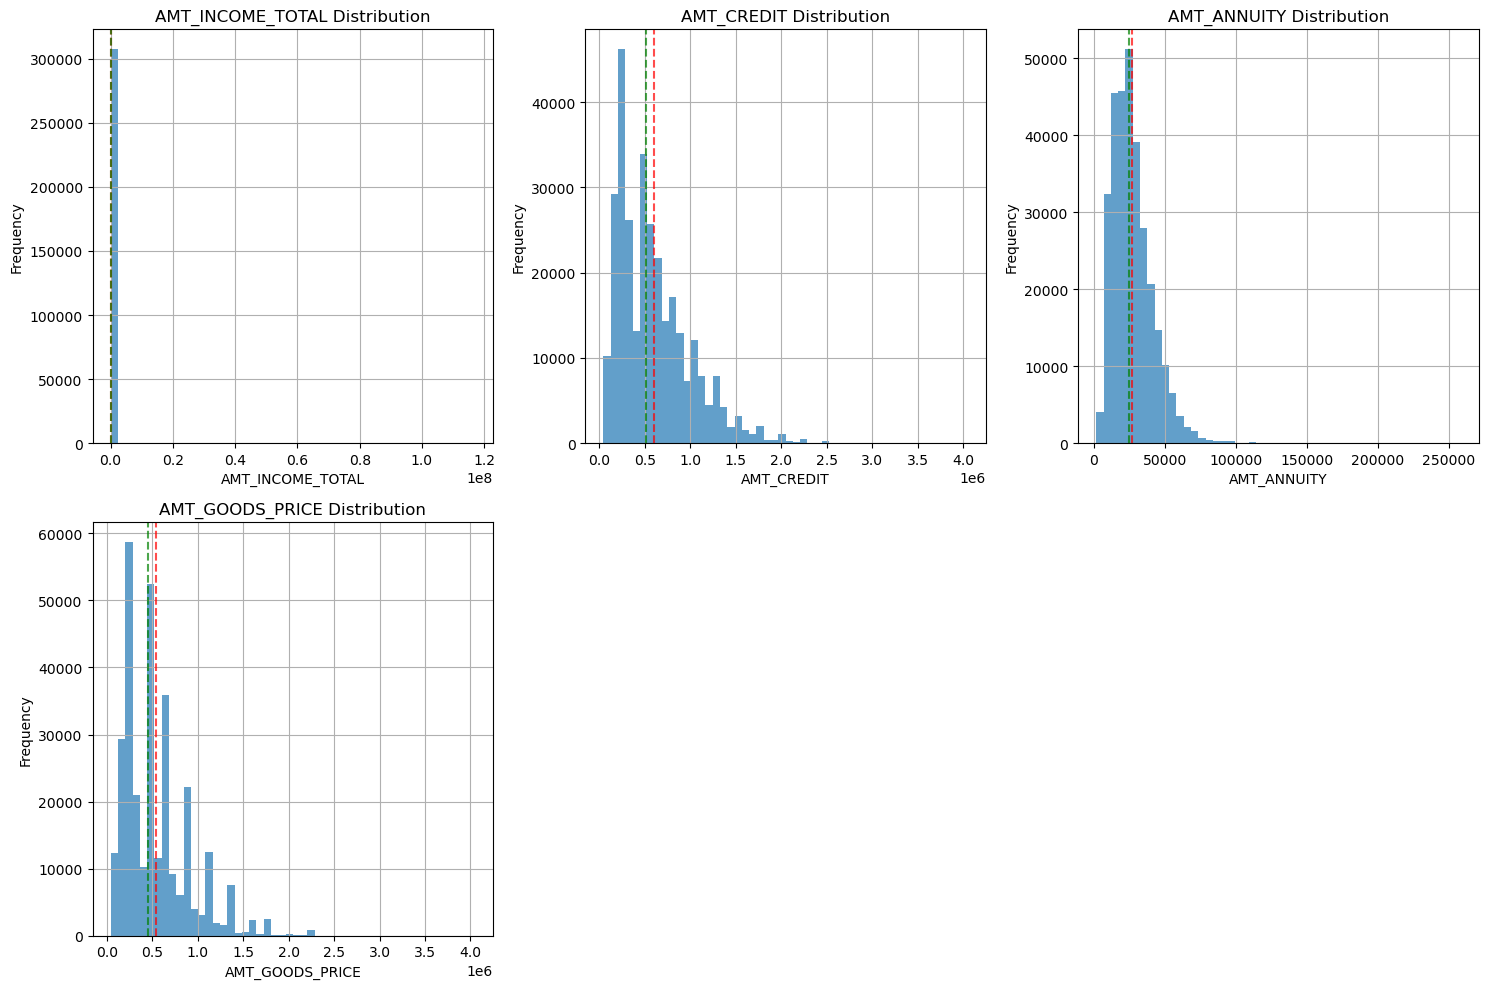


Personal Features:


CNT_CHILDREN  CNT_FAM_MEMBERS     DAYS_BIRTH  DAYS_EMPLOYED
count  307511.000000    307509.000000  307511.000000  307511.000000
mean        0.417052         2.152665  -16036.995067   63815.045904
std         0.722121         0.910682    4363.988632  141275.766519
min         0.000000         1.000000  -25229.000000  -17912.000000
25%         0.000000         2.000000  -19682.000000   -2760.000000
50%         0.000000         2.000000  -15750.000000   -1213.000000
75%         1.000000         3.000000  -12413.000000    -289.000000
max        19.000000        20.000000   -7489.000000  365243.000000

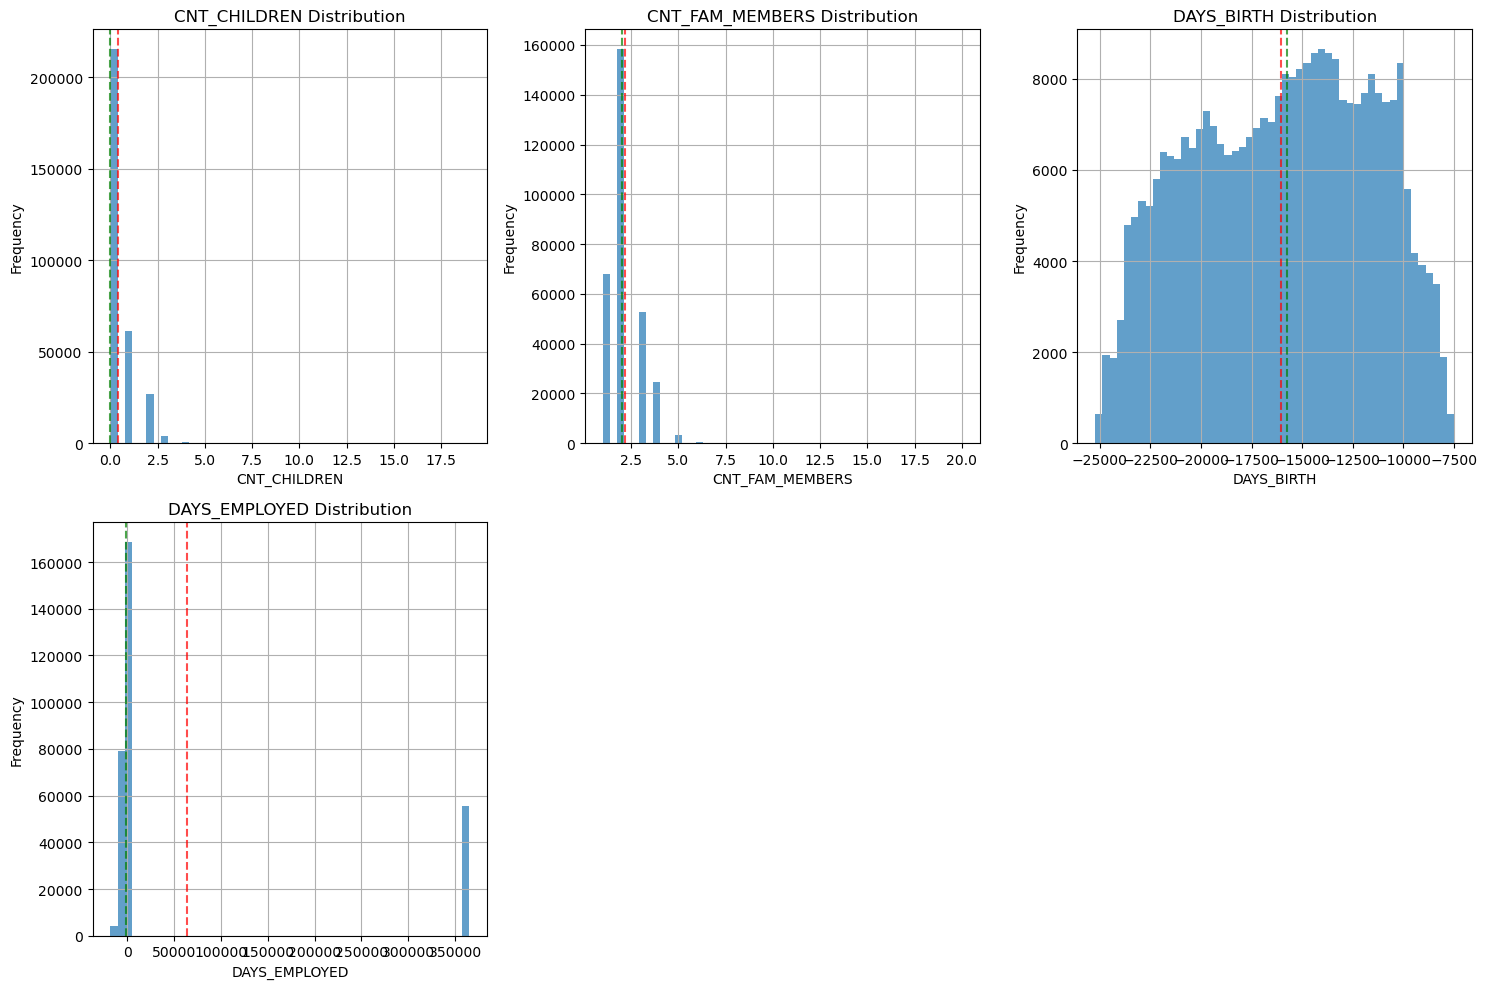


Application Features:


HOUR_APPR_PROCESS_START  REGION_POPULATION_RELATIVE  DAYS_REGISTRATION
count            307511.000000               307511.000000      307511.000000
mean                 12.063419                    0.020868       -4986.120328
std                   3.265832                    0.013831        3522.886321
min                   0.000000                    0.000290      -24672.000000
25%                  10.000000                    0.010006       -7479.500000
50%                  12.000000                    0.018850       -4504.000000
75%                  14.000000                    0.028663       -2010.000000
max                  23.000000                    0.072508           0.000000

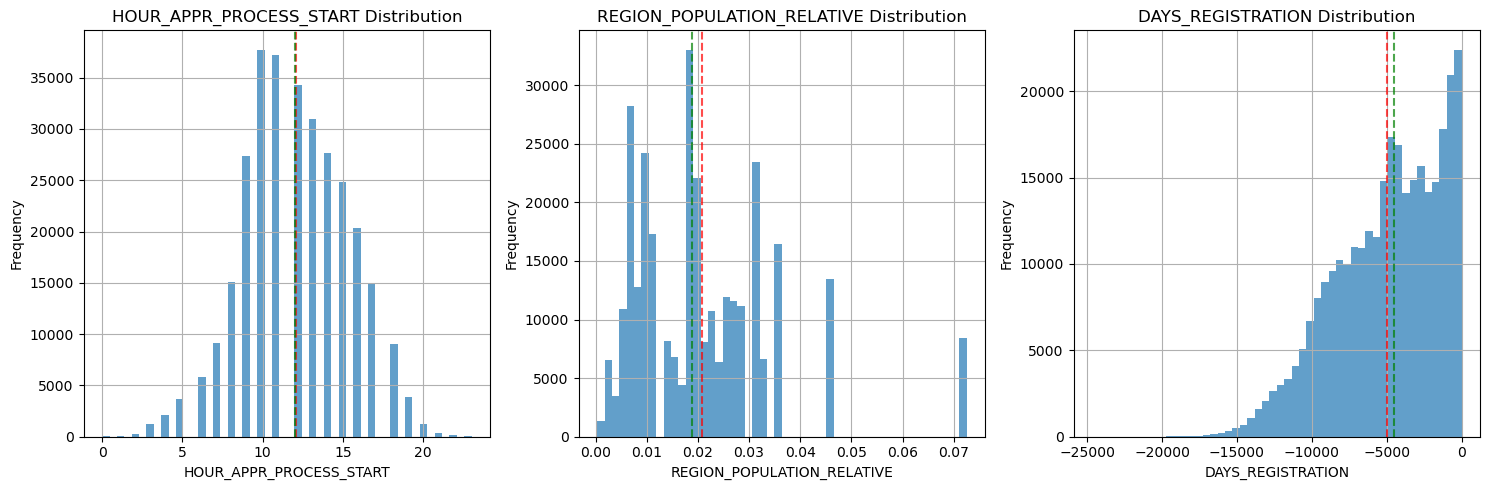

In [16]:
# Analyze each group
for group_name, features in key_features.items():
    existing_features = [f for f in features if f in train_app.columns]
    if existing_features:
        print(f"\n{group_name} Features:")

        # Basic information
        stats_df = train_app[existing_features].describe()
        display(stats_df)

        # Visualization
        n_features = len(existing_features)
        n_cols = min(3, n_features)
        n_rows = (n_features + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1:
            axes = [axes] if n_features == 1 else axes
        else:
            axes = axes.ravel()
        
        for i, feature in enumerate(existing_features):
            if i < len(axes):
                # Histogram
                train_app[feature].hist(bins=50, alpha=0.7, ax=axes[i])
                axes[i].set_title(f'{feature} Distribution')
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('Frequency')
                
                # Add statistics information
                mean_val = train_app[feature].mean()
                median_val = train_app[feature].median()
                axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.0f}')
                axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.0f}')
                axes[i].legend
                
        for i in range(len(existing_features), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

#### 1.5 Categorical Feature Analysis

In [17]:
# Fetch categorical columns
categorical_cols = train_app.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']


 NAME_CONTRACT_TYPE:
  Unique values: 2
  Missing values: 0
  Top values:
    Cash loans: 278,232 (90.48%)
    Revolving loans: 29,279 (9.52%)


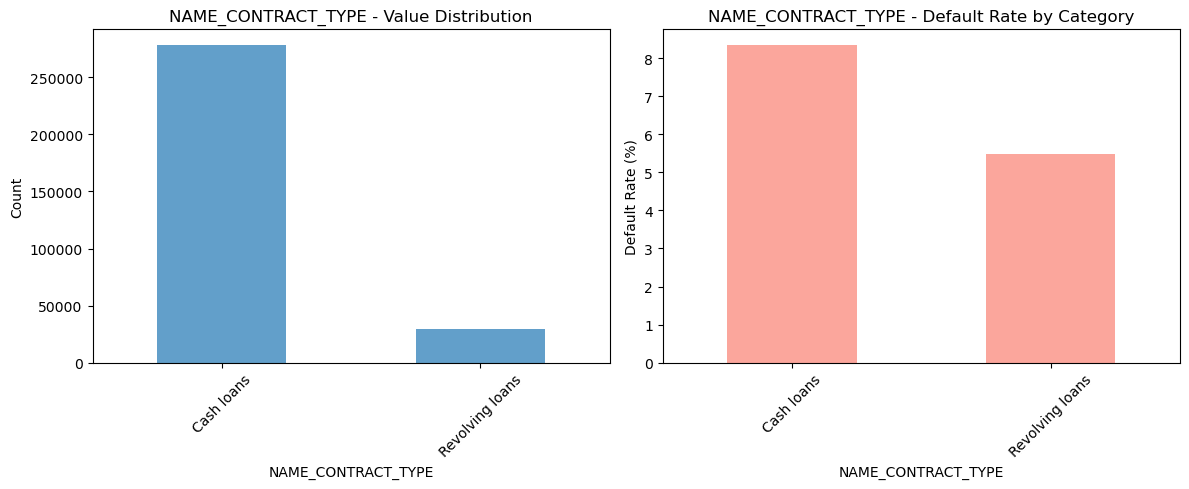


 CODE_GENDER:
  Unique values: 3
  Missing values: 0
  Top values:
    F: 202,448 (65.83%)
    M: 105,059 (34.16%)
    XNA: 4 (0.00%)


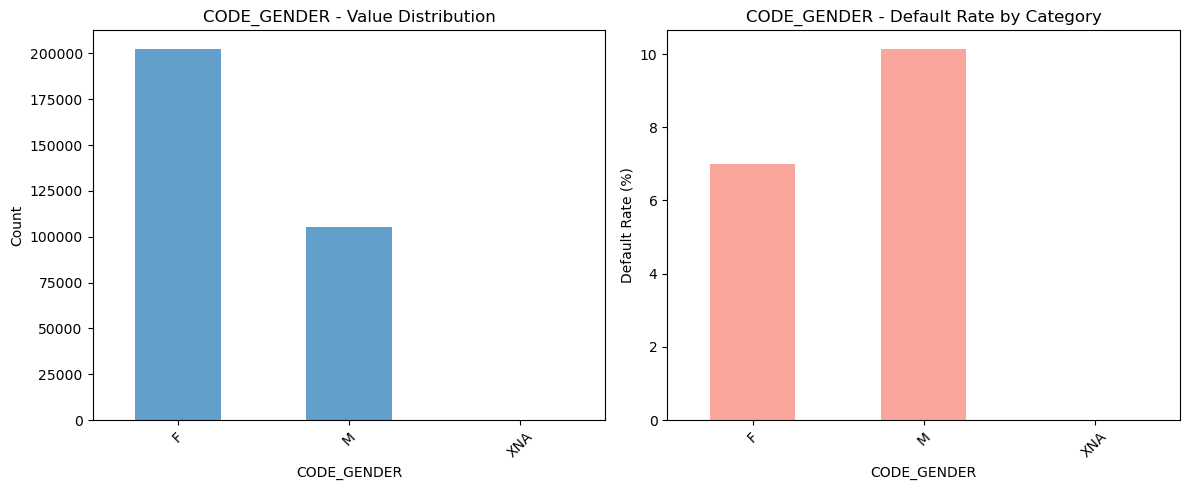


 FLAG_OWN_CAR:
  Unique values: 2
  Missing values: 0
  Top values:
    N: 202,924 (65.99%)
    Y: 104,587 (34.01%)


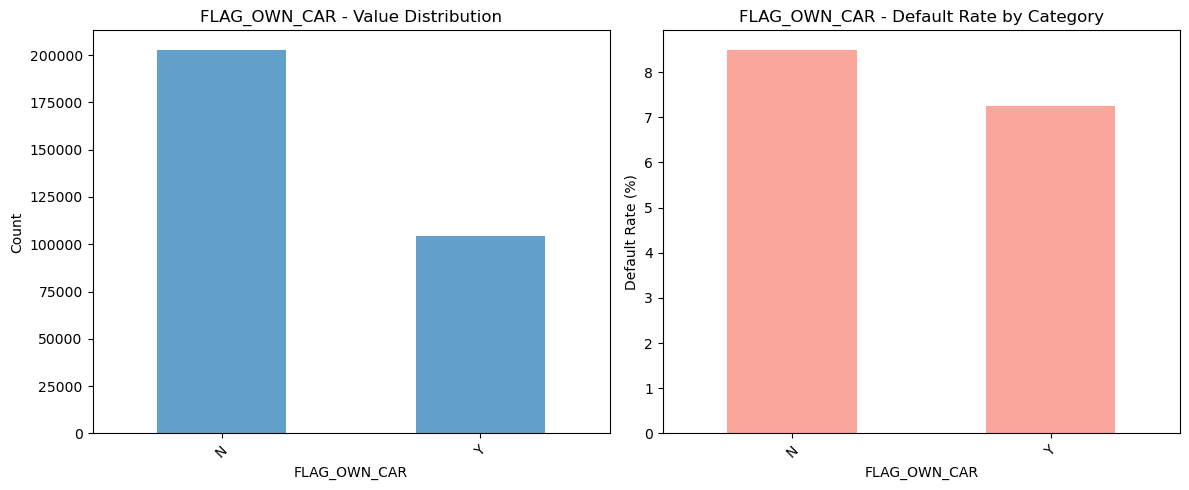


 FLAG_OWN_REALTY:
  Unique values: 2
  Missing values: 0
  Top values:
    Y: 213,312 (69.37%)
    N: 94,199 (30.63%)


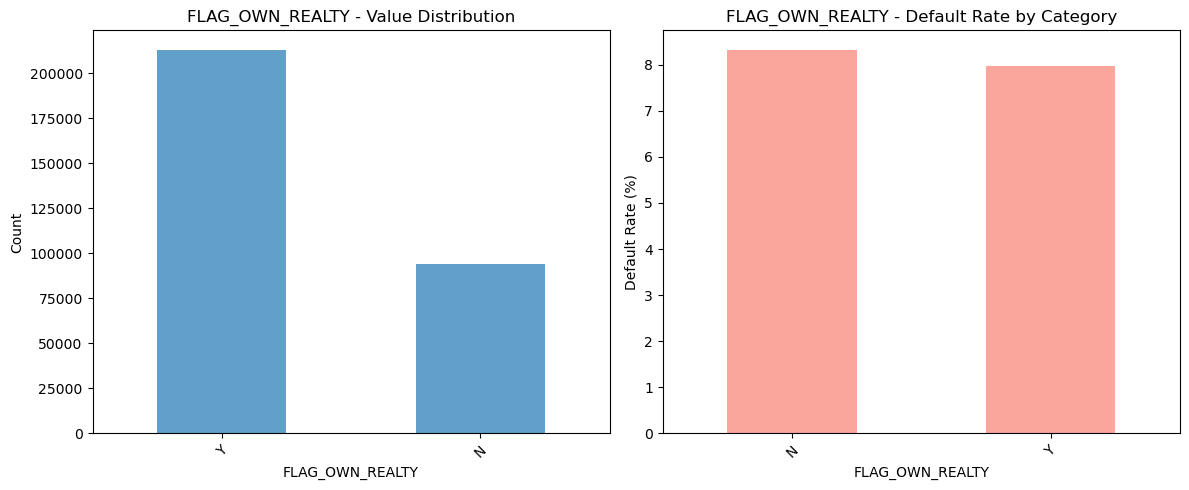


 NAME_TYPE_SUITE:
  Unique values: 7
  Missing values: 1292
  Top values:
    Unaccompanied: 248,526 (80.82%)
    Family: 40,149 (13.06%)
    Spouse, partner: 11,370 (3.70%)
    Children: 3,267 (1.06%)
    Other_B: 1,770 (0.58%)
    Other_A: 866 (0.28%)
    Group of people: 271 (0.09%)


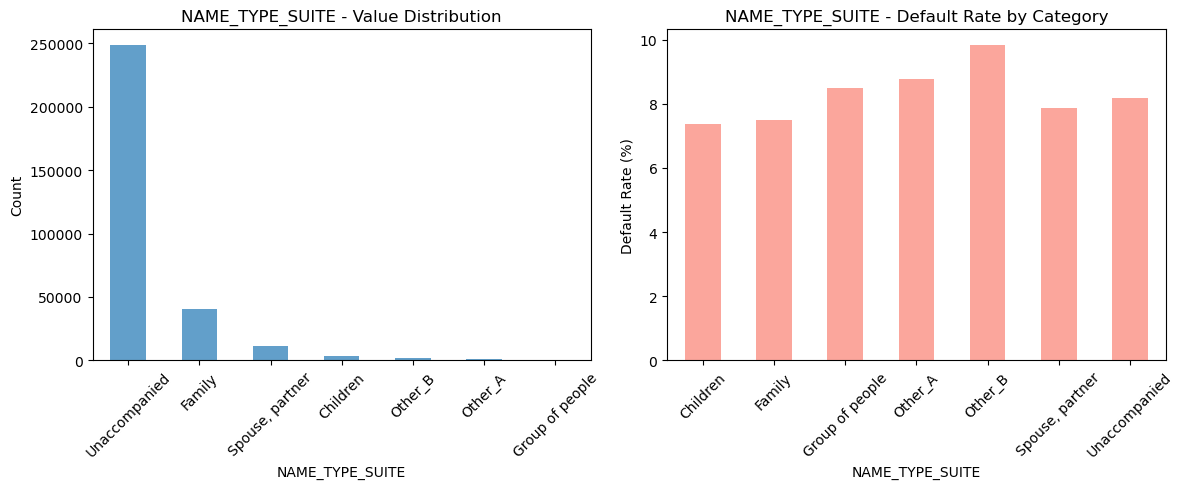


 NAME_INCOME_TYPE:
  Unique values: 8
  Missing values: 0
  Top values:
    Working: 158,774 (51.63%)
    Commercial associate: 71,617 (23.29%)
    Pensioner: 55,362 (18.00%)
    State servant: 21,703 (7.06%)
    Unemployed: 22 (0.01%)
    Student: 18 (0.01%)
    Businessman: 10 (0.00%)
    Maternity leave: 5 (0.00%)


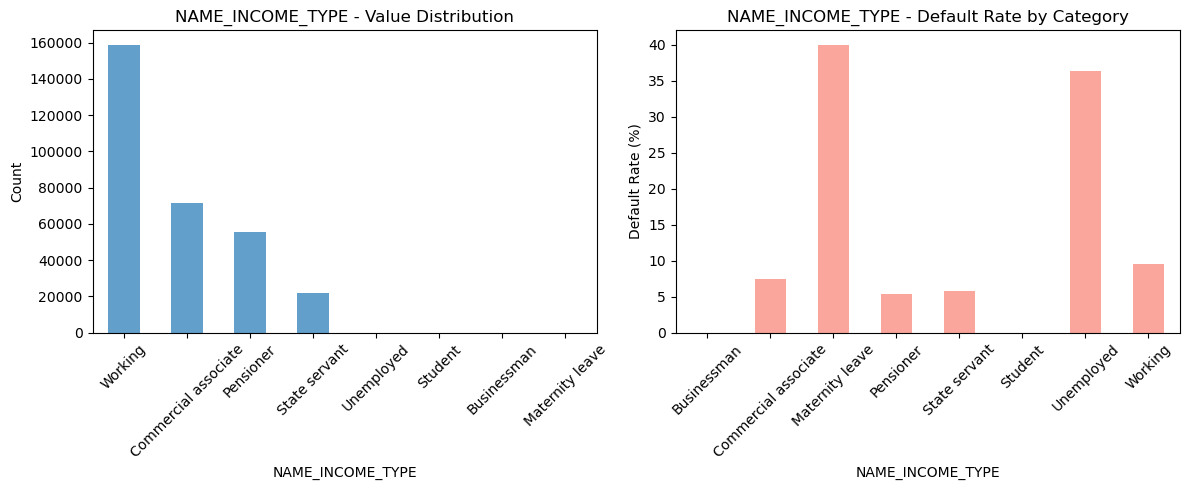


 NAME_EDUCATION_TYPE:
  Unique values: 5
  Missing values: 0
  Top values:
    Secondary / secondary special: 218,391 (71.02%)
    Higher education: 74,863 (24.34%)
    Incomplete higher: 10,277 (3.34%)
    Lower secondary: 3,816 (1.24%)
    Academic degree: 164 (0.05%)


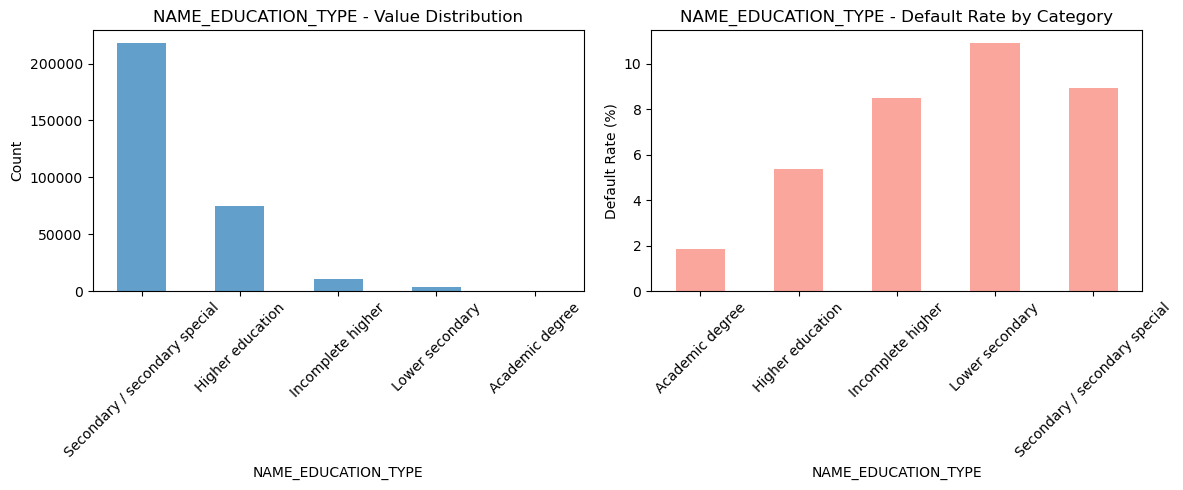


 NAME_FAMILY_STATUS:
  Unique values: 6
  Missing values: 0
  Top values:
    Married: 196,432 (63.88%)
    Single / not married: 45,444 (14.78%)
    Civil marriage: 29,775 (9.68%)
    Separated: 19,770 (6.43%)
    Widow: 16,088 (5.23%)
    Unknown: 2 (0.00%)


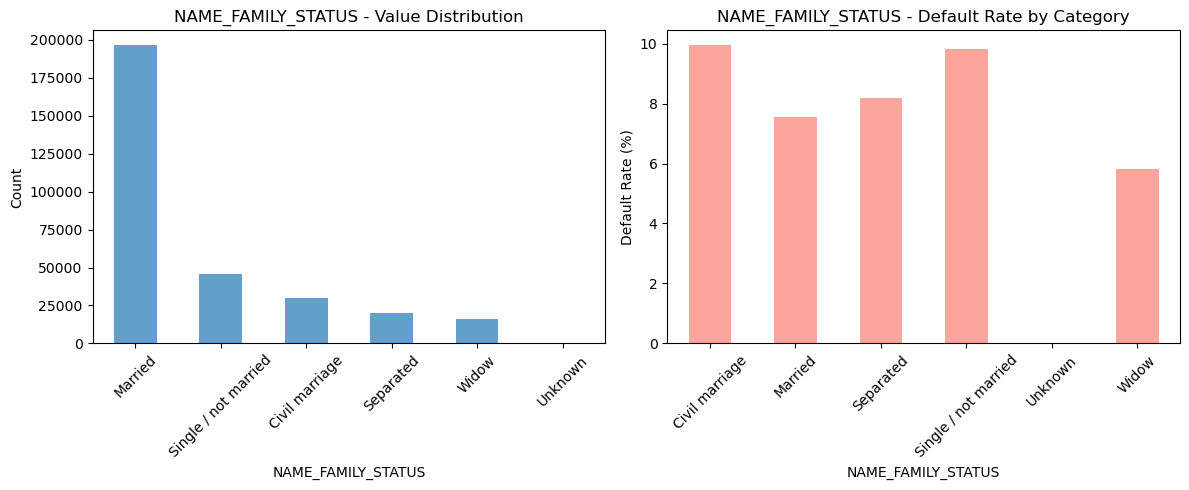


 NAME_HOUSING_TYPE:
  Unique values: 6
  Missing values: 0
  Top values:
    House / apartment: 272,868 (88.73%)
    With parents: 14,840 (4.83%)
    Municipal apartment: 11,183 (3.64%)
    Rented apartment: 4,881 (1.59%)
    Office apartment: 2,617 (0.85%)
    Co-op apartment: 1,122 (0.36%)


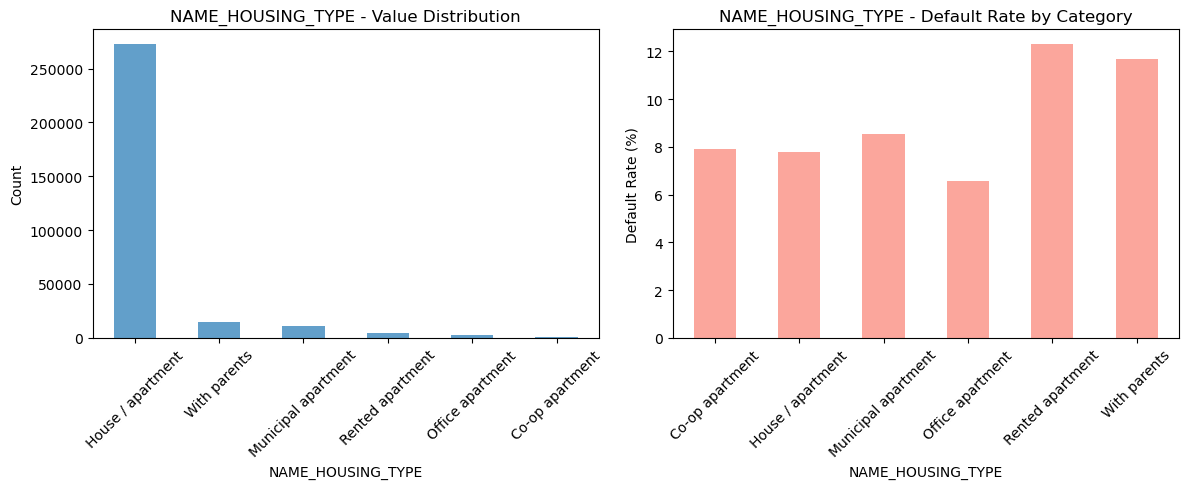


 OCCUPATION_TYPE:
  Unique values: 18
  Missing values: 96391
  Top values:
    Laborers: 55,186 (17.95%)
    Sales staff: 32,102 (10.44%)
    Core staff: 27,570 (8.97%)
    Managers: 21,371 (6.95%)
    Drivers: 18,603 (6.05%)
    High skill tech staff: 11,380 (3.70%)
    Accountants: 9,813 (3.19%)
    Medicine staff: 8,537 (2.78%)
    Security staff: 6,721 (2.19%)
    Cooking staff: 5,946 (1.93%)

 WEEKDAY_APPR_PROCESS_START:
  Unique values: 7
  Missing values: 0
  Top values:
    TUESDAY: 53,901 (17.53%)
    WEDNESDAY: 51,934 (16.89%)
    MONDAY: 50,714 (16.49%)
    THURSDAY: 50,591 (16.45%)
    FRIDAY: 50,338 (16.37%)
    SATURDAY: 33,852 (11.01%)
    SUNDAY: 16,181 (5.26%)


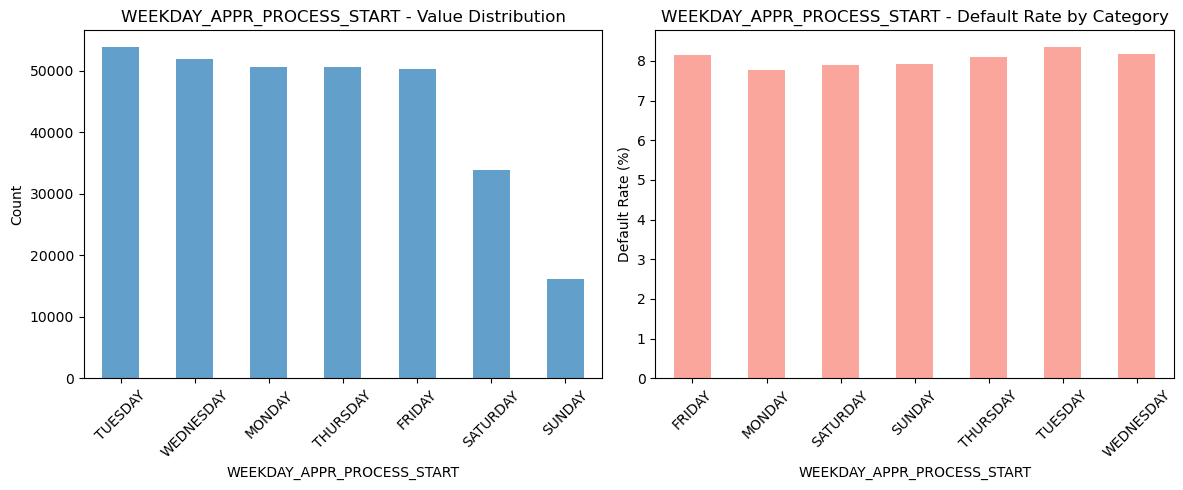


 ORGANIZATION_TYPE:
  Unique values: 58
  Missing values: 0
  Top values:
    Business Entity Type 3: 67,992 (22.11%)
    XNA: 55,374 (18.01%)
    Self-employed: 38,412 (12.49%)
    Other: 16,683 (5.43%)
    Medicine: 11,193 (3.64%)
    Business Entity Type 2: 10,553 (3.43%)
    Government: 10,404 (3.38%)
    School: 8,893 (2.89%)
    Trade: type 7: 7,831 (2.55%)
    Kindergarten: 6,880 (2.24%)

 FONDKAPREMONT_MODE:
  Unique values: 4
  Missing values: 210295
  Top values:
    reg oper account: 73,830 (24.01%)
    reg oper spec account: 12,080 (3.93%)
    not specified: 5,687 (1.85%)
    org spec account: 5,619 (1.83%)


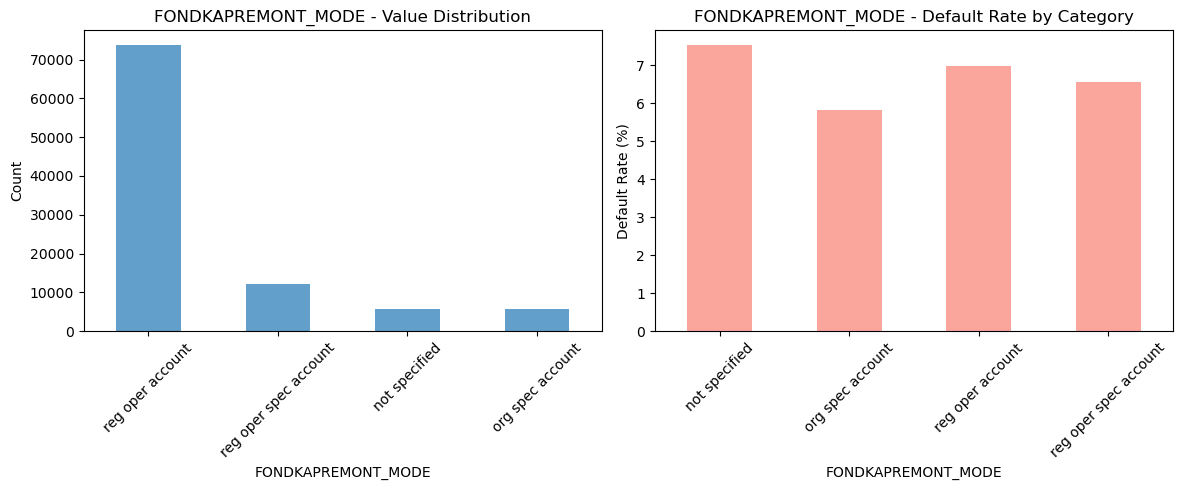


 HOUSETYPE_MODE:
  Unique values: 3
  Missing values: 154297
  Top values:
    block of flats: 150,503 (48.94%)
    specific housing: 1,499 (0.49%)
    terraced house: 1,212 (0.39%)


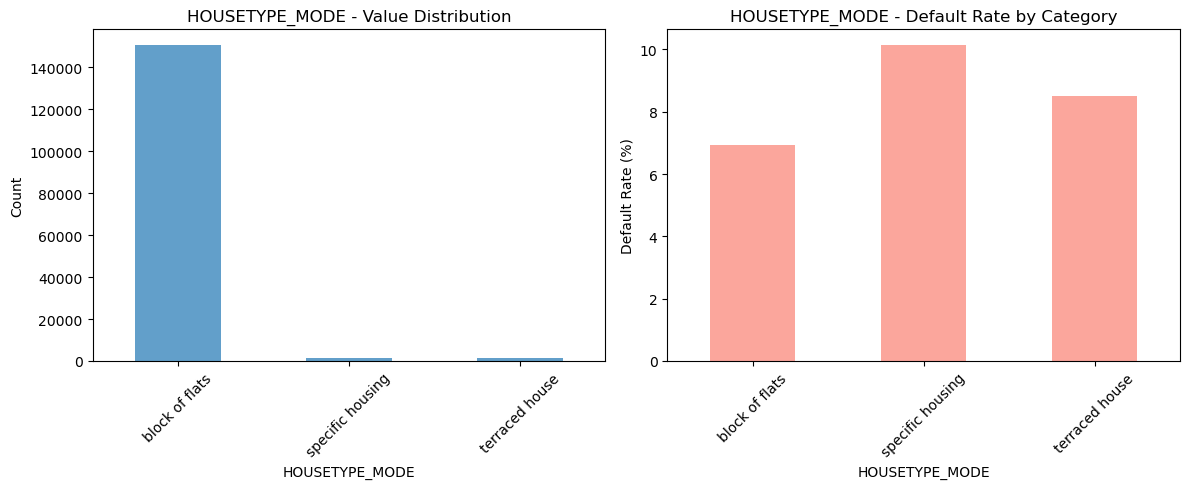


 WALLSMATERIAL_MODE:
  Unique values: 7
  Missing values: 156341
  Top values:
    Panel: 66,040 (21.48%)
    Stone, brick: 64,815 (21.08%)
    Block: 9,253 (3.01%)
    Wooden: 5,362 (1.74%)
    Mixed: 2,296 (0.75%)
    Monolithic: 1,779 (0.58%)
    Others: 1,625 (0.53%)


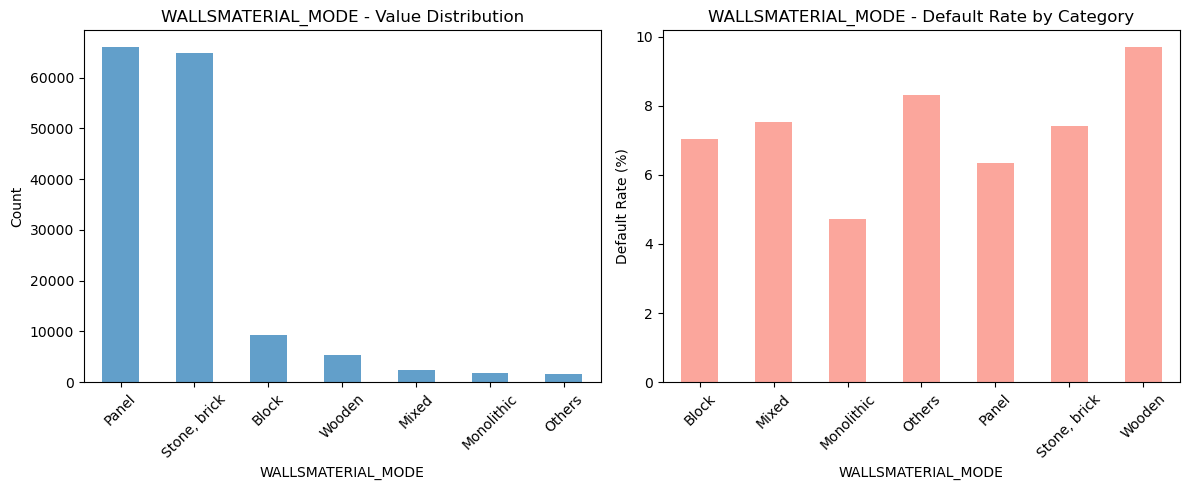


 EMERGENCYSTATE_MODE:
  Unique values: 2
  Missing values: 145755
  Top values:
    No: 159,428 (51.84%)
    Yes: 2,328 (0.76%)


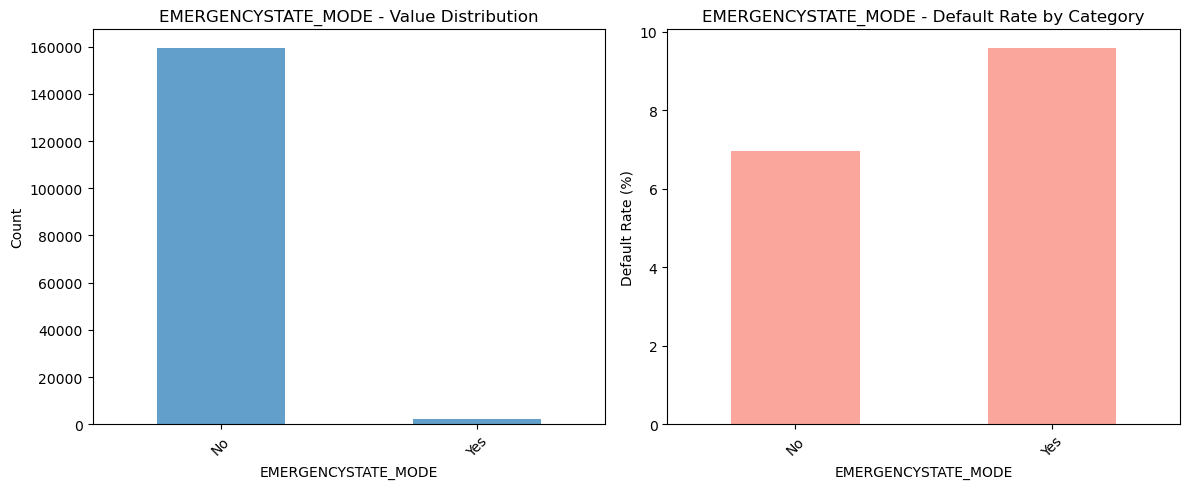

In [18]:
# Analyze the categorical variables
for col in categorical_cols:
    print(f"\n {col}:")

    # Basic information
    unique_count = train_app[col].nunique()
    missing_count = train_app[col].isnull().sum()

    print(f"  Unique values: {unique_count}")
    print(f"  Missing values: {missing_count}")

    # Value distribution
    value_counts = train_app[col].value_counts().head(10)
    print(f"  Top values:")
    for val, count in value_counts.items():
        pct = (count / len(train_app)) * 100
        print(f"    {val}: {count:,} ({pct:.2f}%)")

    # Visualization
    if unique_count <= 10:

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', alpha=0.7)
        plt.title(f'{col} - Value Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Relationship with Target Variable
        plt.subplot(1, 2, 2)
        target_by_cat = train_app.groupby(col)['TARGET'].mean() * 100
        target_by_cat.plot(kind='bar', color='salmon', alpha=0.7)
        plt.title(f'{col} - Default Rate by Category')
        plt.xlabel(col)
        plt.ylabel('Default Rate (%)')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

#### 1.5 Outlier Detection Analysis

In [19]:
# Choose core numeric columns (can be modified later)
numeric_cols_for_outliers = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                           'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN']
existing_numeric = [col for col in numeric_cols_for_outliers if col in train_app.columns]

In [20]:
outlier_summary = []

for col in existing_numeric:
    # IQR
    Q1 = train_app[col].quantile(0.25)
    Q3 = train_app[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_app[(train_app[col] < lower_bound) | (train_app[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(train_app)) * 100

    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percent': outlier_pct,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Min_Value': train_app[col].min(),
        'Max_Value': train_app[col].max()
    })

    print(f"\n {col}:")
    print(f"  Outliers: {outlier_count:,} ({outlier_pct:.2f}%)")
    print(f"  Range: [{train_app[col].min():.0f}, {train_app[col].max():.0f}]")
    print(f"  IQR bounds: [{lower_bound:.0f}, {upper_bound:.0f}]")


 AMT_INCOME_TOTAL:
  Outliers: 14,035 (4.56%)
  Range: [25650, 117000000]
  IQR bounds: [-22500, 337500]

 AMT_CREDIT:
  Outliers: 6,562 (2.13%)
  Range: [45000, 4050000]
  IQR bounds: [-537975, 1616625]

 AMT_ANNUITY:
  Outliers: 7,504 (2.44%)
  Range: [1616, 258026]
  IQR bounds: [-10584, 61704]

 DAYS_BIRTH:
  Outliers: 0 (0.00%)
  Range: [-25229, -7489]
  IQR bounds: [-30586, -1510]

 DAYS_EMPLOYED:
  Outliers: 72,217 (23.48%)
  Range: [-17912, 365243]
  IQR bounds: [-6466, 3418]

 CNT_CHILDREN:
  Outliers: 4,272 (1.39%)
  Range: [0, 19]
  IQR bounds: [-2, 2]


In [21]:
outlier_df = pd.DataFrame(outlier_summary)
outlier_df

Column  Outlier_Count  Outlier_Percent  Lower_Bound  Upper_Bound  \
0  AMT_INCOME_TOTAL          14035         4.564064     -22500.0     337500.0   
1        AMT_CREDIT           6562         2.133907    -537975.0    1616625.0   
2       AMT_ANNUITY           7504         2.440238     -10584.0      61704.0   
3        DAYS_BIRTH              0         0.000000     -30585.5      -1509.5   
4     DAYS_EMPLOYED          72217        23.484363      -6466.5       3417.5   
5      CNT_CHILDREN           4272         1.389219         -1.5          2.5   

   Min_Value    Max_Value  
0    25650.0  117000000.0  
1    45000.0    4050000.0  
2     1615.5     258025.5  
3   -25229.0      -7489.0  
4   -17912.0     365243.0  
5        0.0         19.0

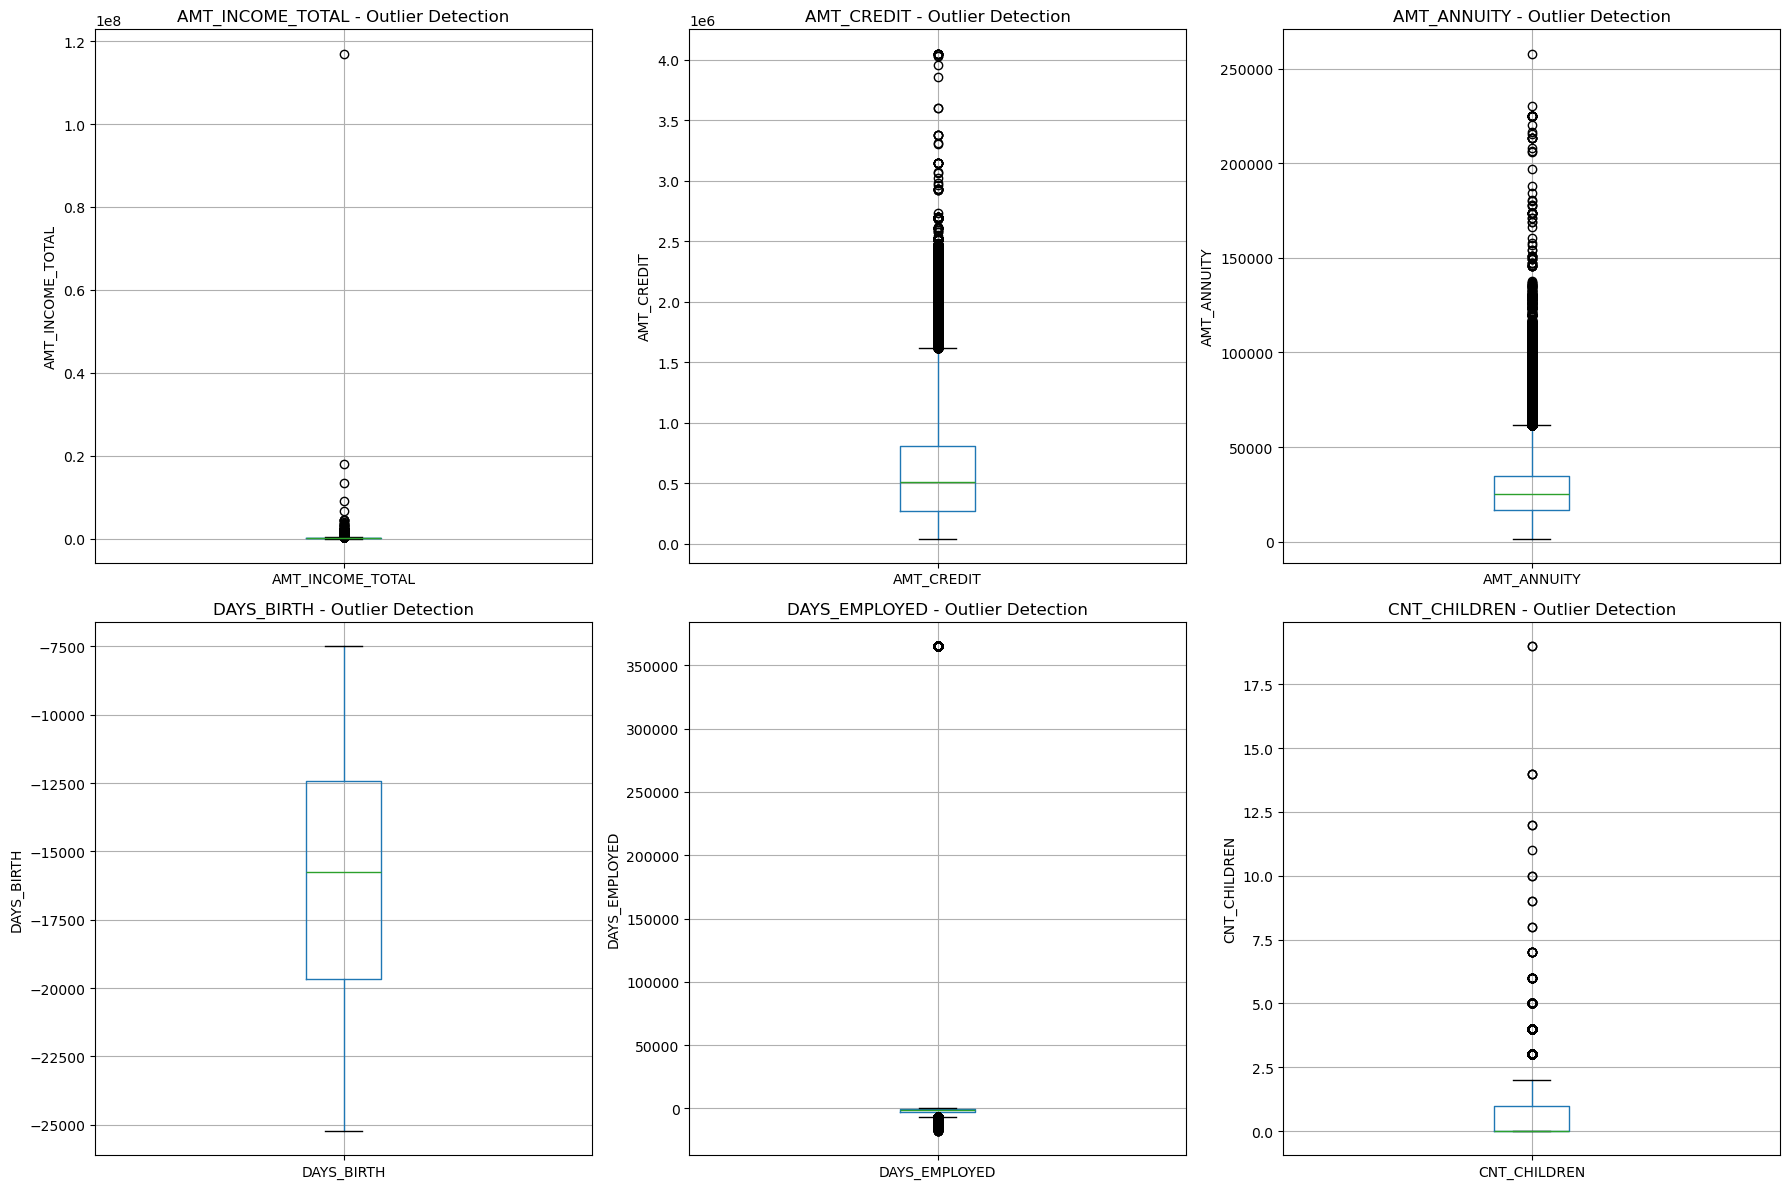

In [22]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(existing_numeric):
    if i < len(axes):
        # Boxplot
        train_app.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'{col} - Outlier Detection')
        axes[i].set_ylabel(col)

for i in range(len(existing_numeric), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

#### 1.6 Feature vs Target Relationship

In [23]:
numeric_cols = train_app.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'TARGET' and col != 'SK_ID_CURR']

In [24]:
# Compute correlation coefficient
correlations = []
for col in numeric_cols[:20]: 
    corr = train_app[col].corr(train_app['TARGET'])
    correlations.append({'Feature': col, 'Correlation': corr})

corr_df = pd.DataFrame(correlations).sort_values('Correlation', key=abs, ascending=False)
print("Top correlations with TARGET:")
display(corr_df.head(15))

Top correlations with TARGET:


Feature  Correlation
6                    DAYS_BIRTH     0.078239
19  REGION_RATING_CLIENT_W_CITY     0.060893
18         REGION_RATING_CLIENT     0.058899
9               DAYS_ID_PUBLISH     0.051457
12               FLAG_EMP_PHONE     0.045982
7                 DAYS_EMPLOYED    -0.044932
8             DAYS_REGISTRATION     0.041975
4               AMT_GOODS_PRICE    -0.039645
10                  OWN_CAR_AGE     0.037612
5    REGION_POPULATION_RELATIVE    -0.037227
2                    AMT_CREDIT    -0.030369
13              FLAG_WORK_PHONE     0.028524
15                   FLAG_PHONE    -0.023806
0                  CNT_CHILDREN     0.019187
3                   AMT_ANNUITY    -0.012817

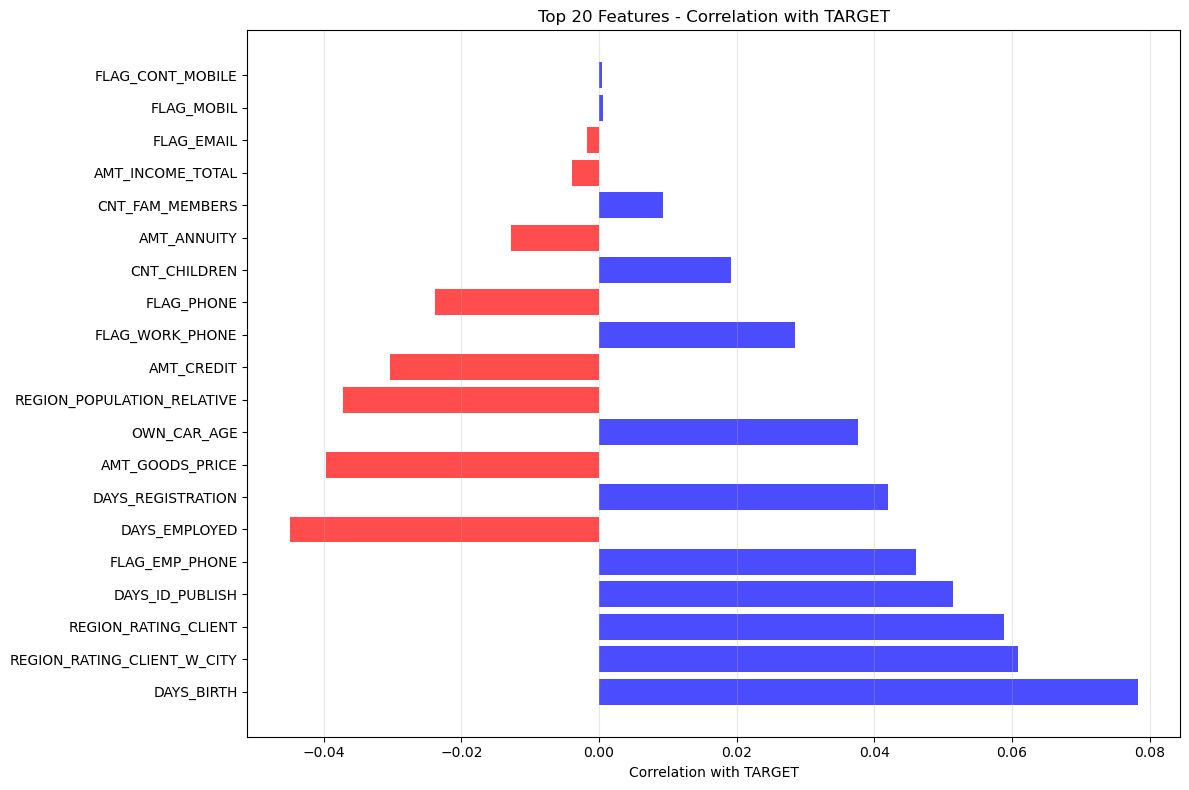

In [25]:
# Visualization
plt.figure(figsize=(12, 8))
top_corr = corr_df.head(20)
colors = ['red' if x < 0 else 'blue' for x in top_corr['Correlation']]
plt.barh(range(len(top_corr)), top_corr['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_corr)), top_corr['Feature'])
plt.xlabel('Correlation with TARGET')
plt.title('Top 20 Features - Correlation with TARGET')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#### 1.7 Key Insights
1. Highly imbalanced target
2. Many columns have high missing rates (need careful handling)
3. DAYS_* columns need transformation to interpretable units
4. Amount columns have outliers that may need capping
5. Rich categorical information available for encoding

#### 1.8 Next Steps for Data Cleaning
1. Handle high missing rate columns (drop or special encoding
2. Process DAYS_* columns (convert to age/years
3. Handle outliers in AMT_* columns
4. Encode categorical variables
5. Address class imbalance
6. Feature engineering from existing variables

## 2. Credit History

#### 2.1 Bureau

##### 2.1.1 Bureau table analysis

In [26]:
bureau.memory_usage(deep=True)

Index                           128
SK_ID_CURR                 13731424
SK_ID_BUREAU               13731424
CREDIT_ACTIVE             108121952
CREDIT_CURRENCY           115000676
DAYS_CREDIT                13731424
CREDIT_DAY_OVERDUE         13731424
DAYS_CREDIT_ENDDATE        13731424
DAYS_ENDDATE_FACT          13731424
AMT_CREDIT_MAX_OVERDUE     13731424
CNT_CREDIT_PROLONG         13731424
AMT_CREDIT_SUM             13731424
AMT_CREDIT_SUM_DEBT        13731424
AMT_CREDIT_SUM_LIMIT       13731424
AMT_CREDIT_SUM_OVERDUE     13731424
CREDIT_TYPE               121624358
DAYS_CREDIT_UPDATE         13731424
AMT_ANNUITY                13731424
dtype: int64

In [27]:
bureau.shape

(1716428, 17)

In [28]:
bureau.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [29]:
# ID column analysis
bureau['SK_ID_CURR'].nunique()

305811

In [30]:
bureau['SK_ID_BUREAU'].nunique()

1716428

In [31]:
bureau.shape[0] / bureau['SK_ID_CURR'].nunique()

5.612708502964249

In [32]:
# Data types
bureau.dtypes.value_counts()

float64    8
int64      6
object     3
Name: count, dtype: int64

In [33]:
# Display first five lines
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

##### 2.1.2 Client coverage & distribution analysis

In [34]:
main_clients = set(train_app['SK_ID_CURR'])
bureau_clients = set(bureau['SK_ID_CURR'])

In [35]:
overlap_clients = main_clients.intersection(bureau_clients)
main_only = main_clients - bureau_clients

In [36]:
print(f"Client Coverage:")
print(f"  Clients in main table: {len(main_clients):,}")
print(f"  Clients in bureau: {len(bureau_clients):,}")
print(f"  Clients with bureau records: {len(overlap_clients):,}")
print(f"  Coverage rate: {len(overlap_clients)/len(main_clients)*100:.2f}%")
print(f"  Clients without bureau history: {len(main_only):,}")

Client Coverage:
  Clients in main table: 307,511
  Clients in bureau: 305,811
  Clients with bureau records: 263,491
  Coverage rate: 85.69%
  Clients without bureau history: 44,020


In [37]:
# Clients value count
records_per_client = bureau['SK_ID_CURR'].value_counts()
records_per_client

SK_ID_CURR
120860    116
169704     94
318065     78
251643     61
425396     60
         ... 
405288      1
413028      1
288569      1
215224      1
235871      1
Name: count, Length: 305811, dtype: int64

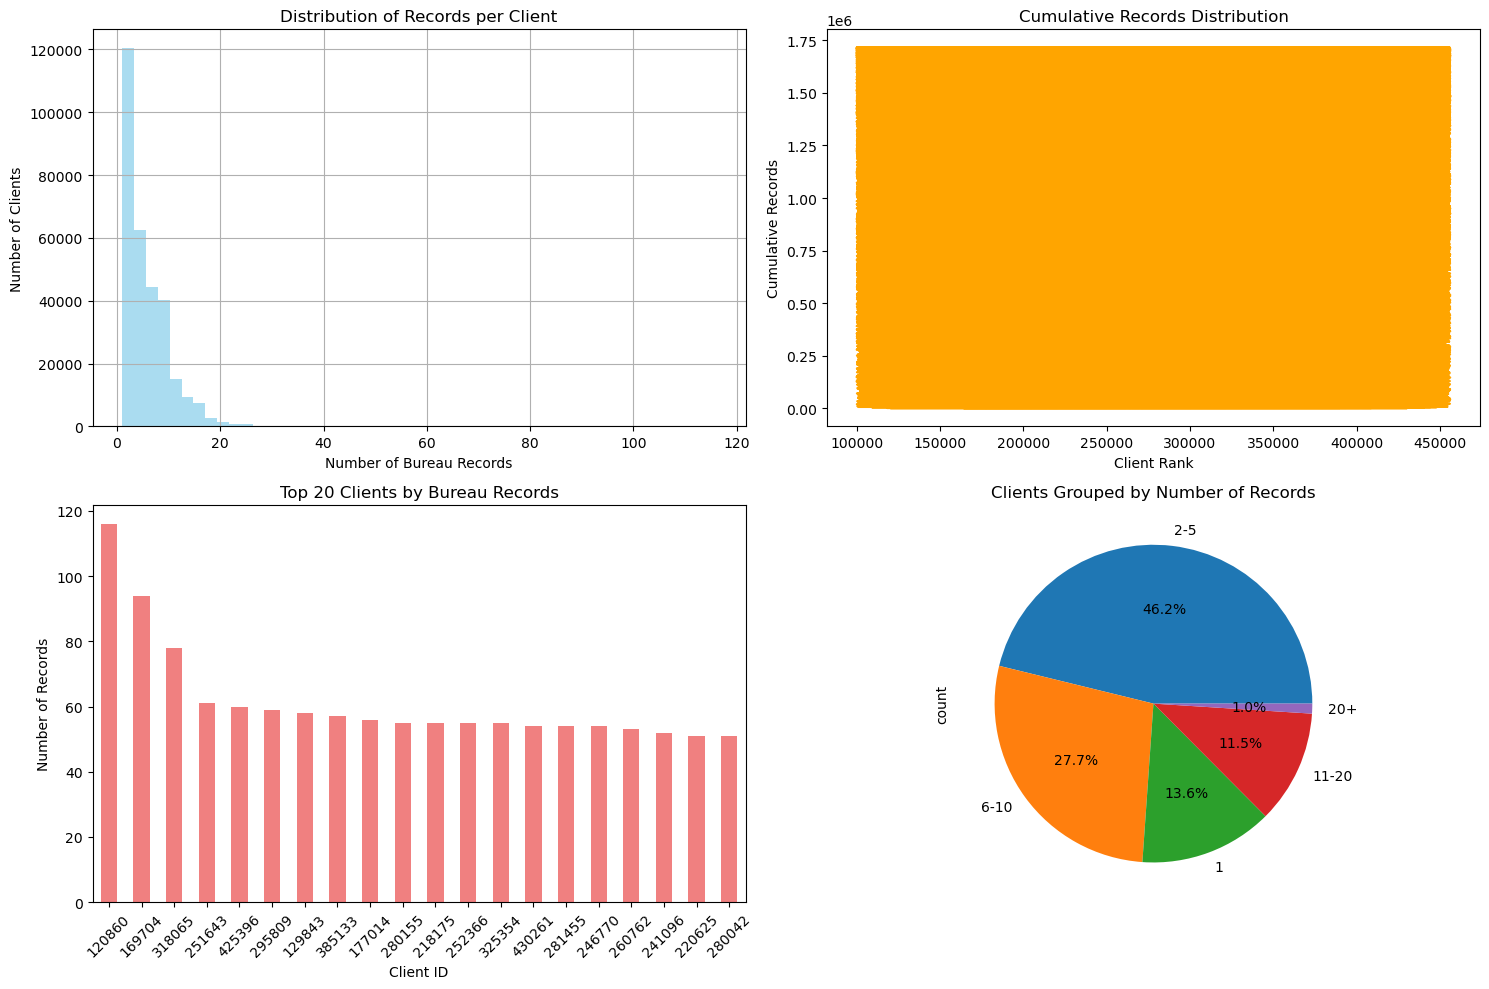

In [38]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

records_per_client.hist(bins=50, ax=axes[0,0], alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Records per Client')
axes[0,0].set_xlabel('Number of Bureau Records')
axes[0,0].set_ylabel('Number of Clients')

records_per_client.cumsum().plot(ax=axes[0,1], color='orange')
axes[0,1].set_title('Cumulative Records Distribution')
axes[0,1].set_xlabel('Client Rank')
axes[0,1].set_ylabel('Cumulative Records')

top_20_clients = records_per_client.head(20)
top_20_clients.plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Top 20 Clients by Bureau Records')
axes[1,0].set_xlabel('Client ID')
axes[1,0].set_ylabel('Number of Records')
axes[1,0].tick_params(axis='x', rotation=45)

record_groups = pd.cut(records_per_client, bins=[0, 1, 5, 10, 20, float('inf')], 
                          labels=['1', '2-5', '6-10', '11-20', '20+'])
record_group_counts = record_groups.value_counts()
record_group_counts.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Clients Grouped by Number of Records')

plt.tight_layout()
plt.show()

##### 2.1.3 Bureau Core Feature Analysis

In [39]:
# Core numeric features (can be modified later)
key_numeric_features = [
        'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
        'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 
        'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE'
        ]
existing_numeric = [col for col in key_numeric_features if col in bureau.columns]

Key Numeric Features Summary:


DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count  1.716428e+06        1.716428e+06         1.610875e+06   
mean  -1.142108e+03        8.181666e-01         5.105174e+02   
std    7.951649e+02        3.654443e+01         4.994220e+03   
min   -2.922000e+03        0.000000e+00        -4.206000e+04   
25%   -1.666000e+03        0.000000e+00        -1.138000e+03   
50%   -9.870000e+02        0.000000e+00        -3.300000e+02   
75%   -4.740000e+02        0.000000e+00         4.740000e+02   
max    0.000000e+00        2.792000e+03         3.119900e+04   

       AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
count            5.919400e+05        1.716428e+06    1.716415e+06   
mean             3.825418e+03        6.410406e-03    3.549946e+05   
std              2.060316e+05        9.622391e-02    1.149811e+06   
min              0.000000e+00        0.000000e+00    0.000000e+00   
25%              0.000000e+00        0.000000e+00    5.130000e+04   
50%              0.000000e+00        0.000000e+00    1.255185e+05   
75%              0.000000e+00        0.000000e+00    3.150000e+05   
max              1.159872e+08        9.000000e+00    5.850000e+08   

       AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_OVERDUE  
count         1.458759e+06            1.716428e+06  
mean          1.370851e+05            3.791276e+01  
std           6.774011e+05            5.937650e+03  
min          -4.705600e+06            0.000000e+00  
25%           0.000000e+00            0.000000e+00  
50%           0.000000e+00            0.000000e+00  
75%           4.015350e+04            0.000000e+00  
max           1.701000e+08            3.756681e+06

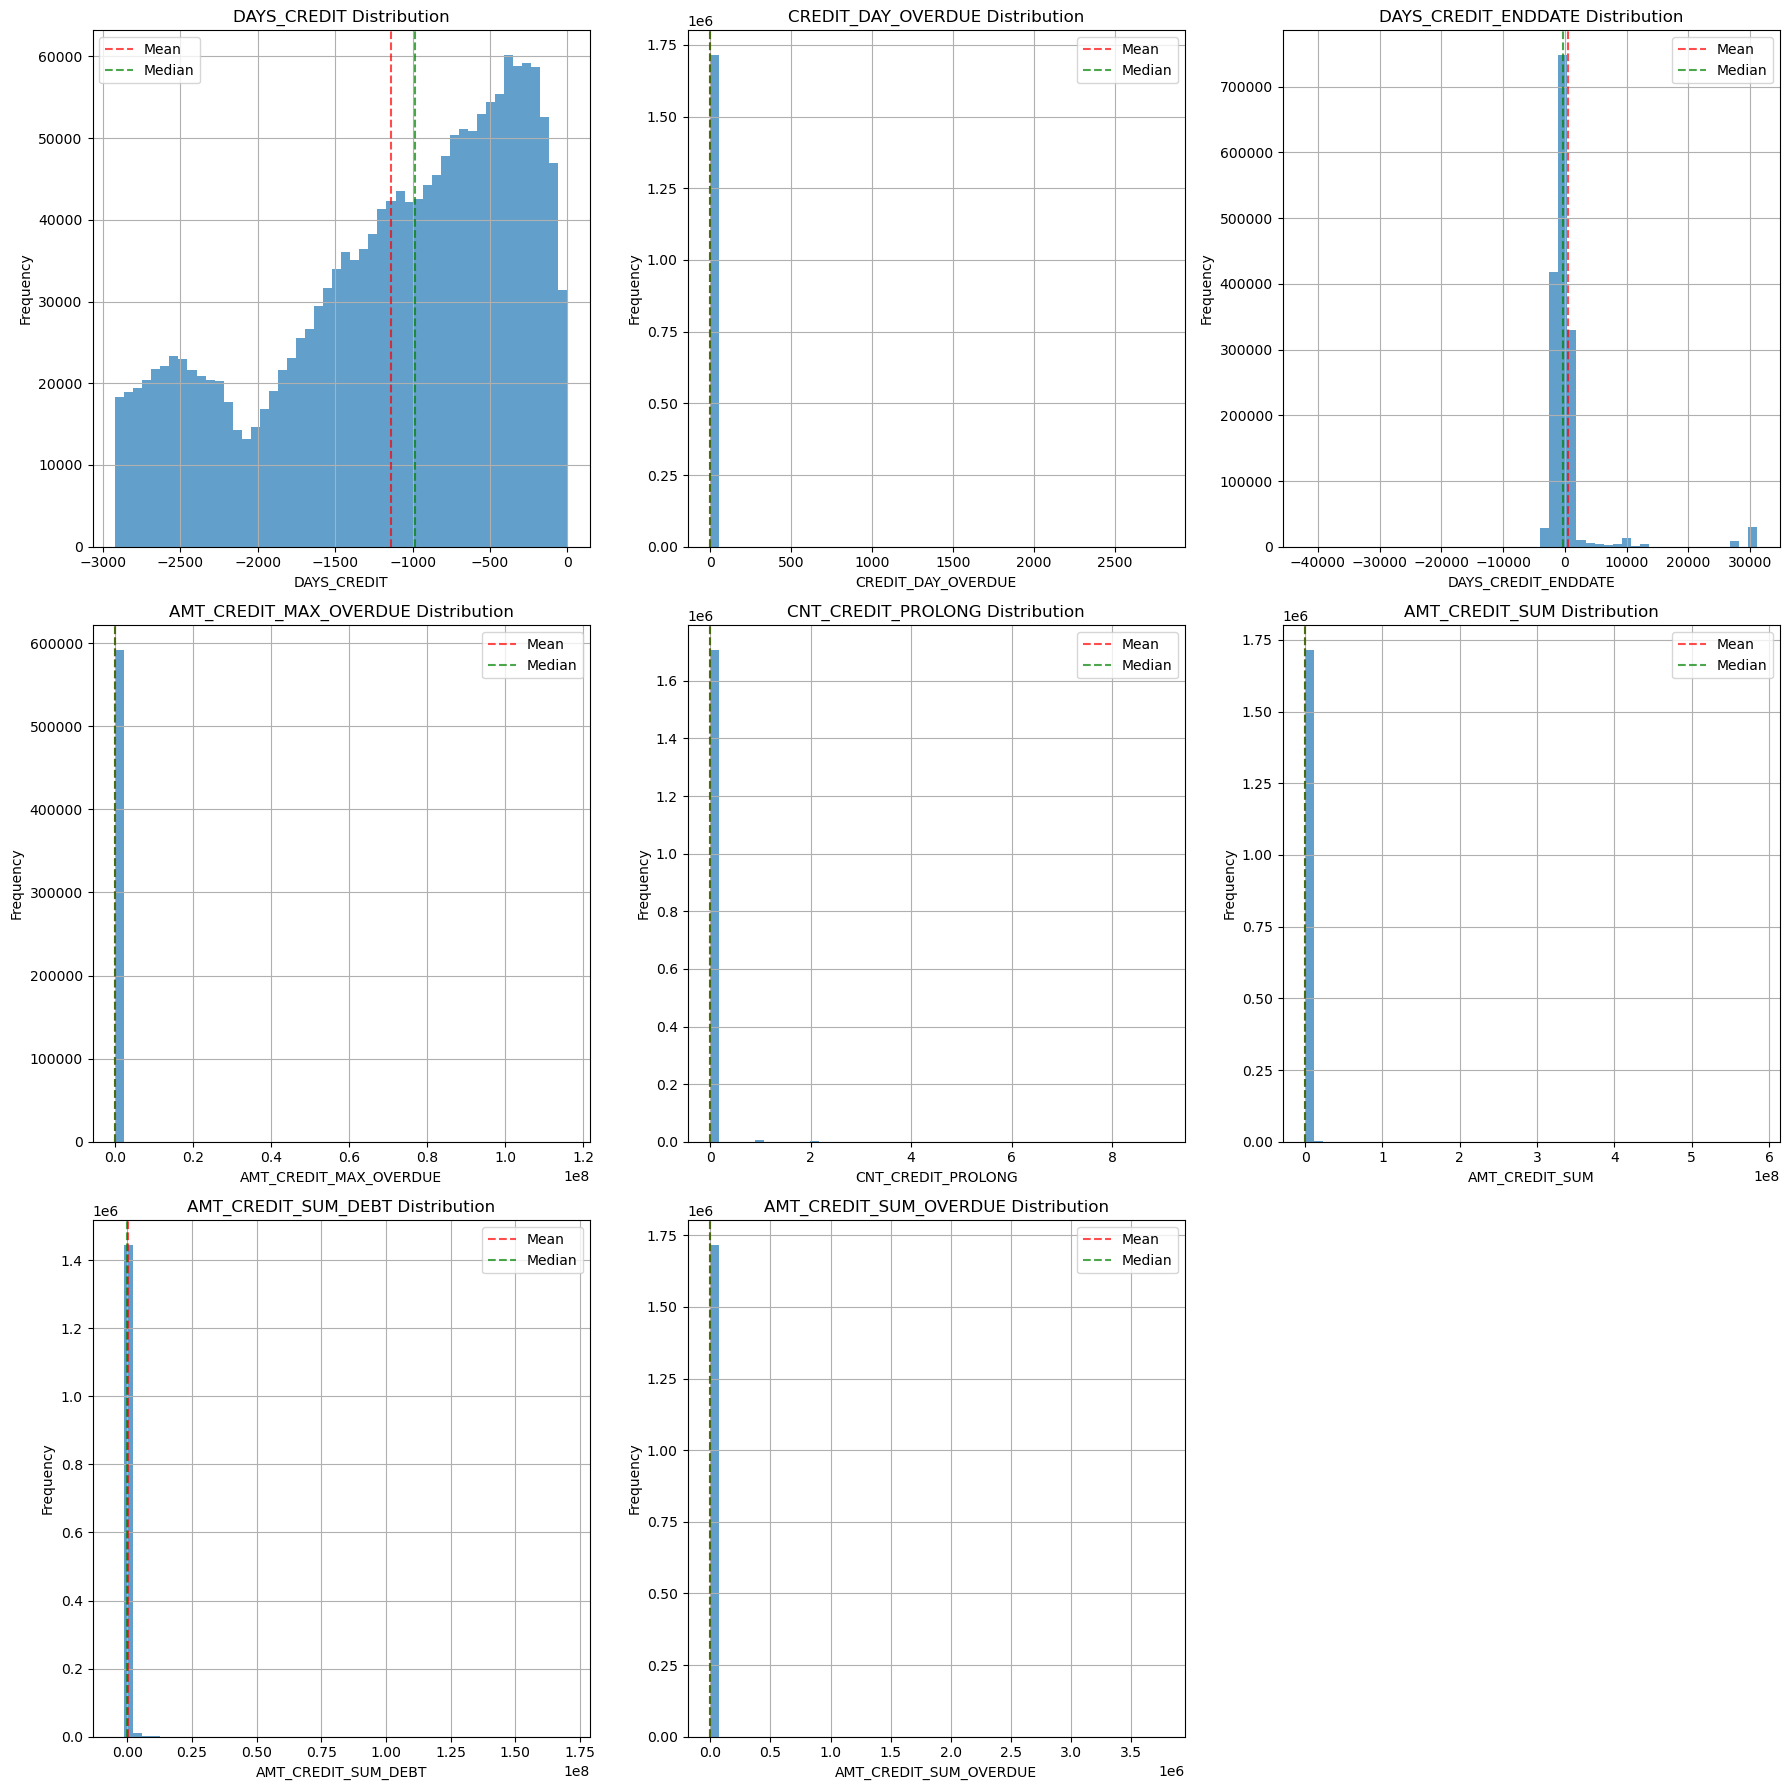

In [40]:
if existing_numeric:
    print("Key Numeric Features Summary:")
    display(bureau[existing_numeric].describe())

    # Visualization
    n_features = len(existing_numeric)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = [axes] if n_features == 1 else axes
    else:
        axes = axes.ravel()

    for i, feature in enumerate(existing_numeric):
            if i < len(axes):
                bureau[feature].hist(bins=50, alpha=0.7, ax=axes[i])
                axes[i].set_title(f'{feature} Distribution')
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('Frequency')
                
                mean_val = bureau[feature].mean()
                median_val = bureau[feature].median()
                axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean')
                axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median')
                axes[i].legend()
    for i in range(len(existing_numeric), len(axes)):
            axes[i].set_visible(False)
    plt.tight_layout()
    plt.show()

##### 2.1.4 Credit Types & Status Analysis

In [41]:
# Credit types analysis
credit_types = bureau['CREDIT_TYPE'].value_counts()
credit_types

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

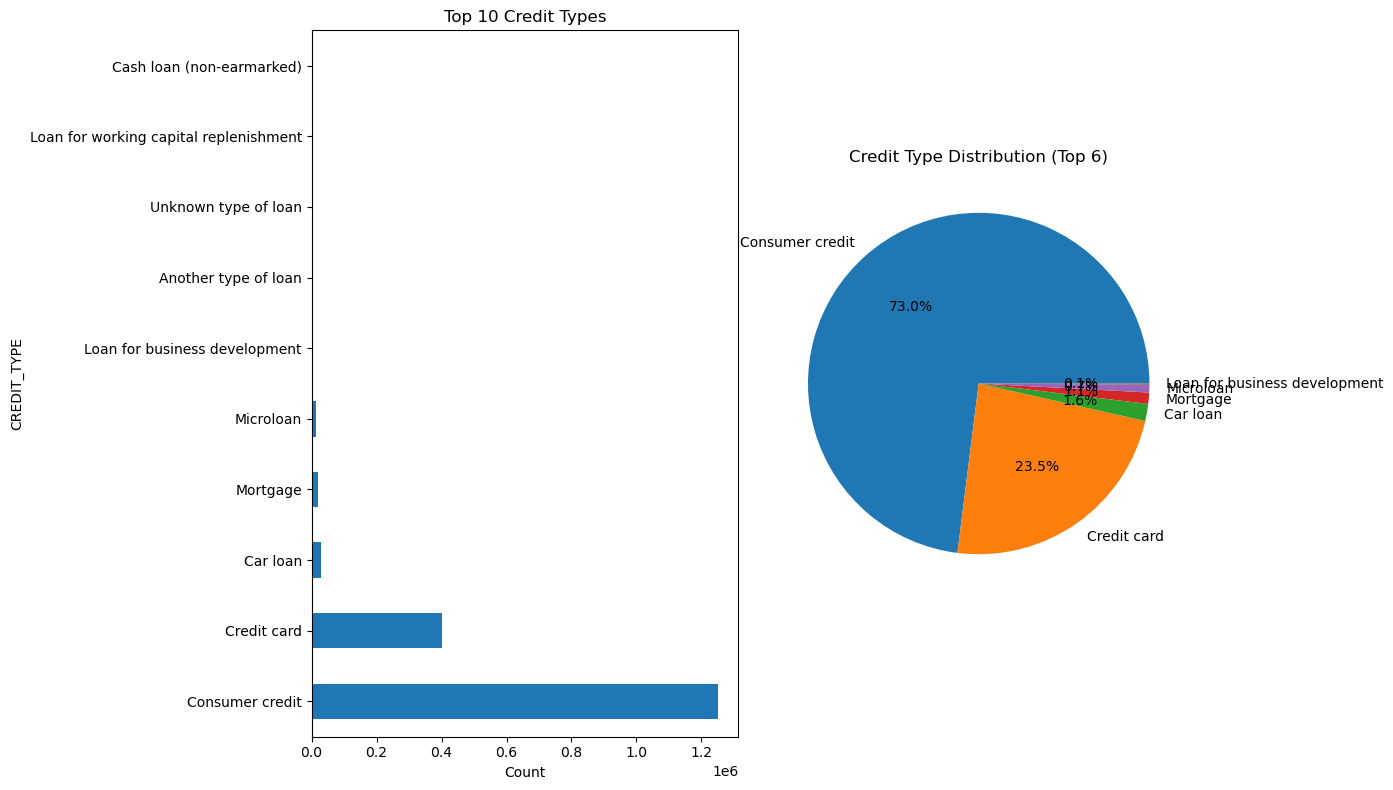

In [42]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

top_10_types = credit_types.head(10)
top_10_types.plot(kind='barh', ax=ax1)
ax1.set_title('Top 10 Credit Types')
ax1.set_xlabel('Count')

top_6_types = credit_types.head(6)
ax2.pie(top_6_types.values, labels=top_6_types.index, autopct='%1.1f%%')
ax2.set_title('Credit Type Distribution (Top 6)')

plt.tight_layout()
plt.show()

In [43]:
# Credit active status analysis
active_status = bureau['CREDIT_ACTIVE'].value_counts()
active_status

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

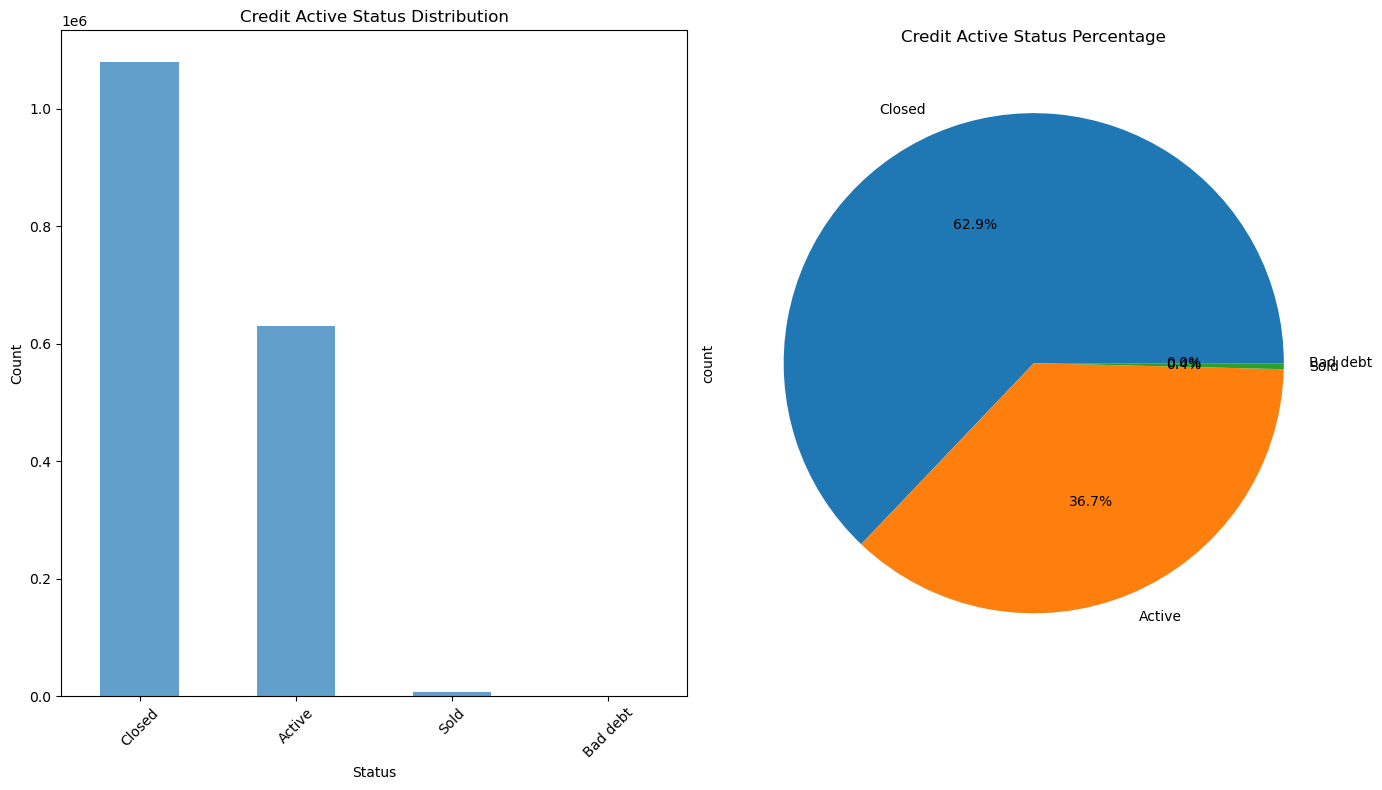

In [44]:
# Visualization
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
active_status.plot(kind='bar', alpha=0.7)
plt.title('Credit Active Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
        
plt.subplot(1, 2, 2)
active_status.plot(kind='pie', autopct='%1.1f%%')
plt.title('Credit Active Status Percentage')

plt.tight_layout()
plt.show()

##### 2.1.5 Bureau Missing Values Analysis

In [45]:
missing_data = bureau.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
missing_data

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
dtype: int64

In [46]:
missing_df = pd.DataFrame({
            'Missing_Count': missing_data,
            'Missing_Percent': (missing_data / len(bureau)) * 100
        })
missing_df

Missing_Count  Missing_Percent
AMT_ANNUITY                   1226791        71.473490
AMT_CREDIT_MAX_OVERDUE        1124488        65.513264
DAYS_ENDDATE_FACT              633653        36.916958
AMT_CREDIT_SUM_LIMIT           591780        34.477415
AMT_CREDIT_SUM_DEBT            257669        15.011932
DAYS_CREDIT_ENDDATE            105553         6.149573
AMT_CREDIT_SUM                     13         0.000757

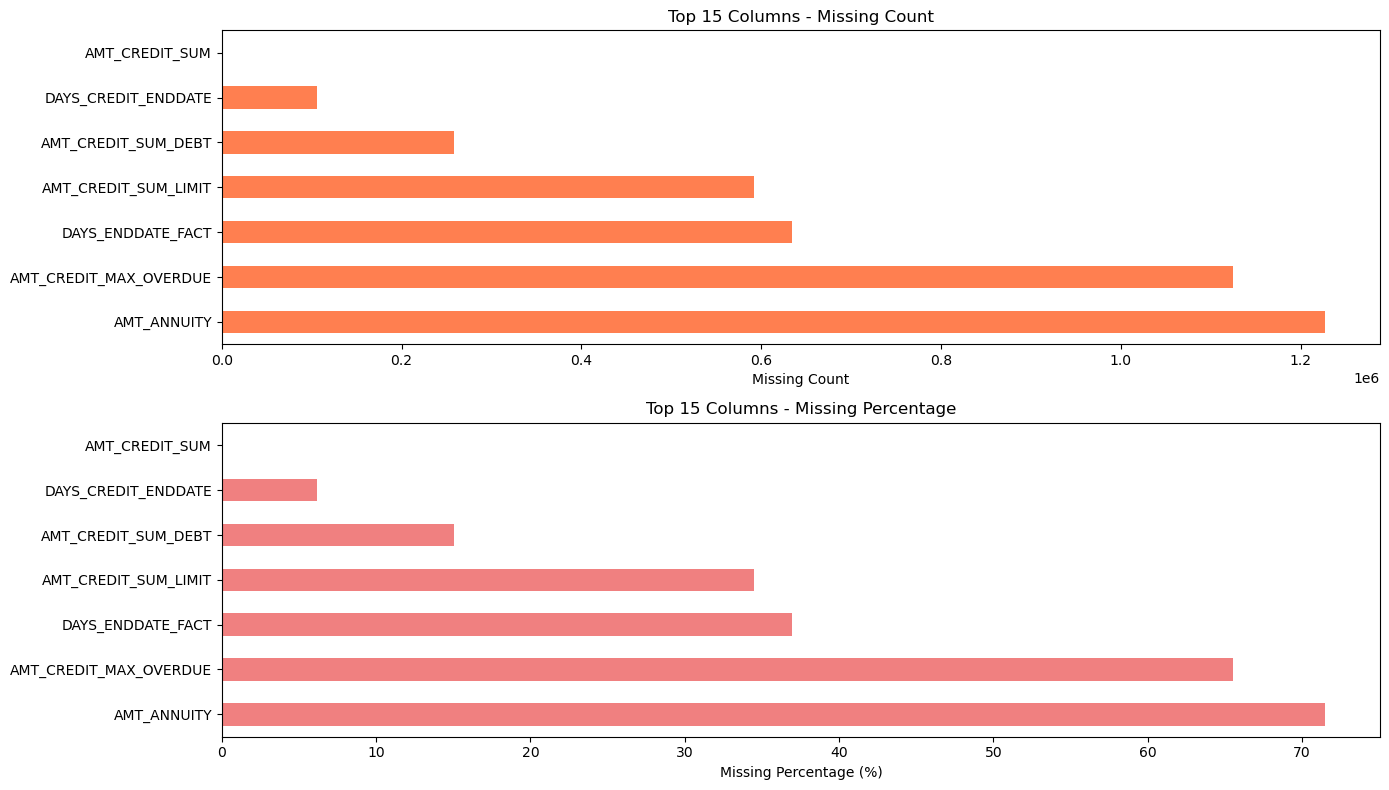

In [47]:
# Visualization
plt.figure(figsize=(14, 8))
        
plt.subplot(2, 1, 1)
missing_df['Missing_Count'].head(15).plot(kind='barh', color='coral')
plt.title('Top 15 Columns - Missing Count')
plt.xlabel('Missing Count')

plt.subplot(2, 1, 2)
missing_df['Missing_Percent'].head(15).plot(kind='barh', color='lightcoral')
plt.title('Top 15 Columns - Missing Percentage')
plt.xlabel('Missing Percentage (%)')

plt.tight_layout()
plt.show()

#### 2.2 Bureau Balance

In [48]:
# Basic information
bureau_bal.shape

(27299925, 3)

In [49]:
bureau_bal.memory_usage(deep=True)

Index                    128
SK_ID_BUREAU       218399400
MONTHS_BALANCE     218399400
STATUS            1583395650
dtype: int64

In [50]:
bureau_bal.describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

In [51]:
# Display first five lines
bureau_bal.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [52]:
# Key analysis
bureau_bal['SK_ID_BUREAU'].nunique()

817395

In [53]:
# Relationship with bureau table
bureau_ids_in_bureau = set(bureau['SK_ID_BUREAU'])
bureau_ids_in_balance = set(bureau_bal['SK_ID_BUREAU'])
overlap = bureau_ids_in_bureau.intersection(bureau_ids_in_balance)

In [54]:
print(f"  Bureau IDs in bureau table: {len(bureau_ids_in_bureau):,}")
print(f"  Bureau IDs in balance table: {len(bureau_ids_in_balance):,}")
print(f"  Overlap: {len(overlap):,} ({len(overlap)/len(bureau_ids_in_bureau)*100:.1f}%)")

  Bureau IDs in bureau table: 1,716,428
  Bureau IDs in balance table: 817,395
  Overlap: 774,354 (45.1%)


In [55]:
months_per_bureau = bureau_bal['SK_ID_BUREAU'].value_counts()
months_per_bureau

SK_ID_BUREAU
5645521    97
6733619    97
6176606    97
6321834    97
6356432    97
           ..
6212548     1
5819605     1
5626301     1
5626300     1
6803532     1
Name: count, Length: 817395, dtype: int64

In [56]:
print(f"\nMonths per Bureau Record:")
print(f"  Mean: {months_per_bureau.mean():.2f}")
print(f"  Median: {months_per_bureau.median():.1f}")
print(f"  Max: {months_per_bureau.max()}")


Months per Bureau Record:
  Mean: 33.40
  Median: 26.0
  Max: 97


In [57]:
# Analyze status
status_counts = bureau_bal['STATUS'].value_counts()
status_counts

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

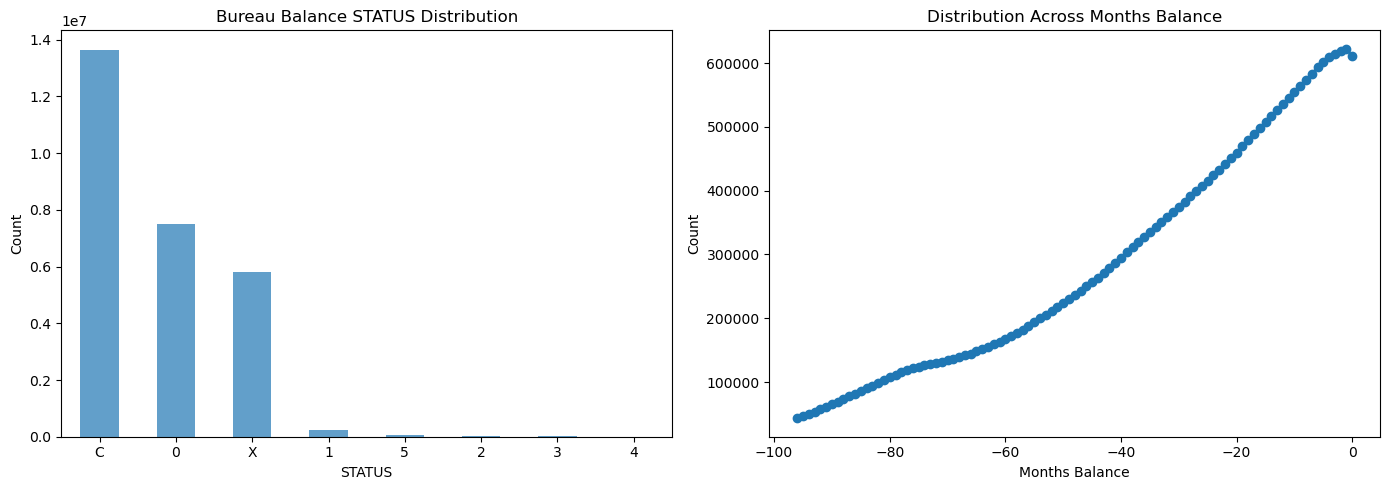

In [58]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

status_counts.plot(kind='bar', ax=ax1, alpha=0.7)
ax1.set_title('Bureau Balance STATUS Distribution')
ax1.set_xlabel('STATUS')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

months_dist = bureau_bal['MONTHS_BALANCE'].value_counts().sort_index()
months_dist.plot(kind='line', ax=ax2, marker='o')
ax2.set_title('Distribution Across Months Balance')
ax2.set_xlabel('Months Balance')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### 2.3 Bureau features vs Target Relationship

In [59]:
bureau_client_agg = bureau.groupby('SK_ID_CURR').agg({
        'SK_ID_BUREAU': 'count',  
        'DAYS_CREDIT': 'mean',  
        'CREDIT_DAY_OVERDUE': 'max', 
        'AMT_CREDIT_SUM': 'mean',    
        'AMT_CREDIT_SUM_DEBT': 'mean' 
    }).reset_index()

In [60]:
bureau_client_agg.columns = ['SK_ID_CURR', 'BUREAU_COUNT', 'BUREAU_DAYS_CREDIT_MEAN',
                               'BUREAU_OVERDUE_MAX', 'BUREAU_CREDIT_SUM_MEAN', 'BUREAU_DEBT_MEAN']

In [61]:
app_with_bureau = train_app.merge(bureau_client_agg, on='SK_ID_CURR', how='left')

In [62]:
bureau_cols = ['BUREAU_COUNT', 'BUREAU_DAYS_CREDIT_MEAN', 'BUREAU_OVERDUE_MAX',
                  'BUREAU_CREDIT_SUM_MEAN', 'BUREAU_DEBT_MEAN']
for col in bureau_cols:
        app_with_bureau[col] = app_with_bureau[col].fillna(0)

In [63]:
# Compute correlation
correlations = []
for col in bureau_cols:
    corr = app_with_bureau[col].corr(app_with_bureau['TARGET'])
    correlations.append({'Feature': col, 'Correlation': corr})

corr_df = pd.DataFrame(correlations).sort_values('Correlation', key=abs, ascending=False)
display(corr_df)

Feature  Correlation
1  BUREAU_DAYS_CREDIT_MEAN     0.083960
3   BUREAU_CREDIT_SUM_MEAN    -0.022758
0             BUREAU_COUNT    -0.010020
2       BUREAU_OVERDUE_MAX     0.004360
4         BUREAU_DEBT_MEAN    -0.003742

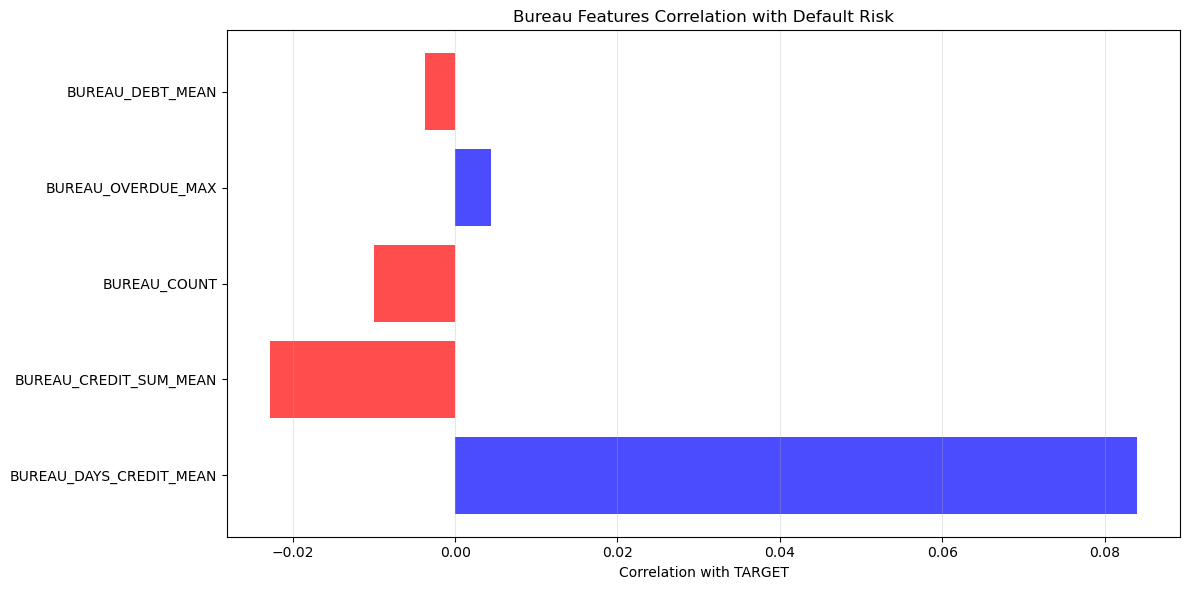

In [64]:
# Visualization
plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'blue' for x in corr_df['Correlation']]
plt.barh(range(len(corr_df)), corr_df['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(corr_df)), corr_df['Feature'])
plt.xlabel('Correlation with TARGET')
plt.title('Bureau Features Correlation with Default Risk')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [65]:
has_bureau = app_with_bureau['BUREAU_COUNT'] > 0
default_rate_with_bureau = app_with_bureau[has_bureau]['TARGET'].mean()
default_rate_without_bureau = app_with_bureau[~has_bureau]['TARGET'].mean()

In [66]:
print(f"\nDefault Rate Analysis:")
print(f"  Clients with bureau records: {has_bureau.sum():,} ({has_bureau.mean()*100:.1f}%)")
print(f"  Default rate WITH bureau history: {default_rate_with_bureau*100:.2f}%")
print(f"  Default rate WITHOUT bureau history: {default_rate_without_bureau*100:.2f}%")
print(f"  Difference: {(default_rate_with_bureau - default_rate_without_bureau)*100:.2f} percentage points")


Default Rate Analysis:
  Clients with bureau records: 263,491 (85.7%)
  Default rate WITH bureau history: 7.73%
  Default rate WITHOUT bureau history: 10.12%
  Difference: -2.39 percentage points


#### 2.4 Key Insights
1. Bureau data provides rich credit history for ~67% of clients
2. Clients without bureau history have different default patterns
3. Credit overdue information is highly predictive
4. Bureau balance provides detailed monthly payment behavior
5. Need to handle clients without credit history separately

#### 2.5 Next Steps
1. Aggregate bureau data to client level
2. Handle clients without bureau history
3. Engineer features from bureau_balance
4. Create 'no credit history' indicators
5. Move to Home Credit internal history (previous_application)

## 3. Internal History

#### 3.1 Basic Information

In [67]:
# Basic information
prev_app.shape

(1670214, 37)

In [68]:
prev_app.memory_usage(deep=True)

Index                                128
SK_ID_PREV                      13361712
SK_ID_CURR                      13361712
NAME_CONTRACT_TYPE             115784340
AMT_ANNUITY                     13361712
AMT_APPLICATION                 13361712
AMT_CREDIT                      13361712
AMT_DOWN_PAYMENT                13361712
AMT_GOODS_PRICE                 13361712
WEEKDAY_APPR_PROCESS_START     107223090
HOUR_APPR_PROCESS_START         13361712
FLAG_LAST_APPL_PER_CONTRACT     96872412
NFLAG_LAST_APPL_IN_DAY          13361712
RATE_DOWN_PAYMENT               13361712
RATE_INTEREST_PRIMARY           13361712
RATE_INTEREST_PRIVILEGED        13361712
NAME_CASH_LOAN_PURPOSE         100734285
NAME_CONTRACT_STATUS           108378976
DAYS_DECISION                   13361712
NAME_PAYMENT_TYPE              119046445
CODE_REJECT_REASON             100263120
NAME_TYPE_SUITE                 84067331
NAME_CLIENT_TYPE               107183039
NAME_GOODS_CATEGORY            106536818
NAME_PORTFOLIO  

In [69]:
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [70]:
# Key ID analysis
prev_app['SK_ID_CURR'].nunique()

338857

In [71]:
prev_app['SK_ID_PREV'].nunique()

1670214

In [72]:
# Avg applications per client
prev_app.shape[0] / prev_app['SK_ID_CURR'].nunique()

4.928964135313716

In [73]:
# Data type summary
dtype_summary = prev_app.dtypes.value_counts()
dtype_summary

object     16
float64    15
int64       6
Name: count, dtype: int64

In [74]:
# Key business fields (can be modified later)
key_business_fields = [
        'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
        'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
        'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
        'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'
    ]

In [75]:
existing_fields = [field for field in key_business_fields if field in prev_app.columns]

In [76]:
for field in existing_fields[:8]: 
    unique_count = prev_app[field].nunique()
    missing_count = prev_app[field].isnull().sum()
    print(f"  {field}: {unique_count} unique values, {missing_count} missing")

  NAME_CONTRACT_TYPE: 4 unique values, 0 missing
  NAME_CONTRACT_STATUS: 4 unique values, 0 missing
  NAME_PAYMENT_TYPE: 4 unique values, 0 missing
  CODE_REJECT_REASON: 9 unique values, 0 missing
  NAME_TYPE_SUITE: 7 unique values, 820405 missing
  NAME_CLIENT_TYPE: 4 unique values, 0 missing
  NAME_GOODS_CATEGORY: 28 unique values, 0 missing
  NAME_PORTFOLIO: 5 unique values, 0 missing


#### 3.2 Client coverage & Application patterns

In [77]:
main_clients = set(train_app['SK_ID_CURR'])
prev_clients = set(prev_app['SK_ID_CURR'])

In [78]:
overlap_clients = main_clients.intersection(prev_clients)
new_clients = main_clients - prev_clients

In [79]:
print(f"Client Coverage Analysis:")
print(f"  Total clients in main table: {len(main_clients):,}")
print(f"  Clients with previous applications: {len(prev_clients):,}")
print(f"  Coverage rate: {len(overlap_clients)/len(main_clients)*100:.2f}%")
print(f"  New clients (first-time): {len(new_clients):,} ({len(new_clients)/len(main_clients)*100:.1f}%)")

Client Coverage Analysis:
  Total clients in main table: 307,511
  Clients with previous applications: 338,857
  Coverage rate: 94.65%
  New clients (first-time): 16,454 (5.4%)


In [80]:
# Application frequency analysis
apps_per_client = prev_app['SK_ID_CURR'].value_counts()
apps_per_client

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64

In [81]:
print(f"\nApplication Frequency Distribution:")
print(f"  Mean applications per client: {apps_per_client.mean():.2f}")
print(f"  Median: {apps_per_client.median():.1f}")
print(f"  Min: {apps_per_client.min()}")
print(f"  Max: {apps_per_client.max()}")
print(f"  Standard deviation: {apps_per_client.std():.2f}")


Application Frequency Distribution:
  Mean applications per client: 4.93
  Median: 4.0
  Min: 1
  Max: 77
  Standard deviation: 4.22


In [82]:
# Customer application frequency grouping
freq_bins = [0, 1, 2, 3, 5, 10, float('inf')]
freq_labels = ['1', '2', '3', '4-5', '6-10', '10+']
app_frequency_groups = pd.cut(apps_per_client, bins=freq_bins, labels=freq_labels)
freq_distribution = app_frequency_groups.value_counts()

In [83]:
print(f"\nClient Segmentation by Application Frequency:")
for group, count in freq_distribution.items():
    pct = count / len(apps_per_client) * 100
    print(f"  {group} application(s): {count:,} clients ({pct:.1f}%)")


Client Segmentation by Application Frequency:
  6-10 application(s): 79,579 clients (23.5%)
  4-5 application(s): 69,045 clients (20.4%)
  1 application(s): 60,458 clients (17.8%)
  2 application(s): 52,737 clients (15.6%)
  3 application(s): 45,966 clients (13.6%)
  10+ application(s): 31,072 clients (9.2%)


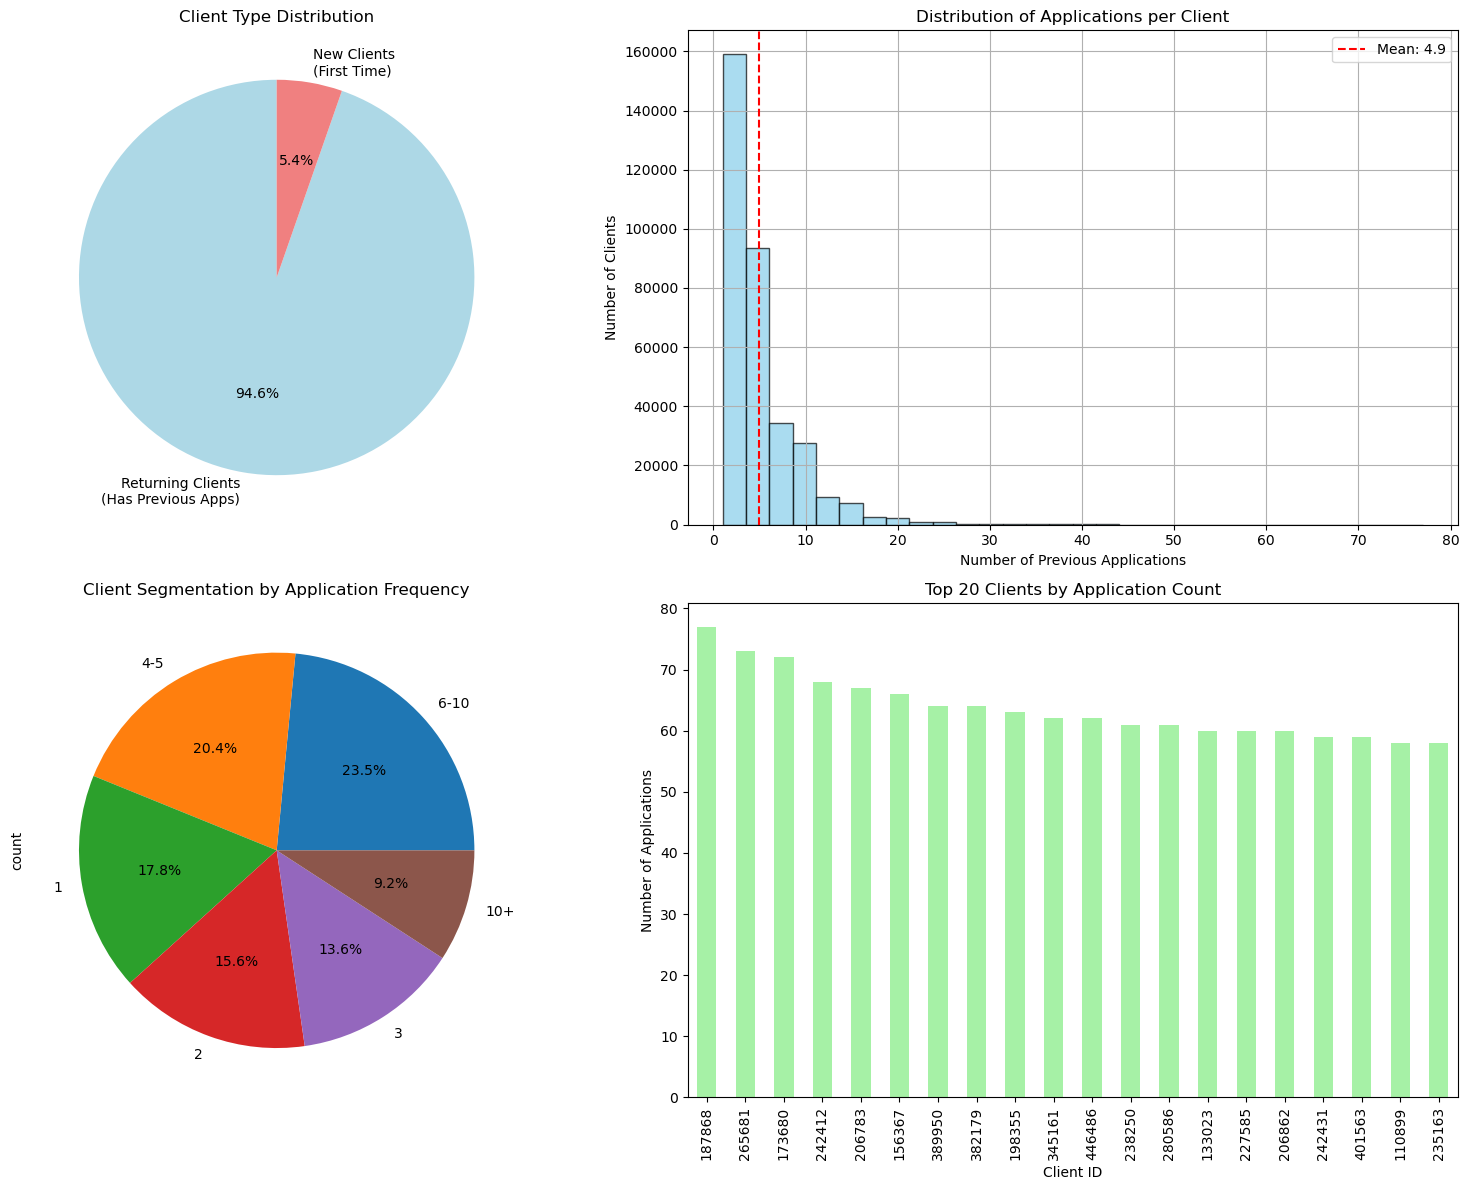

In [84]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Clients types
client_types = ['Returning Clients\n(Has Previous Apps)', 'New Clients\n(First Time)']
client_counts = [len(overlap_clients), len(new_clients)]
colors = ['lightblue', 'lightcoral']

axes[0,0].pie(client_counts, labels=client_types, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Client Type Distribution')

apps_per_client.hist(bins=30, ax=axes[0,1], alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_title('Distribution of Applications per Client')
axes[0,1].set_xlabel('Number of Previous Applications')
axes[0,1].set_ylabel('Number of Clients')
axes[0,1].axvline(apps_per_client.mean(), color='red', linestyle='--', label=f'Mean: {apps_per_client.mean():.1f}')
axes[0,1].legend()

freq_distribution.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Client Segmentation by Application Frequency')

top_clients = apps_per_client.head(20)
top_clients.plot(kind='bar', ax=axes[1,1], color='lightgreen', alpha=0.8)
axes[1,1].set_title('Top 20 Clients by Application Count')
axes[1,1].set_xlabel('Client ID')
axes[1,1].set_ylabel('Number of Applications')
axes[1,1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### 3.3 Contract types & Application status analysis

In [85]:
# Contract types analysis
contract_types = prev_app['NAME_CONTRACT_TYPE'].value_counts()
contract_types

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

In [86]:
print(f"\nContract Type Distribution:")
for contract_type, count in contract_types.items():
    pct = count / len(prev_app) * 100
    print(f"  {contract_type}: {count:,} ({pct:.1f}%)")


Contract Type Distribution:
  Cash loans: 747,553 (44.8%)
  Consumer loans: 729,151 (43.7%)
  Revolving loans: 193,164 (11.6%)
  XNA: 346 (0.0%)


In [87]:
# Application status analysis
app_status = prev_app['NAME_CONTRACT_STATUS'].value_counts()
app_status

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

In [88]:
print(f"\nApplication Status Distribution:")
for status, count in app_status.items():
    pct = count / len(prev_app) * 100
    print(f"  {status}: {count:,} ({pct:.1f}%)")


Application Status Distribution:
  Approved: 1,036,781 (62.1%)
  Canceled: 316,319 (18.9%)
  Refused: 290,678 (17.4%)
  Unused offer: 26,436 (1.6%)


In [89]:
# Approval rate analysis
total_decided = app_status.get('Approved', 0) + app_status.get('Refused', 0)
approval_rate = app_status.get('Approved', 0) / total_decided * 100 if total_decided > 0 else 0
print(f"\nApproval Rate: {approval_rate:.1f}%")


Approval Rate: 78.1%


In [90]:
# Core rejection reason analysis
reject_reasons = prev_app['CODE_REJECT_REASON'].value_counts().head(10)
reject_reasons

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

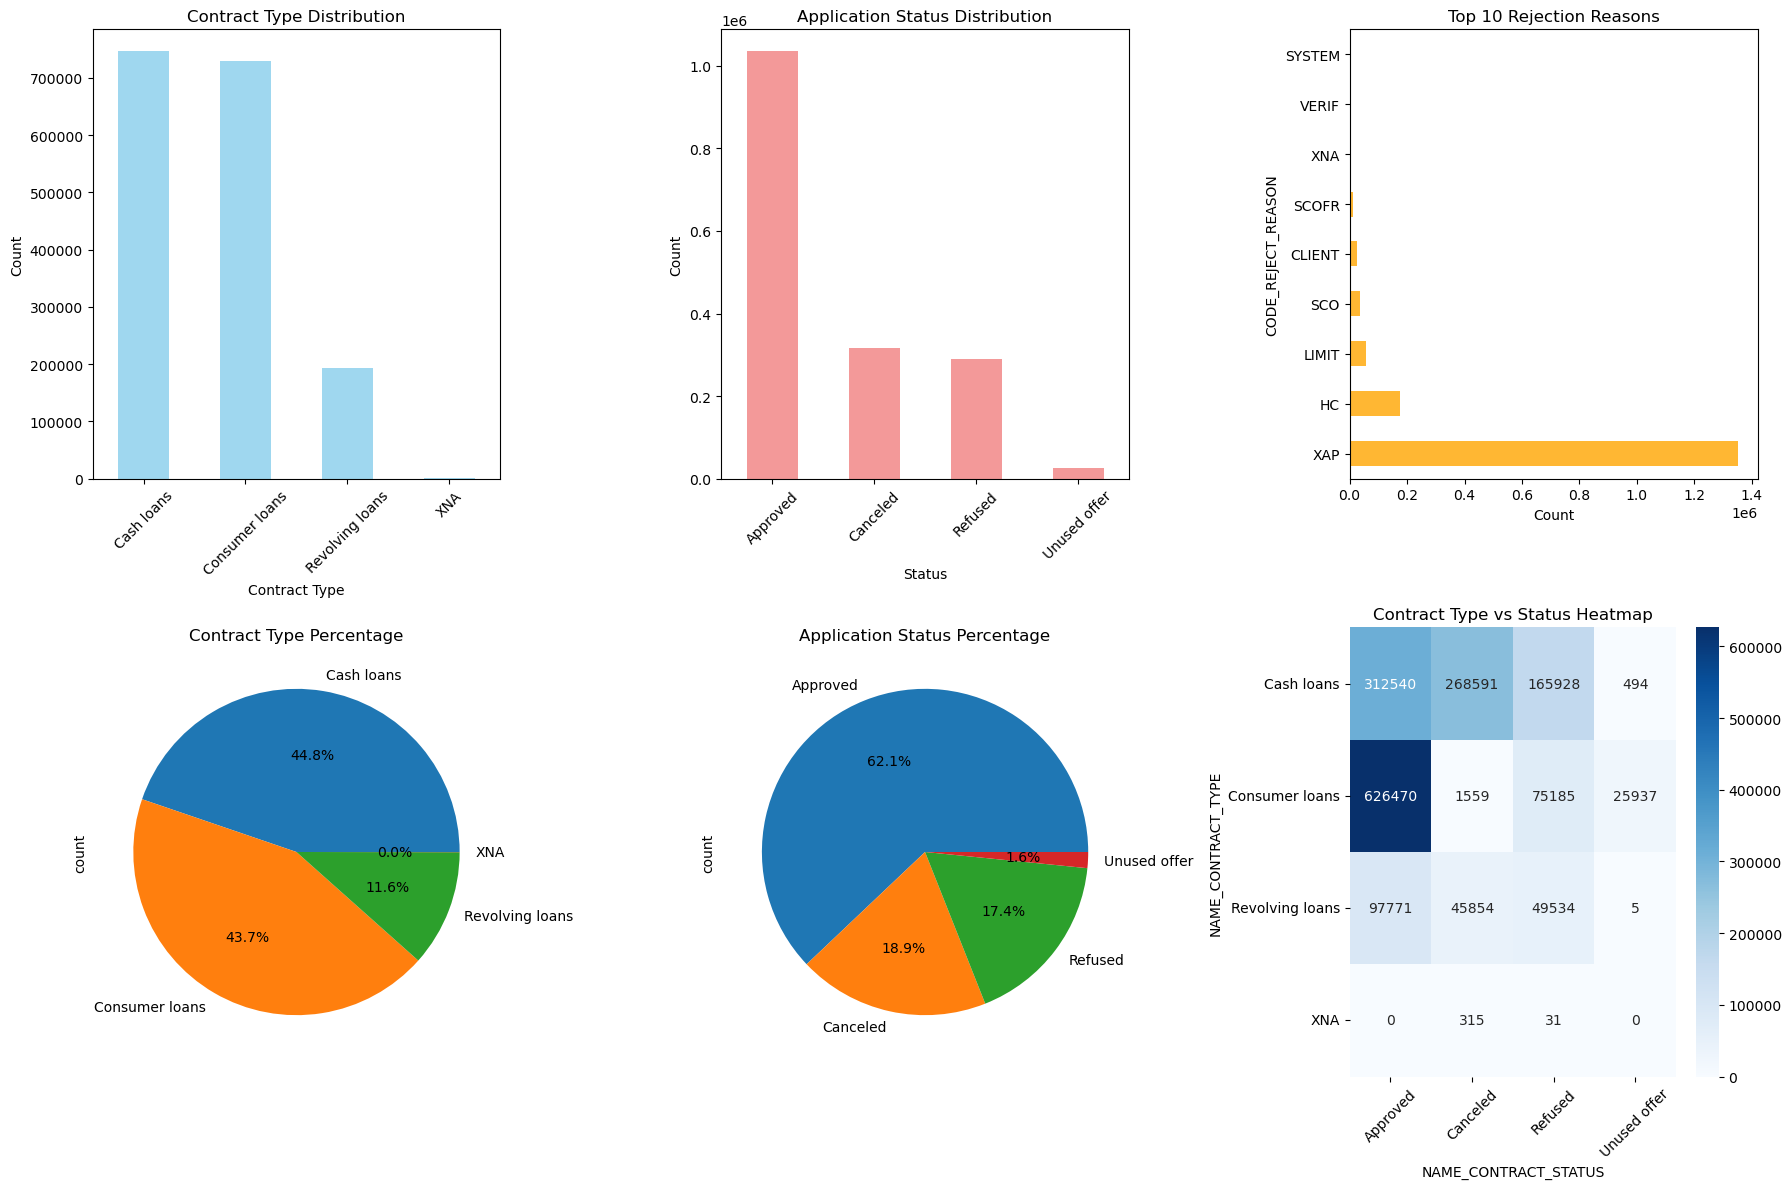

In [91]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Contract type - bar
contract_types.plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Contract Type Distribution')
axes[0,0].set_xlabel('Contract Type')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Contract status - bar
app_status.plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('Application Status Distribution')
axes[0,1].set_xlabel('Status')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)

# Core reject reason - bar
reject_reasons.plot(kind='barh', ax=axes[0,2], color='orange', alpha=0.8)
axes[0,2].set_title('Top 10 Rejection Reasons')
axes[0,2].set_xlabel('Count')

# Contract type - pie
contract_types.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Contract Type Percentage')

# Contract status - pie
app_status.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Application Status Percentage')

# Contract type vs Status 
crosstab = pd.crosstab(prev_app['NAME_CONTRACT_TYPE'], prev_app['NAME_CONTRACT_STATUS'])
sns.heatmap(crosstab, annot=True, fmt='d', ax=axes[1,2], cmap='Blues')
axes[1,2].set_title('Contract Type vs Status Heatmap')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3.4 Financial products & Channels analysis

In [92]:
# Product fiels analysis
product_fields = ['NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE']

In [93]:
for field in product_fields:
        if field in prev_app.columns:
            print(f"\n{field}:")
            top_values = prev_app[field].value_counts().head(8)
            print("Top 8 categories:")
            for category, count in top_values.items():
                if pd.notna(category):
                    pct = count / len(prev_app) * 100
                    print(f"  {category}: {count:,} ({pct:.1f}%)")


NAME_CASH_LOAN_PURPOSE:
Top 8 categories:
  XAP: 922,661 (55.2%)
  XNA: 677,918 (40.6%)
  Repairs: 23,765 (1.4%)
  Other: 15,608 (0.9%)
  Urgent needs: 8,412 (0.5%)
  Buying a used car: 2,888 (0.2%)
  Building a house or an annex: 2,693 (0.2%)
  Everyday expenses: 2,416 (0.1%)

NAME_GOODS_CATEGORY:
Top 8 categories:
  XNA: 950,809 (56.9%)
  Mobile: 224,708 (13.5%)
  Consumer Electronics: 121,576 (7.3%)
  Computers: 105,769 (6.3%)
  Audio/Video: 99,441 (6.0%)
  Furniture: 53,656 (3.2%)
  Photo / Cinema Equipment: 25,021 (1.5%)
  Construction Materials: 24,995 (1.5%)

NAME_PORTFOLIO:
Top 8 categories:
  POS: 691,011 (41.4%)
  Cash: 461,563 (27.6%)
  XNA: 372,230 (22.3%)
  Cards: 144,985 (8.7%)
  Cars: 425 (0.0%)

NAME_PRODUCT_TYPE:
Top 8 categories:
  XNA: 1,063,666 (63.7%)
  x-sell: 456,287 (27.3%)
  walk-in: 150,261 (9.0%)


In [94]:
# Channel fields analysis
channel_fields = ['CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP']

In [95]:
for field in channel_fields:
        if field in prev_app.columns:
            print(f"\n{field}:")
            top_channels = prev_app[field].value_counts().head(6)
            print("Top 6 categories:")
            for channel, count in top_channels.items():
                if pd.notna(channel):
                    pct = count / len(prev_app) * 100
                    print(f"  {channel}: {count:,} ({pct:.1f}%)")


CHANNEL_TYPE:
Top 6 categories:
  Credit and cash offices: 719,968 (43.1%)
  Country-wide: 494,690 (29.6%)
  Stone: 212,083 (12.7%)
  Regional / Local: 108,528 (6.5%)
  Contact center: 71,297 (4.3%)
  AP+ (Cash loan): 57,046 (3.4%)

NAME_SELLER_INDUSTRY:
Top 6 categories:
  XNA: 855,720 (51.2%)
  Consumer electronics: 398,265 (23.8%)
  Connectivity: 276,029 (16.5%)
  Furniture: 57,849 (3.5%)
  Construction: 29,781 (1.8%)
  Clothing: 23,949 (1.4%)

NAME_YIELD_GROUP:
Top 6 categories:
  XNA: 517,215 (31.0%)
  middle: 385,532 (23.1%)
  high: 353,331 (21.2%)
  low_normal: 322,095 (19.3%)
  low_action: 92,041 (5.5%)


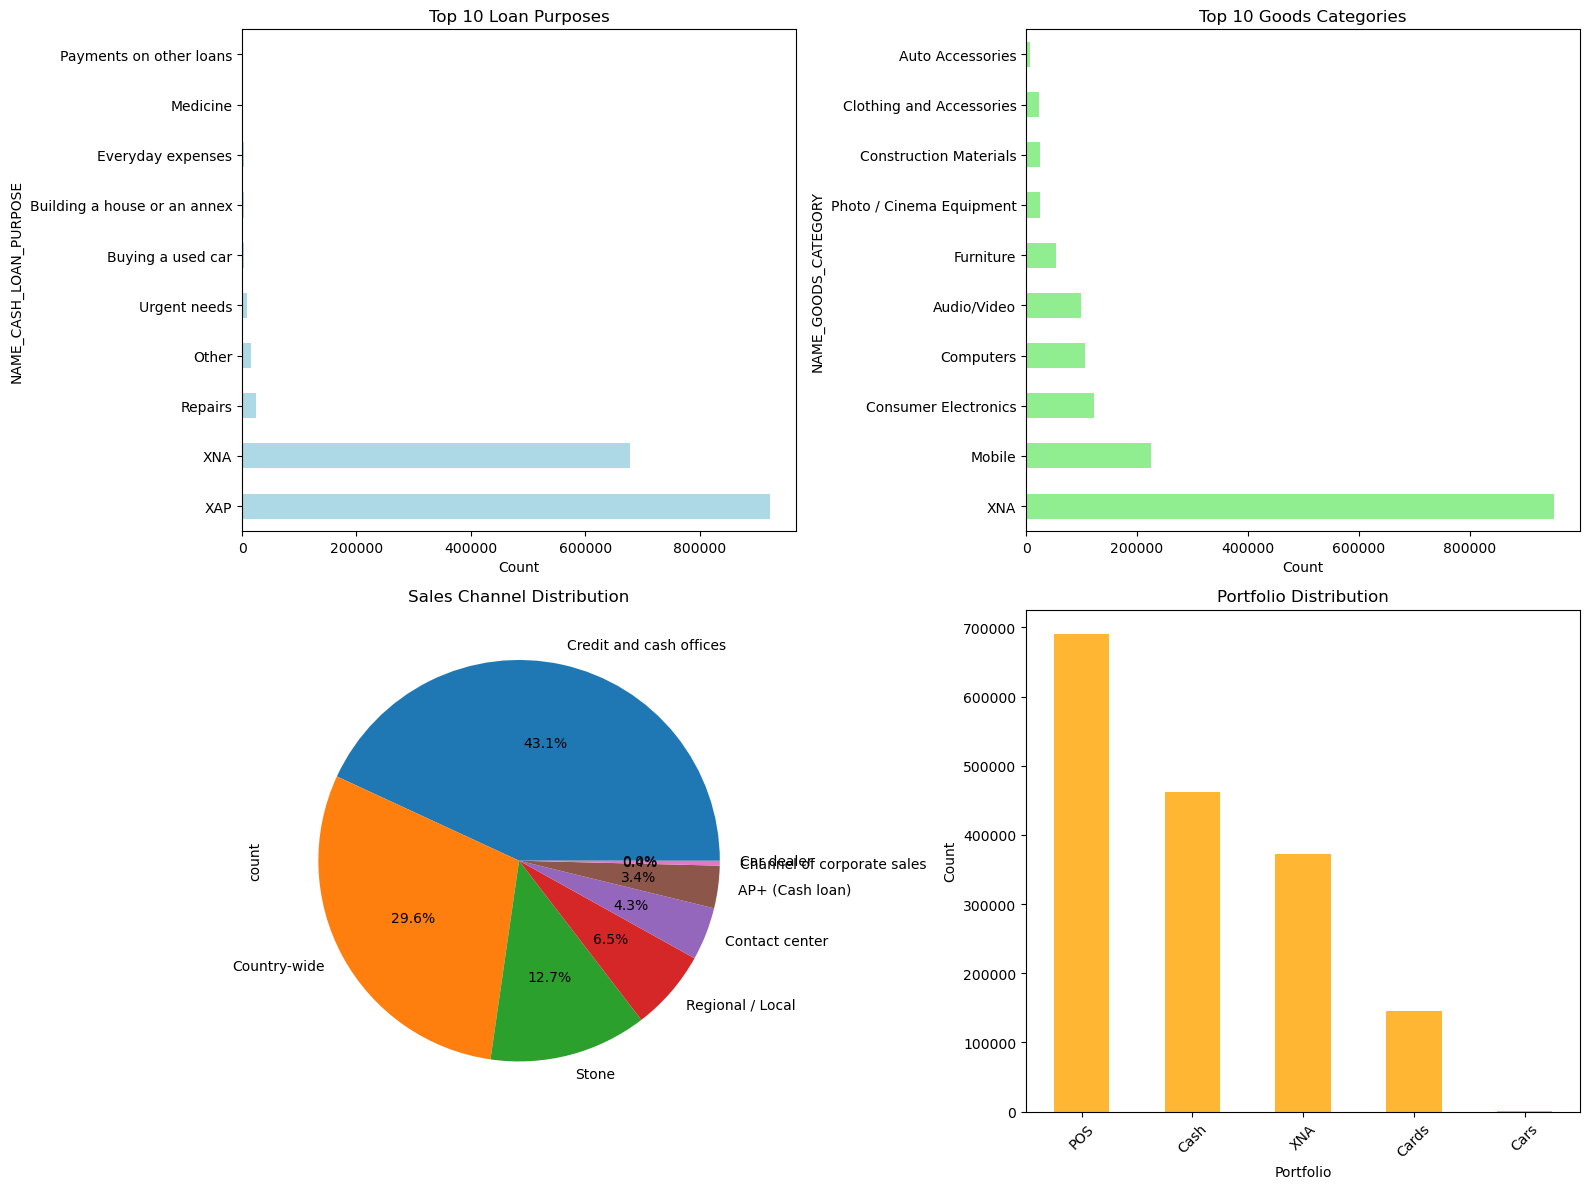

In [96]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loan purposes
loan_purposes = prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts().head(10)
loan_purposes.plot(kind='barh', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Top 10 Loan Purposes')
axes[0,0].set_xlabel('Count')

# Goods categories
goods_categories = prev_app['NAME_GOODS_CATEGORY'].value_counts().head(10)
goods_categories.plot(kind='barh', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Top 10 Goods Categories')
axes[0,1].set_xlabel('Count')

# Channel type
channels = prev_app['CHANNEL_TYPE'].value_counts()
channels.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Sales Channel Distribution')

# Portfolio
portfolios = prev_app['NAME_PORTFOLIO'].value_counts()
portfolios.plot(kind='bar', ax=axes[1,1], color='orange', alpha=0.8)
axes[1,1].set_title('Portfolio Distribution')
axes[1,1].set_xlabel('Portfolio')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3.5 Financial amounts & Terms analysis

In [97]:
amount_fields = [
        'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 
        'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY'
    ]
existing_amounts = [field for field in amount_fields if field in prev_app.columns]

In [98]:
prev_app[existing_amounts].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  \
count  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05   
mean   1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03   
std    1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04   
min    0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01   
25%    6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00   
50%    1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03   
75%    2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03   
max    4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06   

       AMT_GOODS_PRICE  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  
count     1.284699e+06      774370.000000            5951.000000  
mean      2.278473e+05           0.079637               0.188357  
std       3.153966e+05           0.107823               0.087671  
min       0.000000e+00          -0.000015               0.034781  
25%       5.084100e+04           0.000000               0.160716  
50%       1.123200e+05           0.051605               0.189122  
75%       2.340000e+05           0.108909               0.193330  
max       6.905160e+06           1.000000               1.000000

In [99]:
# Key Financial Metrics
print(f"\nKey Financial Metrics:")
for field in existing_amounts:
    non_null_count = prev_app[field].notna().sum()
    missing_pct = (len(prev_app) - non_null_count) / len(prev_app) * 100
    
    if non_null_count > 0:
        mean_val = prev_app[field].mean()
        median_val = prev_app[field].median()
        print(f"  {field}:")
        print(f"    Non-null: {non_null_count:,} ({100-missing_pct:.1f}%)")
        print(f"    Mean: {mean_val:,.2f}")
        print(f"    Median: {median_val:,.2f}")


Key Financial Metrics:
  AMT_ANNUITY:
    Non-null: 1,297,979 (77.7%)
    Mean: 15,955.12
    Median: 11,250.00
  AMT_APPLICATION:
    Non-null: 1,670,214 (100.0%)
    Mean: 175,233.86
    Median: 71,046.00
  AMT_CREDIT:
    Non-null: 1,670,213 (100.0%)
    Mean: 196,114.02
    Median: 80,541.00
  AMT_DOWN_PAYMENT:
    Non-null: 774,370 (46.4%)
    Mean: 6,697.40
    Median: 1,638.00
  AMT_GOODS_PRICE:
    Non-null: 1,284,699 (76.9%)
    Mean: 227,847.28
    Median: 112,320.00
  RATE_DOWN_PAYMENT:
    Non-null: 774,370 (46.4%)
    Mean: 0.08
    Median: 0.05
  RATE_INTEREST_PRIMARY:
    Non-null: 5,951 (0.4%)
    Mean: 0.19
    Median: 0.19


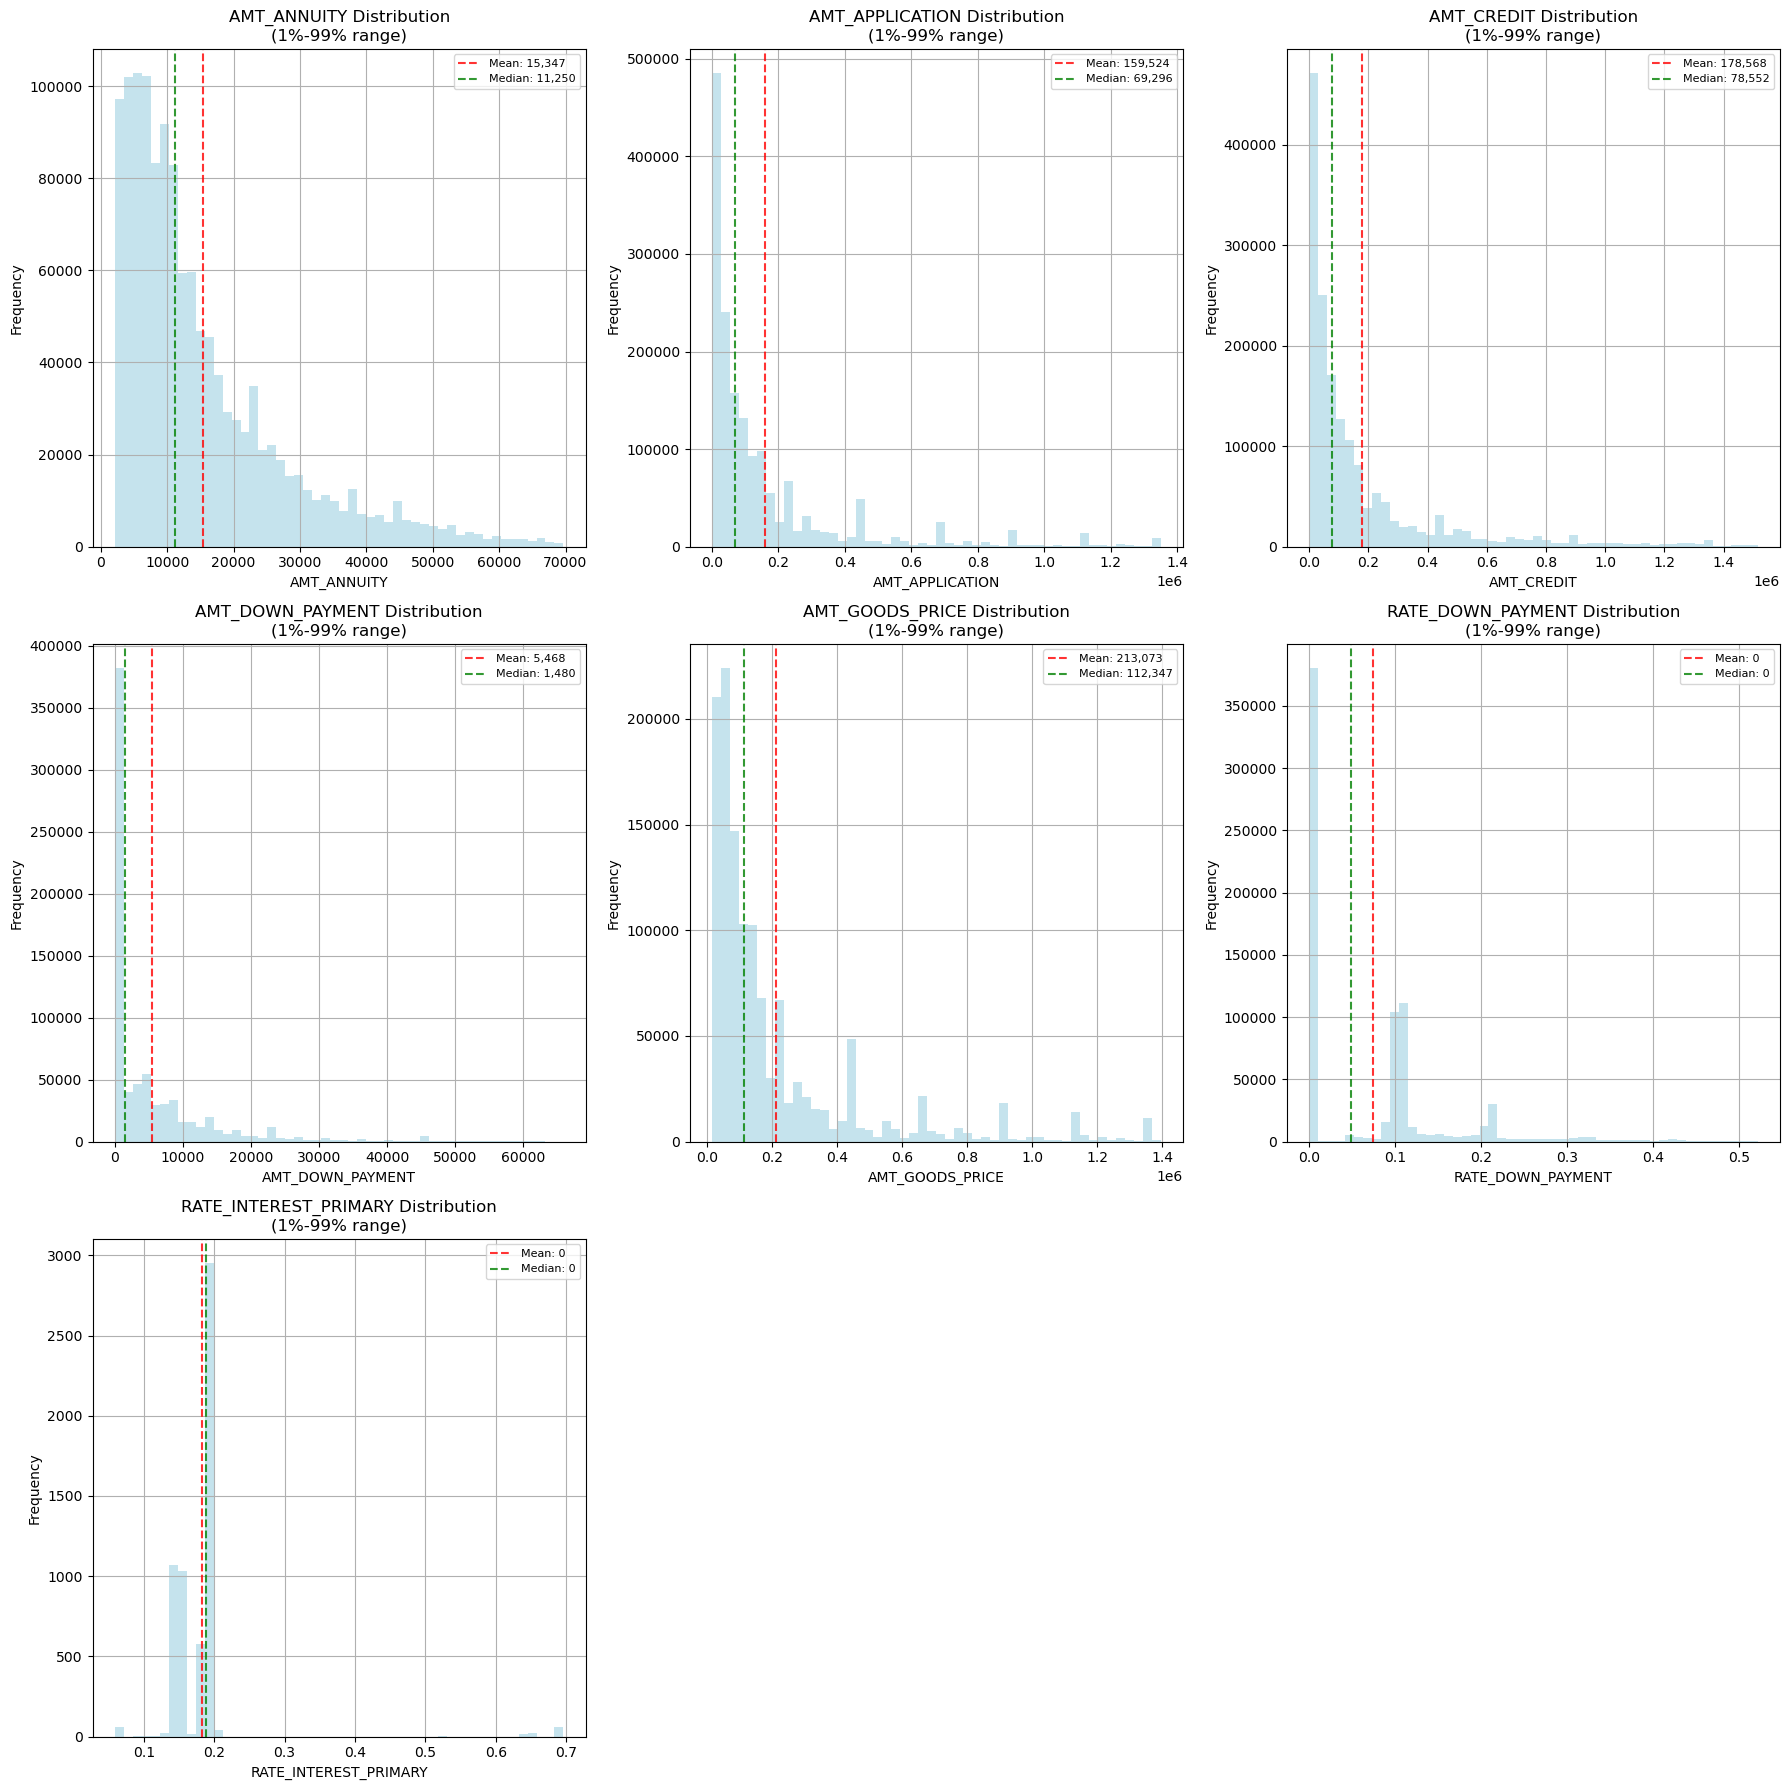

In [100]:
# Visualization
n_amounts = len(existing_amounts)
n_cols = 3
n_rows = (n_amounts + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = [axes] if n_amounts == 1 else axes
else:
    axes = axes.ravel()

for i, field in enumerate(existing_amounts):
    if i < len(axes):
        field_data = prev_app[field].dropna()
        if len(field_data) > 0:
            q99 = field_data.quantile(0.99)
            q1 = field_data.quantile(0.01)
            filtered_data = field_data[(field_data >= q1) & (field_data <= q99)]
            
            filtered_data.hist(bins=50, alpha=0.7, ax=axes[i], color='lightblue')
            axes[i].set_title(f'{field} Distribution\n(1%-99% range)')
            axes[i].set_xlabel(field)
            axes[i].set_ylabel('Frequency')
            
            mean_val = filtered_data.mean()
            median_val = filtered_data.median()
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, 
                           label=f'Mean: {mean_val:,.0f}')
            axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, 
                           label=f'Median: {median_val:,.0f}')
            axes[i].legend(fontsize=8)
for i in range(len(existing_amounts), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

#### 3.6 Timing & Application patterns analysis

In [101]:
time_fields = [
        'DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 
        'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION', 'HOUR_APPR_PROCESS_START'
    ]

In [102]:
existing_time_fields = [field for field in time_fields if field in prev_app.columns]

In [103]:
# Days decision analysis
decision_days = prev_app['DAYS_DECISION'].dropna()
print(f"\nApplication Decision Timeline:")
print(f"  Mean decision time: {-decision_days.mean():.1f} days ago")
print(f"  Median decision time: {-decision_days.median():.1f} days ago")
print(f"  Recent applications (within 30 days): {(decision_days > -30).sum():,}")
print(f"  Old applications (over 1 year): {(decision_days < -365).sum():,}")


Application Decision Timeline:
  Mean decision time: 880.7 days ago
  Median decision time: 581.0 days ago
  Recent applications (within 30 days): 36,012
  Old applications (over 1 year): 1,096,474


In [104]:
# Application time analysis
hours = prev_app['HOUR_APPR_PROCESS_START'].dropna()
print(f"\nApplication Submission Hours:")
print(f"  Peak hour: {hours.mode().iloc[0] if len(hours.mode()) > 0 else 'N/A'}")
print(f"  Business hours (9-17): {((hours >= 9) & (hours <= 17)).sum():,}")
print(f"  After hours (18-8): {((hours < 9) | (hours > 17)).sum():,}")


Application Submission Hours:
  Peak hour: 11
  Business hours (9-17): 1,376,757
  After hours (18-8): 293,457


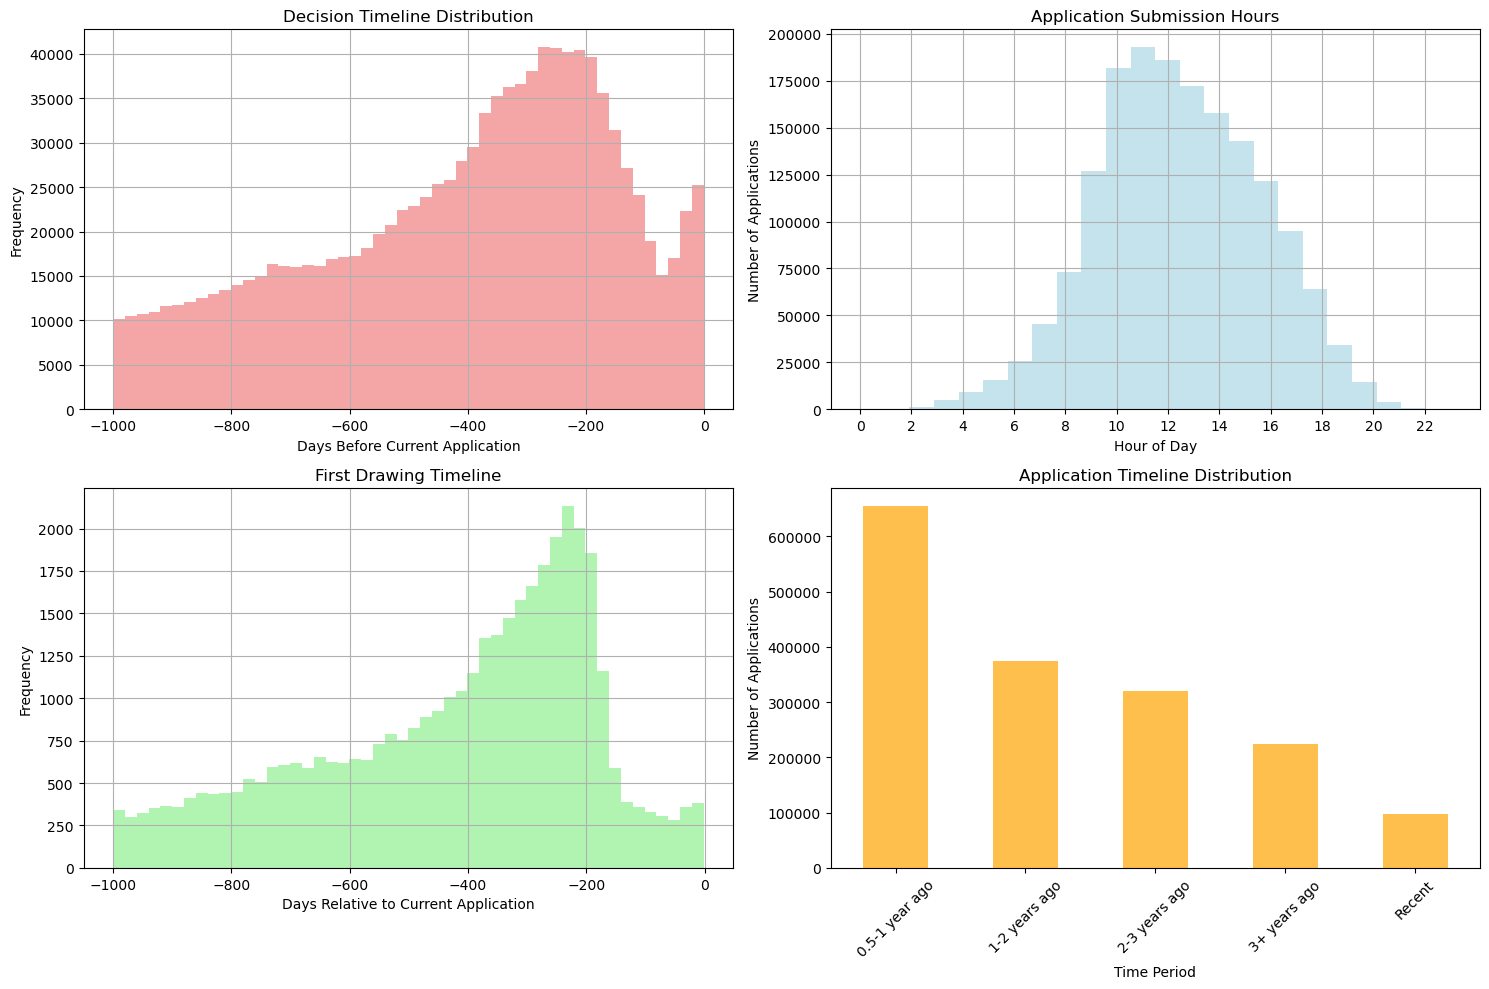

In [105]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Days decision
decision_filtered = prev_app['DAYS_DECISION'][(prev_app['DAYS_DECISION'] >= -1000) & 
                                                    (prev_app['DAYS_DECISION'] <= 0)]
decision_filtered.hist(bins=50, ax=axes[0,0], alpha=0.7, color='lightcoral')
axes[0,0].set_title('Decision Timeline Distribution')
axes[0,0].set_xlabel('Days Before Current Application')
axes[0,0].set_ylabel('Frequency')

# Application time
hours.hist(bins=24, ax=axes[0,1], alpha=0.7, color='lightblue')
axes[0,1].set_title('Application Submission Hours')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Number of Applications')
axes[0,1].set_xticks(range(0, 24, 2))

# Days first drawing
first_drawing = prev_app['DAYS_FIRST_DRAWING'].dropna()
first_drawing_filtered = first_drawing[(first_drawing >= -1000) & (first_drawing <= 100)]
first_drawing_filtered.hist(bins=50, ax=axes[1,0], alpha=0.7, color='lightgreen')
axes[1,0].set_title('First Drawing Timeline')
axes[1,0].set_xlabel('Days Relative to Current Application')
axes[1,0].set_ylabel('Frequency')

# Application Year Trends
decision_years = prev_app['DAYS_DECISION'].dropna()
year_groups = pd.cut(decision_years, bins=[-3000, -2000, -1000, -500, -100, 0],
                   labels=['3+ years ago', '2-3 years ago', '1-2 years ago', 
                         '0.5-1 year ago', 'Recent'])
year_distribution = year_groups.value_counts()
year_distribution.plot(kind='bar', ax=axes[1,1], alpha=0.7, color='orange')
axes[1,1].set_title('Application Timeline Distribution')
axes[1,1].set_xlabel('Time Period')
axes[1,1].set_ylabel('Number of Applications')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3.7 Missing Values Analysis

In [106]:
# Compute missing values
missing_analysis = prev_app.isnull().sum().sort_values(ascending=False)
missing_analysis = missing_analysis[missing_analysis > 0]
missing_analysis

RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
NFLAG_INSURED_ON_APPROVAL     673065
DAYS_TERMINATION              673065
DAYS_LAST_DUE                 673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_FIRST_DUE                673065
DAYS_FIRST_DRAWING            673065
AMT_GOODS_PRICE               385515
AMT_ANNUITY                   372235
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
AMT_CREDIT                         1
dtype: int64

In [107]:
missing_df = pd.DataFrame({
            'Missing_Count': missing_analysis,
            'Missing_Percent': (missing_analysis / len(prev_app)) * 100,
            'Data_Type': [str(prev_app[col].dtype) for col in missing_analysis.index]
        })
missing_df

Missing_Count  Missing_Percent Data_Type
RATE_INTEREST_PRIVILEGED         1664263        99.643698   float64
RATE_INTEREST_PRIMARY            1664263        99.643698   float64
AMT_DOWN_PAYMENT                  895844        53.636480   float64
RATE_DOWN_PAYMENT                 895844        53.636480   float64
NAME_TYPE_SUITE                   820405        49.119754    object
NFLAG_INSURED_ON_APPROVAL         673065        40.298129   float64
DAYS_TERMINATION                  673065        40.298129   float64
DAYS_LAST_DUE                     673065        40.298129   float64
DAYS_LAST_DUE_1ST_VERSION         673065        40.298129   float64
DAYS_FIRST_DUE                    673065        40.298129   float64
DAYS_FIRST_DRAWING                673065        40.298129   float64
AMT_GOODS_PRICE                   385515        23.081773   float64
AMT_ANNUITY                       372235        22.286665   float64
CNT_PAYMENT                       372230        22.286366   float64
PRODUCT_COMBINATION                  346         0.020716    object
AMT_CREDIT                             1         0.000060   float64

In [108]:
# Categorize
critical_missing = missing_df[missing_df['Missing_Percent'] > 80]
high_missing = missing_df[(missing_df['Missing_Percent'] > 50) & (missing_df['Missing_Percent'] <= 80)]
medium_missing = missing_df[(missing_df['Missing_Percent'] > 20) & (missing_df['Missing_Percent'] <= 50)]
low_missing = missing_df[missing_df['Missing_Percent'] <= 20]

In [109]:
print(f"\nMissing Value Categories:")
print(f"  Critical (>80%): {len(critical_missing)} columns")
print(f"  High (50-80%): {len(high_missing)} columns")
print(f"  Medium (20-50%): {len(medium_missing)} columns")
print(f"  Low (≤20%): {len(low_missing)} columns")


Missing Value Categories:
  Critical (>80%): 2 columns
  High (50-80%): 2 columns
  Medium (20-50%): 10 columns
  Low (≤20%): 2 columns


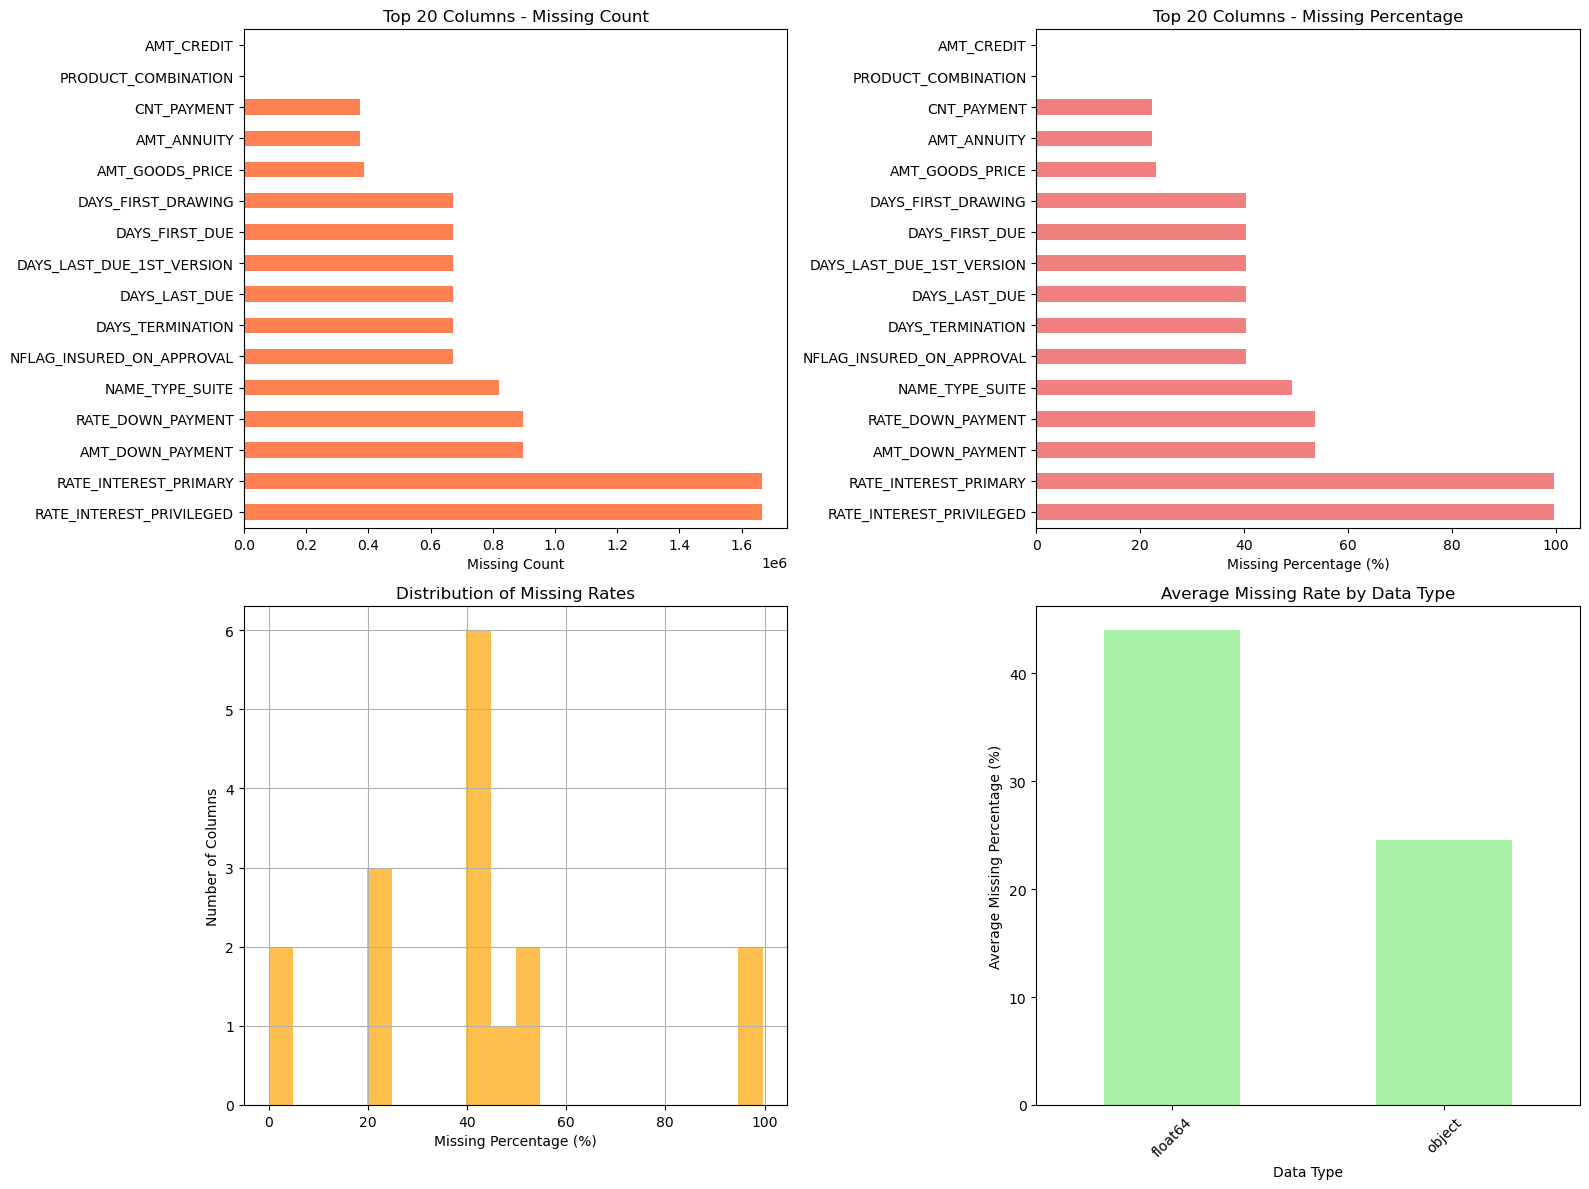

In [110]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_20_missing = missing_df.head(20)
top_20_missing['Missing_Count'].plot(kind='barh', ax=axes[0,0], color='coral')
axes[0,0].set_title('Top 20 Columns - Missing Count')
axes[0,0].set_xlabel('Missing Count')

top_20_missing['Missing_Percent'].plot(kind='barh', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Top 20 Columns - Missing Percentage')
axes[0,1].set_xlabel('Missing Percentage (%)')

missing_df['Missing_Percent'].hist(bins=20, ax=axes[1,0], alpha=0.7, color='orange')
axes[1,0].set_title('Distribution of Missing Rates')
axes[1,0].set_xlabel('Missing Percentage (%)')
axes[1,0].set_ylabel('Number of Columns')

missing_by_type = missing_df.groupby('Data_Type')['Missing_Percent'].mean().sort_values(ascending=False)
if len(missing_by_type) > 0:
    missing_by_type.plot(kind='bar', ax=axes[1,1], color='lightgreen', alpha=0.8)
    axes[1,1].set_title('Average Missing Rate by Data Type')
    axes[1,1].set_xlabel('Data Type')
    axes[1,1].set_ylabel('Average Missing Percentage (%)')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3.8 Internal History vs Target Relationship

In [111]:
basic_agg = prev_app.groupby('SK_ID_CURR').agg({
        'SK_ID_PREV': 'count',  
    }).reset_index()
basic_agg.columns = ['SK_ID_CURR', 'PREV_APP_COUNT']

In [112]:
status_dummies = pd.get_dummies(prev_app[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']], 
                                      columns=['NAME_CONTRACT_STATUS'])
status_agg = status_dummies.groupby('SK_ID_CURR').sum().reset_index()

In [113]:
status_cols = [col for col in status_agg.columns if 'NAME_CONTRACT_STATUS_' in col]
rename_dict = {col: f"PREV_{col.replace('NAME_CONTRACT_STATUS_', '').upper()}_COUNT" 
                      for col in status_cols}
status_agg = status_agg.rename(columns=rename_dict)
client_agg = basic_agg.merge(status_agg, on='SK_ID_CURR', how='left')
client_agg.head()

SK_ID_CURR  PREV_APP_COUNT  PREV_APPROVED_COUNT  PREV_CANCELED_COUNT  \
0      100001               1                    1                    0   
1      100002               1                    1                    0   
2      100003               3                    3                    0   
3      100004               1                    1                    0   
4      100005               2                    1                    1   

   PREV_REFUSED_COUNT  PREV_UNUSED OFFER_COUNT  
0                   0                        0  
1                   0                        0  
2                   0                        0  
3                   0                        0  
4                   0                        0

In [114]:
# Amount fiels stats
amount_fields = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT']
existing_amounts = [field for field in amount_fields if field in prev_app.columns]

In [115]:
amount_agg = prev_app.groupby('SK_ID_CURR')[existing_amounts].agg(['mean', 'max', 'min']).reset_index()
amount_agg.columns = ['SK_ID_CURR'] + [f'PREV_{col[0]}_{col[1].upper()}' 
                                             for col in amount_agg.columns[1:]]
client_agg = client_agg.merge(amount_agg, on='SK_ID_CURR', how='left')
client_agg.head()

SK_ID_CURR  PREV_APP_COUNT  PREV_APPROVED_COUNT  PREV_CANCELED_COUNT  \
0      100001               1                    1                    0   
1      100002               1                    1                    0   
2      100003               3                    3                    0   
3      100004               1                    1                    0   
4      100005               2                    1                    1   

   PREV_REFUSED_COUNT  PREV_UNUSED OFFER_COUNT  PREV_AMT_ANNUITY_MEAN  \
0                   0                        0               3951.000   
1                   0                        0               9251.775   
2                   0                        0              56553.990   
3                   0                        0               5357.250   
4                   0                        0               4813.200   

   PREV_AMT_ANNUITY_MAX  PREV_AMT_ANNUITY_MIN  PREV_AMT_APPLICATION_MEAN  \
0              3951.000              3951.000                   24835.50   
1              9251.775              9251.775                  179055.00   
2             98356.995              6737.310                  435436.50   
3              5357.250              5357.250                   24282.00   
4              4813.200              4813.200                   22308.75   

   PREV_AMT_APPLICATION_MAX  PREV_AMT_APPLICATION_MIN  PREV_AMT_CREDIT_MEAN  \
0                   24835.5                   24835.5              23787.00   
1                  179055.0                  179055.0             179055.00   
2                  900000.0                   68809.5             484191.00   
3                   24282.0                   24282.0              20106.00   
4                   44617.5                       0.0              20076.75   

   PREV_AMT_CREDIT_MAX  PREV_AMT_CREDIT_MIN  PREV_AMT_DOWN_PAYMENT_MEAN  \
0              23787.0              23787.0                      2520.0   
1             179055.0             179055.0                         0.0   
2            1035882.0              68053.5                      3442.5   
3              20106.0              20106.0                      4860.0   
4              40153.5                  0.0                      4464.0   

   PREV_AMT_DOWN_PAYMENT_MAX  PREV_AMT_DOWN_PAYMENT_MIN  
0                     2520.0                     2520.0  
1                        0.0                        0.0  
2                     6885.0                        0.0  
3                     4860.0                     4860.0  
4                     4464.0                     4464.0

In [116]:
app_with_prev = train_app.merge(client_agg, on='SK_ID_CURR', how='left')
app_with_prev.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  PREV_AMT_ANNUITY_MIN PREV_AMT_APPLICATION_MEAN  \
0  ...              9251.775                 179055.00   
1  ...              6737.310                 435436.50   
2  ...              5357.250                  24282.00   
3  ...              2482.920                 272203.26   
4  ...              1834.290                 150530.25   

  PREV_AMT_APPLICATION_MAX PREV_AMT_APPLICATION_MIN PREV_AMT_CREDIT_MEAN  \
0                 179055.0                 179055.0            179055.00   
1                 900000.0                  68809.5            484191.00   
2                  24282.0                  24282.0             20106.00   
3                 688500.0                      0.0            291695.50   
4                 247500.0                  17176.5            166638.75   

  PREV_AMT_CREDIT_MAX  PREV_AMT_CREDIT_MIN  PREV_AMT_DOWN_PAYMENT_MEAN  \
0            179055.0             179055.0                        0.00   
1           1035882.0              68053.5                     3442.50   
2             20106.0              20106.0                     4860.00   
3            906615.0                  0.0                    34840.17   
4            284400.0              14616.0                     3390.75   

   PREV_AMT_DOWN_PAYMENT_MAX  PREV_AMT_DOWN_PAYMENT_MIN  
0                        0.0                       0.00  
1                     6885.0                       0.00  
2                     4860.0                    4860.00  
3                    66987.0                    2693.34  
4                     3676.5                    3105.00  

[5 rows x 139 columns]

In [117]:
numeric_prev_cols = [col for col in client_agg.columns if col != 'SK_ID_CURR']
for col in numeric_prev_cols:
    app_with_prev[col] = app_with_prev[col].fillna(0)

In [118]:
app_with_prev['HAS_PREV_HISTORY'] = (app_with_prev['PREV_APP_COUNT'] > 0).astype(int)

In [119]:
app_with_prev.shape

(307511, 140)

In [120]:
correlation_features = ['PREV_APP_COUNT', 'HAS_PREV_HISTORY'] + numeric_prev_cols[:10] 
existing_corr_features = [col for col in correlation_features if col in app_with_prev.columns]

In [121]:
correlations = []
for feature in existing_corr_features:
    corr = app_with_prev[feature].corr(app_with_prev['TARGET'])
    correlations.append({'Feature': feature, 'Correlation': corr})

In [122]:
corr_df = pd.DataFrame(correlations).sort_values('Correlation', key=abs, ascending=False)
corr_df

Feature  Correlation
5          PREV_REFUSED_COUNT     0.064756
7       PREV_AMT_ANNUITY_MEAN    -0.026242
9        PREV_AMT_ANNUITY_MIN    -0.026148
3         PREV_APPROVED_COUNT    -0.023522
0              PREV_APP_COUNT     0.023513
2              PREV_APP_COUNT     0.023513
8        PREV_AMT_ANNUITY_MAX    -0.021982
4         PREV_CANCELED_COUNT     0.020757
1            HAS_PREV_HISTORY     0.018476
10  PREV_AMT_APPLICATION_MEAN    -0.016618
11   PREV_AMT_APPLICATION_MAX    -0.008378
6     PREV_UNUSED OFFER_COUNT     0.001528

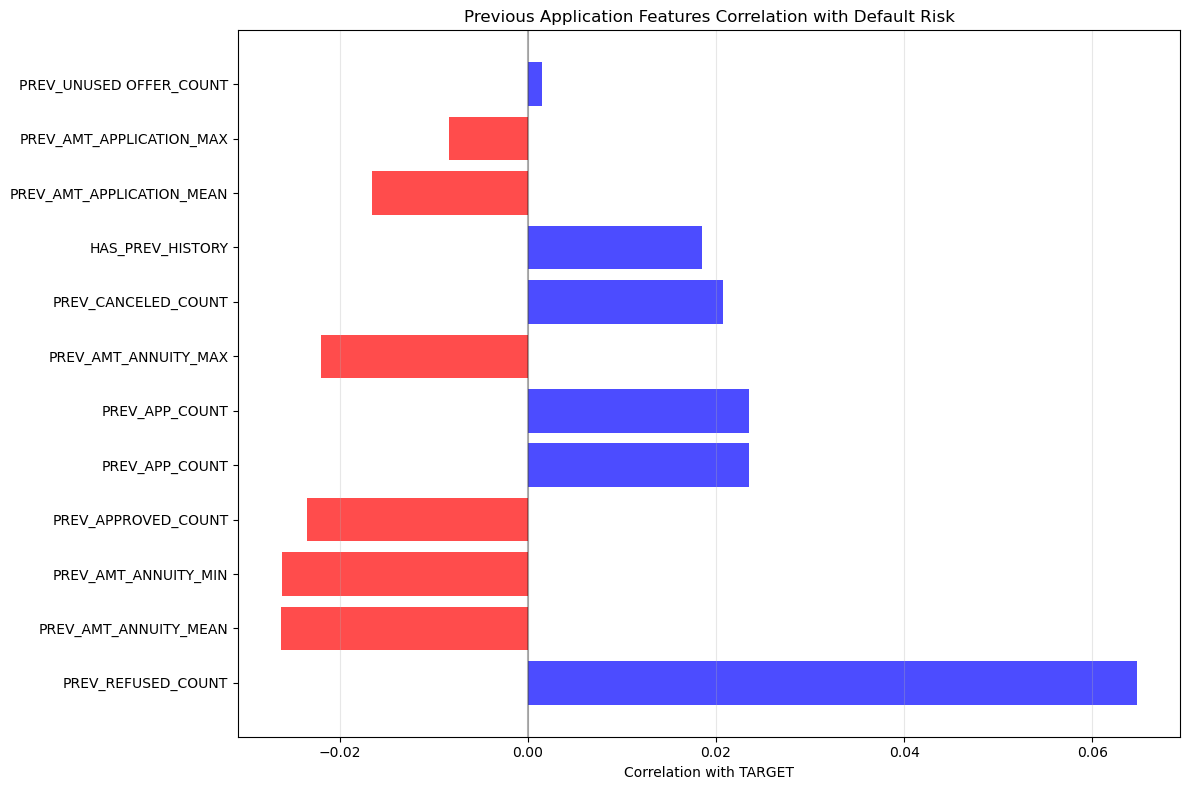

In [123]:
# Visualization
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in corr_df['Correlation']]
plt.barh(range(len(corr_df)), corr_df['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(corr_df)), corr_df['Feature'])
plt.xlabel('Correlation with TARGET')
plt.title('Previous Application Features Correlation with Default Risk')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

In [124]:
# Client segmentation by previous history
has_history = app_with_prev['HAS_PREV_HISTORY'] == 1
no_history = app_with_prev['HAS_PREV_HISTORY'] == 0

In [125]:
print(f"Basic Segmentation:")
print(f"  Clients with previous history: {has_history.sum():,} ({has_history.mean()*100:.1f}%)")
print(f"  New clients (no history): {no_history.sum():,} ({no_history.mean()*100:.1f}%)")

Basic Segmentation:
  Clients with previous history: 291,057 (94.6%)
  New clients (no history): 16,454 (5.4%)


In [126]:
# Compare default rate
default_rate_with_history = app_with_prev[has_history]['TARGET'].mean()
default_rate_no_history = app_with_prev[no_history]['TARGET'].mean()

In [127]:
print(f"\nDefault Rate Analysis:")
print(f"  Default rate - WITH previous history: {default_rate_with_history*100:.2f}%")
print(f"  Default rate - NO previous history: {default_rate_no_history*100:.2f}%")
print(f"  Risk difference: {(default_rate_with_history - default_rate_no_history)*100:+.2f} percentage points")


Default Rate Analysis:
  Default rate - WITH previous history: 8.19%
  Default rate - NO previous history: 5.96%
  Risk difference: +2.24 percentage points


In [128]:
# Analyze risk based on the number of applications
app_count_groups = pd.cut(app_with_prev['PREV_APP_COUNT'], 
                                bins=[0, 1, 2, 3, 5, float('inf')], 
                                labels=['0', '1', '2', '3-5', '5+'],
                                include_lowest=True)


In [129]:
risk_by_app_count = app_with_prev.groupby(app_count_groups)['TARGET'].agg(['count', 'mean'])
risk_by_app_count['default_rate_pct'] = risk_by_app_count['mean'] * 100

In [130]:
print("Risk by number of previous applications:")
for group in risk_by_app_count.index:
    count = risk_by_app_count.loc[group, 'count']
    rate = risk_by_app_count.loc[group, 'default_rate_pct']
    print(f"  {group} previous apps: {count:,} clients, {rate:.2f}% default rate")

Risk by number of previous applications:
  0 previous apps: 68,987 clients, 7.80% default rate
  1 previous apps: 45,799 clients, 7.86% default rate
  2 previous apps: 40,014 clients, 7.81% default rate
  3-5 previous apps: 59,560 clients, 7.70% default rate
  5+ previous apps: 93,151 clients, 8.73% default rate


In [131]:
# Analyze risks based on historical application status
approved_cols = [col for col in app_with_prev.columns if 'APPROVED' in col.upper()]
approved_col = approved_cols[0]
approved_col

'PREV_APPROVED_COUNT'

In [132]:
app_with_prev['APPROVAL_HISTORY'] = 'No History'
app_with_prev.loc[app_with_prev[approved_col] > 0, 'APPROVAL_HISTORY'] = 'Has Approved'

In [133]:
if any('REFUSED' in col.upper() for col in app_with_prev.columns):
    refused_cols = [col for col in app_with_prev.columns if 'REFUSED' in col.upper()]
    if refused_cols:
        refused_col = refused_cols[0]
        app_with_prev.loc[(app_with_prev[approved_col] == 0) & 
                        (app_with_prev[refused_col] > 0), 'APPROVAL_HISTORY'] = 'Only Refused'

In [134]:
approval_risk = app_with_prev.groupby('APPROVAL_HISTORY')['TARGET'].agg(['count', 'mean'])
approval_risk['default_rate_pct'] = approval_risk['mean'] * 100

In [135]:
print("Risk by approval history:")
for group in approval_risk.index:
    count = approval_risk.loc[group, 'count']
    rate = approval_risk.loc[group, 'default_rate_pct']
    print(f"  {group}: {count:,} clients, {rate:.2f}% default rate")

Risk by approval history:
  Has Approved: 290,065 clients, 8.19% default rate
  No History: 16,847 clients, 5.94% default rate
  Only Refused: 599 clients, 10.85% default rate


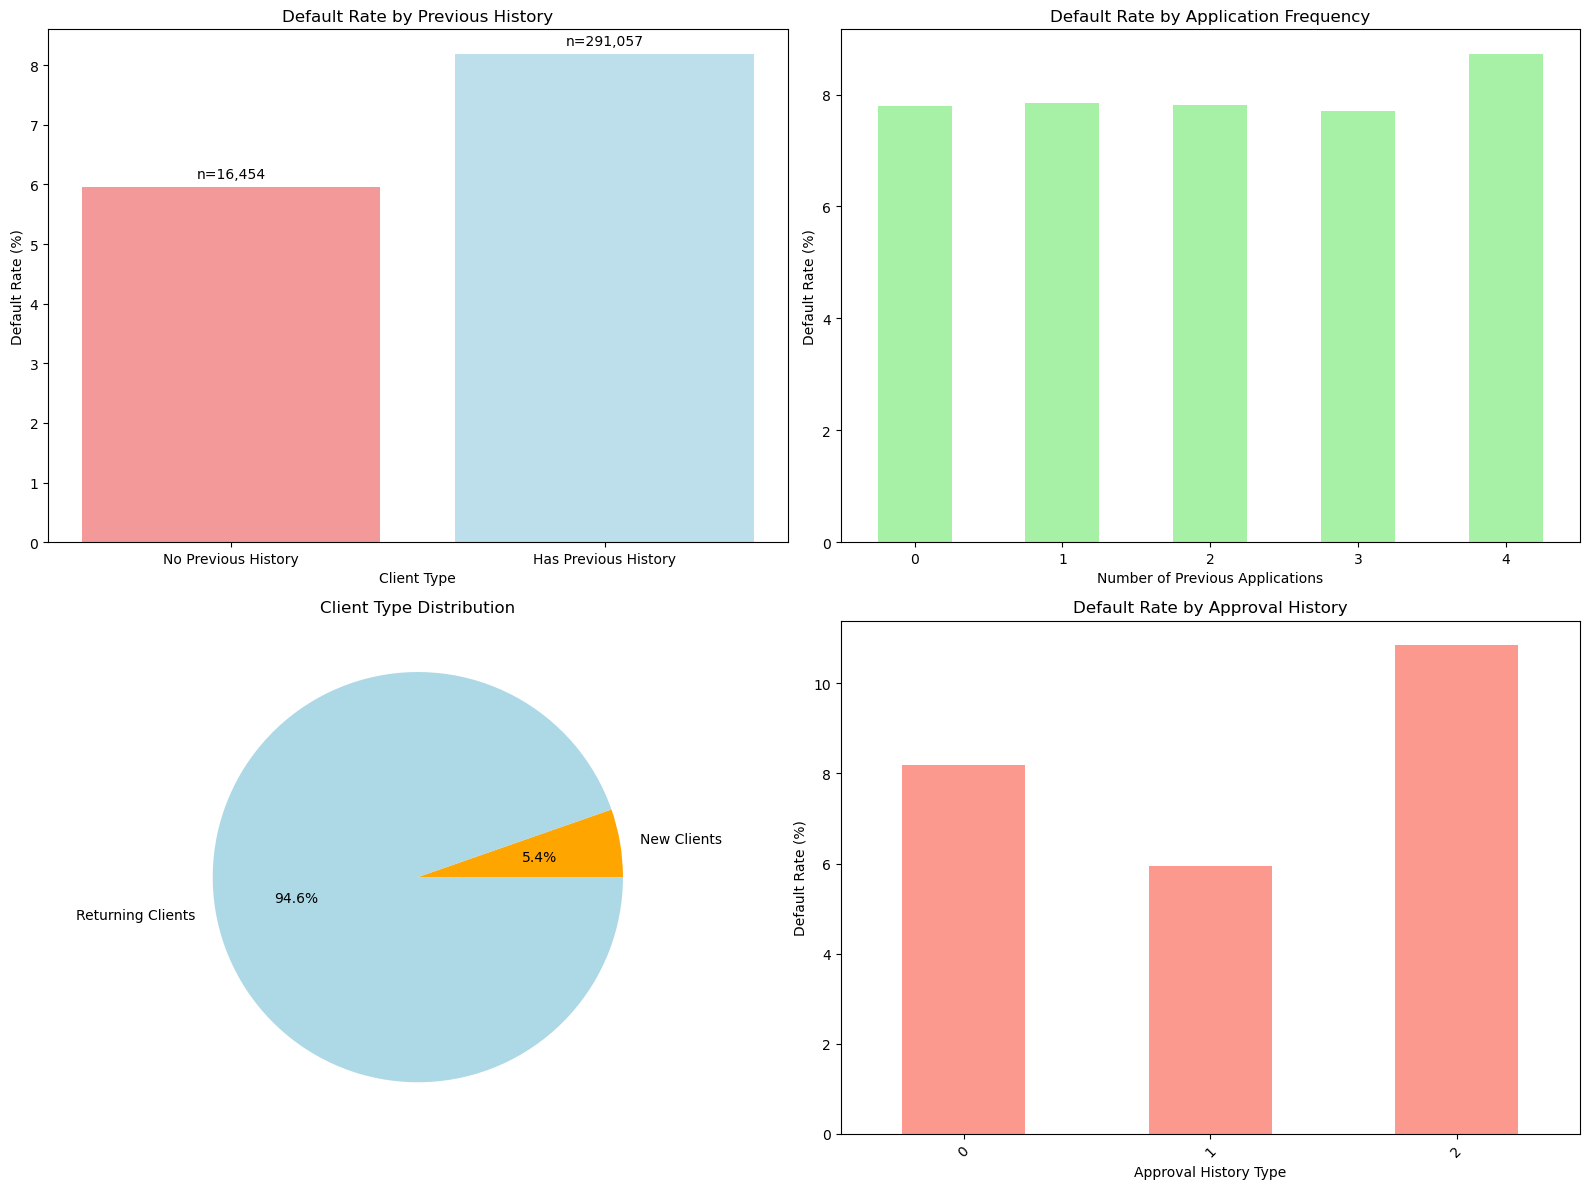

In [136]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# No previous history vs Has previous history
history_groups = ['No Previous History', 'Has Previous History']
history_default_rates = [default_rate_no_history*100, default_rate_with_history*100]
history_counts = [no_history.sum(), has_history.sum()]

x_pos = np.arange(len(history_groups))
bars = axes[0,0].bar(x_pos, history_default_rates, color=['lightcoral', 'lightblue'], alpha=0.8)
axes[0,0].set_title('Default Rate by Previous History')
axes[0,0].set_xlabel('Client Type')
axes[0,0].set_ylabel('Default Rate (%)')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(history_groups)

for i, (bar, count) in enumerate(zip(bars, history_counts)):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                      f'n={count:,}', ha='center', va='bottom')

# Number of previous applications vs Default rate
risk_by_app_count.reset_index()['default_rate_pct'].plot(kind='bar', ax=axes[0,1], 
                                                               color='lightgreen', alpha=0.8)
axes[0,1].set_title('Default Rate by Application Frequency')
axes[0,1].set_xlabel('Number of Previous Applications')
axes[0,1].set_ylabel('Default Rate (%)')
axes[0,1].tick_params(axis='x', rotation=0)

# Client type
client_type_counts = [no_history.sum(), has_history.sum()]
axes[1,0].pie(client_type_counts, labels=['New Clients', 'Returning Clients'], 
                  autopct='%1.1f%%', colors=['orange', 'lightblue'])
axes[1,0].set_title('Client Type Distribution')

# Approval history type vs Default rate
approval_risk.reset_index()['default_rate_pct'].plot(kind='bar', ax=axes[1,1],
                                                           color='salmon', alpha=0.8)
axes[1,1].set_title('Default Rate by Approval History')
axes[1,1].set_xlabel('Approval History Type')
axes[1,1].set_ylabel('Default Rate (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3.9 Key Insights
1. Aggregate to client level for modeling
2. Handle high missing rate columns (>80% missing)
3. Create binary indicators for categorical relationships

#### 3.10 Next Steps
1. Ready to move to Payment Behavior analysis

## 4. Payment Behavior Analysis

#### 4.1 Installments

##### 4.1.1 Basic information

In [137]:
# Basic information
install_pay.shape

(13605401, 8)

In [138]:
install_pay.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

In [139]:
install_pay.memory_usage(deep=True)

Index                           128
SK_ID_PREV                108843208
SK_ID_CURR                108843208
NUM_INSTALMENT_VERSION    108843208
NUM_INSTALMENT_NUMBER     108843208
DAYS_INSTALMENT           108843208
DAYS_ENTRY_PAYMENT        108843208
AMT_INSTALMENT            108843208
AMT_PAYMENT               108843208
dtype: int64

In [140]:
# Key ID analysis
install_pay['SK_ID_CURR'].nunique()

339587

In [141]:
install_pay['SK_ID_PREV'].nunique()

997752

In [142]:
# Installments per loan
install_pay.shape[0] / install_pay['SK_ID_PREV'].nunique()

13.636054851305735

In [143]:
# Installments per client
install_pay.shape[0] / install_pay['SK_ID_CURR'].nunique()

40.06455194103425

In [144]:
main_clients = set(train_app['SK_ID_CURR'])
inst_clients = set(install_pay['SK_ID_CURR'])
overlap_clients = main_clients.intersection(inst_clients)

In [145]:
print(f"\nTable Relationships:")
print(f"  Clients in main table: {len(main_clients):,}")
print(f"  Clients in installments: {len(inst_clients):,}")
print(f"  Overlap with main: {len(overlap_clients):,} ({len(overlap_clients)/len(main_clients)*100:.1f}%)")


Table Relationships:
  Clients in main table: 307,511
  Clients in installments: 339,587
  Overlap with main: 291,643 (94.8%)


In [146]:
prev_loans = set(prev_app['SK_ID_PREV'])
inst_loans = set(install_pay['SK_ID_PREV'])
loan_overlap = prev_loans.intersection(inst_loans)

In [147]:
print(f"\nTable Relationships:")
print(f"  Previous loans: {len(prev_loans):,}")
print(f"  Installment loans: {len(inst_loans):,}")
print(f"  Loan overlap: {len(loan_overlap):,} ({len(loan_overlap)/len(prev_loans)*100:.1f}%)")


Table Relationships:
  Previous loans: 1,670,214
  Installment loans: 997,752
  Loan overlap: 958,905 (57.4%)


In [148]:
# Key fields analysis
key_fields = ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 
                 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 
                 'AMT_INSTALMENT', 'AMT_PAYMENT']

In [149]:
existing_fields = [field for field in key_fields if field in install_pay.columns]

In [150]:
print(f"\nKey Fields Found ({len(existing_fields)}/{len(key_fields)}):")
for field in existing_fields:
    non_null = install_pay[field].notna().sum()
    print(f"  {field}: {non_null:,} non-null values")


Key Fields Found (6/6):
  NUM_INSTALMENT_VERSION: 13,605,401 non-null values
  NUM_INSTALMENT_NUMBER: 13,605,401 non-null values
  DAYS_INSTALMENT: 13,605,401 non-null values
  DAYS_ENTRY_PAYMENT: 13,602,496 non-null values
  AMT_INSTALMENT: 13,605,401 non-null values
  AMT_PAYMENT: 13,602,496 non-null values


##### 4.1.2 Installments - repayment bahavior analysis

In [151]:
# Basic repayment
print(f"Payment Amount Analysis:")
print(f"  Planned installments (AMT_INSTALMENT):")
print(f"    Mean: {install_pay['AMT_INSTALMENT'].mean():,.2f}")
print(f"    Median: {install_pay['AMT_INSTALMENT'].median():,.2f}")
print(f"    Max: {install_pay['AMT_INSTALMENT'].max():,.2f}")

Payment Amount Analysis:
  Planned installments (AMT_INSTALMENT):
    Mean: 17,050.91
    Median: 8,884.08
    Max: 3,771,487.85


In [152]:
print(f"  Actual payments (AMT_PAYMENT):")
print(f"    Mean: {install_pay['AMT_PAYMENT'].mean():,.2f}")
print(f"    Median: {install_pay['AMT_PAYMENT'].median():,.2f}")
print(f"    Max: {install_pay['AMT_PAYMENT'].max():,.2f}")

  Actual payments (AMT_PAYMENT):
    Mean: 17,238.22
    Median: 8,125.52
    Max: 3,771,487.85


In [153]:
install_pay['PAYMENT_RATIO'] = install_pay['AMT_PAYMENT'] / install_pay['AMT_INSTALMENT']
install_pay['PAYMENT_DIFFERENCE'] = install_pay['AMT_PAYMENT'] - install_pay['AMT_INSTALMENT']

In [154]:
print(f"\Payment Performance Metrics:")
print(f"  Payment ratio (actual/planned):")
print(f"    Mean: {install_pay['PAYMENT_RATIO'].mean():.3f}")
print(f"    Median: {install_pay['PAYMENT_RATIO'].median():.3f}")

\Payment Performance Metrics:
  Payment ratio (actual/planned):
    Mean: inf
    Median: 1.000


In [155]:
overpaid = (install_pay['PAYMENT_RATIO'] > 1.01).sum()
exact_paid = ((install_pay['PAYMENT_RATIO'] >= 0.99) & 
             (install_pay['PAYMENT_RATIO'] <= 1.01)).sum()
underpaid = (install_pay['PAYMENT_RATIO'] < 0.99).sum()
total_payments = len(install_pay)

In [156]:
print(f"\nPayment Behavior Categories:")
print(f"  Overpaid (>101%): {overpaid:,} ({overpaid/total_payments*100:.1f}%)")
print(f"  Exact payment (99-101%): {exact_paid:,} ({exact_paid/total_payments*100:.1f}%)")
print(f"  Underpaid (<99%): {underpaid:,} ({underpaid/total_payments*100:.1f}%)")


Payment Behavior Categories:
  Overpaid (>101%): 178,279 (1.3%)
  Exact payment (99-101%): 12,355,711 (90.8%)
  Underpaid (<99%): 1,068,504 (7.9%)


In [157]:
# Repayment timing analysis
install_pay['PAYMENT_DELAY'] = install_pay['DAYS_ENTRY_PAYMENT'] - install_pay['DAYS_INSTALMENT']

In [158]:
install_pay['PAYMENT_DELAY'].describe()

count    1.360250e+07
mean    -8.787405e+00
std      2.553990e+01
min     -3.189000e+03
25%     -1.400000e+01
50%     -6.000000e+00
75%      0.000000e+00
max      2.884000e+03
Name: PAYMENT_DELAY, dtype: float64

In [159]:
early = (install_pay['PAYMENT_DELAY'] < -1).sum()
on_time = ((install_pay['PAYMENT_DELAY'] >= -1) & 
                  (install_pay['PAYMENT_DELAY'] <= 1)).sum()
late = (install_pay['PAYMENT_DELAY'] > 1).sum()

In [160]:
print(f"\nPayment Timing Categories:")
print(f"  Early (>1 day early): {early:,} ({early/total_payments*100:.1f}%)")
print(f"  On-time (±1 day): {on_time:,} ({on_time/total_payments*100:.1f}%)")
print(f"  Late (>1 day late): {late:,} ({late/total_payments*100:.1f}%)")


Payment Timing Categories:
  Early (>1 day early): 8,784,097 (64.6%)
  On-time (±1 day): 3,937,826 (28.9%)
  Late (>1 day late): 880,573 (6.5%)


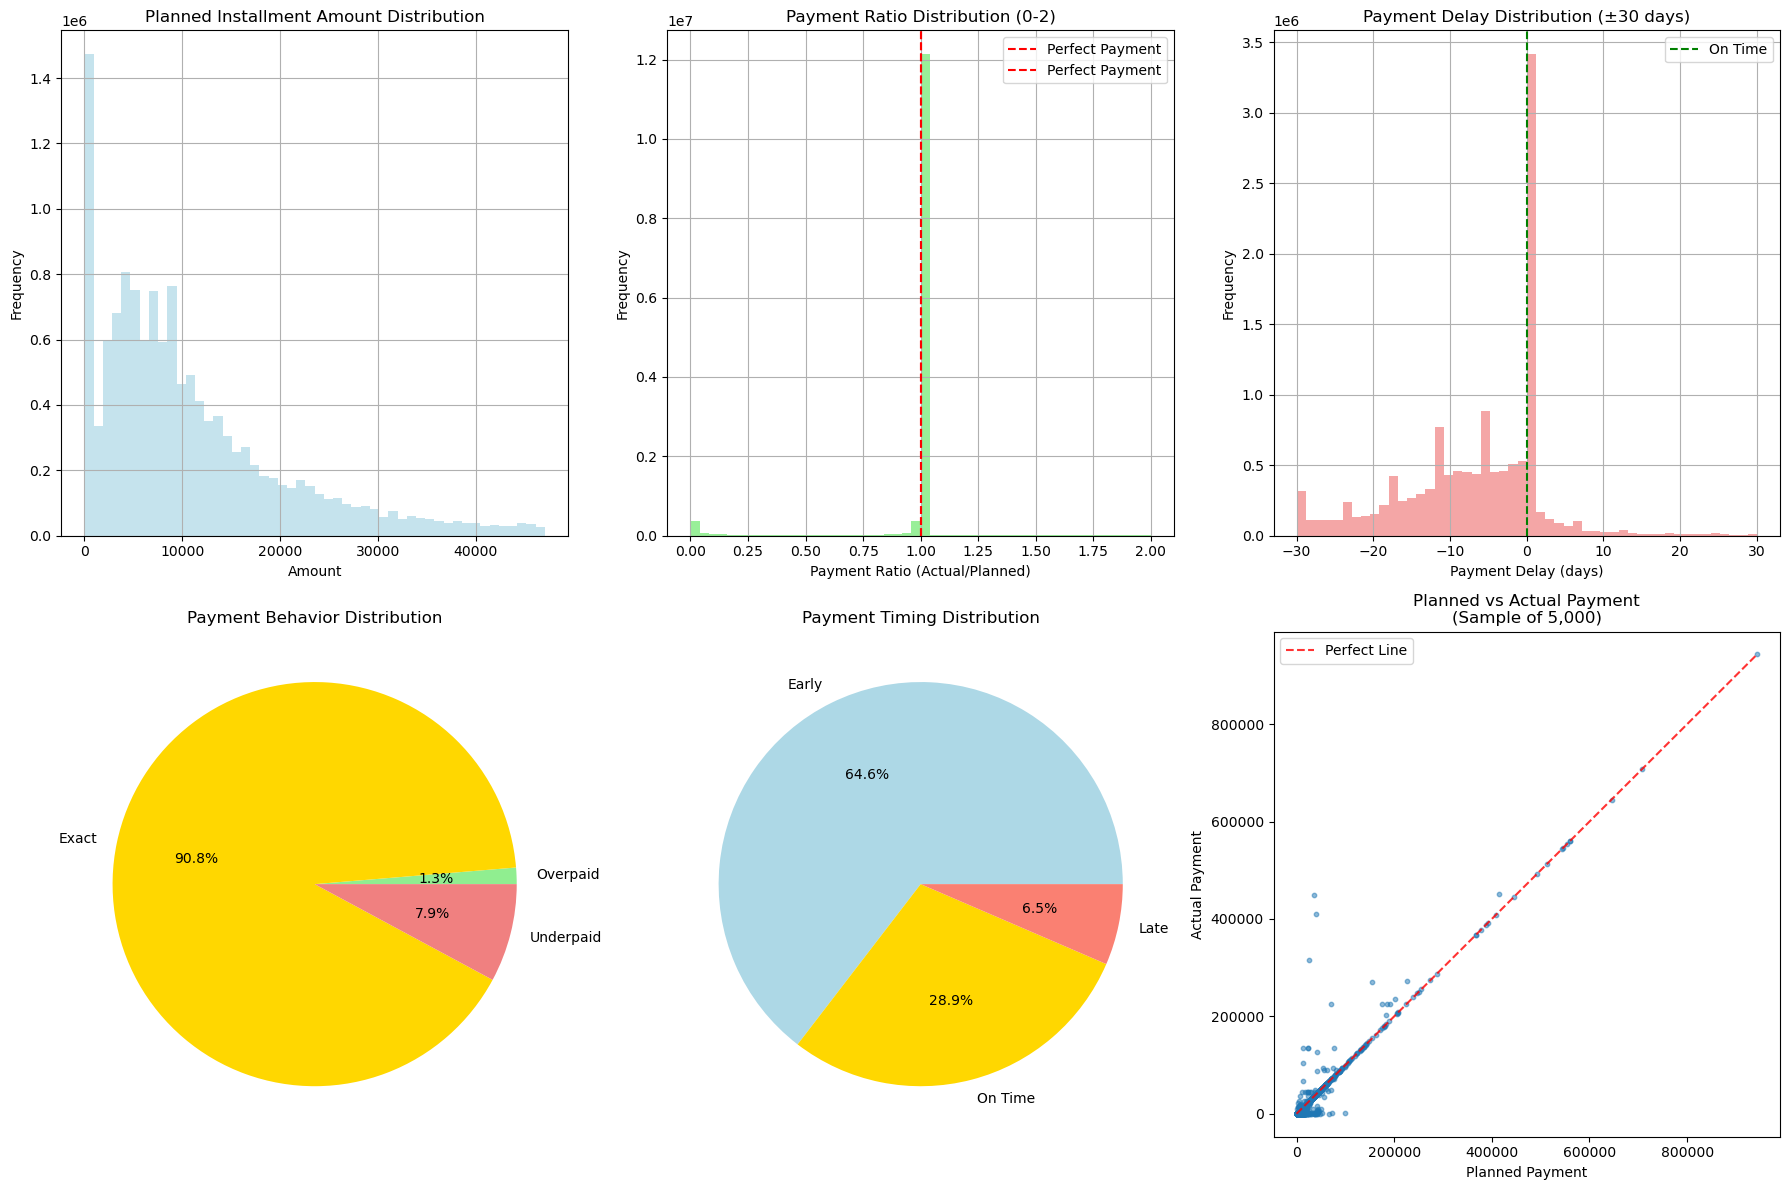

In [161]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution of repayment amounts
amt_filtered = install_pay['AMT_INSTALMENT'][install_pay['AMT_INSTALMENT'] <= 
                                                    install_pay['AMT_INSTALMENT'].quantile(0.95)]
amt_filtered.hist(bins=50, ax=axes[0,0], alpha=0.7, color='lightblue')
axes[0,0].set_title('Planned Installment Amount Distribution')
axes[0,0].set_xlabel('Amount')
axes[0,0].set_ylabel('Frequency')

# Distribution of payment ratio
ratio_filtered = install_pay['PAYMENT_RATIO'][(install_pay['PAYMENT_RATIO'] >= 0) & 
                                                      (install_pay['PAYMENT_RATIO'] <= 2)]
ratio_filtered.hist(bins=50, ax=axes[0,1], alpha=0.7, color='lightgreen')
axes[0,1].set_title('Payment Ratio Distribution (0-2)')
axes[0,1].set_xlabel('Payment Ratio (Actual/Planned)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(1.0, color='red', linestyle='--', label='Perfect Payment')
axes[0,1].legend()

# Distribution of payment ratio
ratio_filtered = install_pay['PAYMENT_RATIO'][(install_pay['PAYMENT_RATIO'] >= 0) & 
                                                      (install_pay['PAYMENT_RATIO'] <= 2)]
ratio_filtered.hist(bins=50, ax=axes[0,1], alpha=0.7, color='lightgreen')
axes[0,1].set_title('Payment Ratio Distribution (0-2)')
axes[0,1].set_xlabel('Payment Ratio (Actual/Planned)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(1.0, color='red', linestyle='--', label='Perfect Payment')
axes[0,1].legend()

# Distribution of payment dalay
delay_filtered = install_pay['PAYMENT_DELAY'][(install_pay['PAYMENT_DELAY'] >= -30) & 
                                                      (install_pay['PAYMENT_DELAY'] <= 30)]
delay_filtered.hist(bins=50, ax=axes[0,2], alpha=0.7, color='lightcoral')
axes[0,2].set_title('Payment Delay Distribution (±30 days)')
axes[0,2].set_xlabel('Payment Delay (days)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].axvline(0, color='green', linestyle='--', label='On Time')
axes[0,2].legend()

# Repayment behavior pie chat
behavior_labels = ['Overpaid', 'Exact', 'Underpaid']
behavior_counts = [overpaid, exact_paid, underpaid]
axes[1,0].pie(behavior_counts, labels=behavior_labels, autopct='%1.1f%%',
             colors=['lightgreen', 'gold', 'lightcoral'])
axes[1,0].set_title('Payment Behavior Distribution')

# Payment Timing Distribution
timing_labels = ['Early', 'On Time', 'Late']
timing_counts = [early, on_time, late]
axes[1,1].pie(timing_counts, labels=timing_labels, autopct='%1.1f%%',
             colors=['lightblue', 'gold', 'salmon'])
axes[1,1].set_title('Payment Timing Distribution')

# Planned vs Actual Payment
sample_size = min(5000, len(install_pay))
sample_data = install_pay.sample(sample_size)
axes[1,2].scatter(sample_data['AMT_INSTALMENT'], sample_data['AMT_PAYMENT'], 
                 alpha=0.5, s=10)
max_amt = max(sample_data['AMT_INSTALMENT'].max(), sample_data['AMT_PAYMENT'].max())
axes[1,2].plot([0, max_amt], [0, max_amt], 'r--', alpha=0.8, label='Perfect Line')
axes[1,2].set_title(f'Planned vs Actual Payment\n(Sample of {sample_size:,})')
axes[1,2].set_xlabel('Planned Payment')
axes[1,2].set_ylabel('Actual Payment')
axes[1,2].legend()

plt.tight_layout()
plt.show()

#### 4.2 POS Cash Balance

##### 4.2.1 Basic information

In [162]:
# Basic informaiton
pos_cash.shape

(10001358, 8)

In [163]:
pos_cash.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [164]:
pos_cash.memory_usage(deep=True)

Index                          128
SK_ID_PREV                80010864
SK_ID_CURR                80010864
MONTHS_BALANCE            80010864
CNT_INSTALMENT            80010864
CNT_INSTALMENT_FUTURE     80010864
NAME_CONTRACT_STATUS     632417064
SK_DPD                    80010864
SK_DPD_DEF                80010864
dtype: int64

In [165]:
pos_cash.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [166]:
# Key ID analysis
pos_cash['SK_ID_CURR'].nunique()

337252

In [167]:
pos_cash['SK_ID_PREV'].nunique()

936325

In [168]:
# Records per loan
pos_cash.shape[0] / pos_cash['SK_ID_PREV'].nunique()

10.68150268336315

In [169]:
# Records per client
pos_cash.shape[0] / pos_cash['SK_ID_CURR'].nunique()

29.655444593360453

In [170]:
# Month balance analysis
months_range = pos_cash['MONTHS_BALANCE'].describe()
months_range

count    1.000136e+07
mean    -3.501259e+01
std      2.606657e+01
min     -9.600000e+01
25%     -5.400000e+01
50%     -2.800000e+01
75%     -1.300000e+01
max     -1.000000e+00
Name: MONTHS_BALANCE, dtype: float64

In [171]:
# Key fields
key_fields = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE',
                 'SK_DPD', 'SK_DPD_DEF']

In [172]:
existing_fields = [field for field in key_fields if field in pos_cash.columns]

In [173]:
print(f"\nKey Fields Found ({len(existing_fields)}/{len(key_fields)}):")
for field in existing_fields:
    non_null = pos_cash[field].notna().sum()
    unique_vals = pos_cash[field].nunique()
    print(f"  {field}: {non_null:,} non-null, {unique_vals} unique values")


Key Fields Found (5/5):
  MONTHS_BALANCE: 10,001,358 non-null, 96 unique values
  CNT_INSTALMENT: 9,975,287 non-null, 73 unique values
  CNT_INSTALMENT_FUTURE: 9,975,271 non-null, 79 unique values
  SK_DPD: 10,001,358 non-null, 3400 unique values
  SK_DPD_DEF: 10,001,358 non-null, 2307 unique values


In [174]:
main_clients = set(train_app['SK_ID_CURR'])
pos_clients = set(pos_cash['SK_ID_CURR'])
overlap = main_clients.intersection(pos_clients)

In [175]:
print(f"\nMain Table Relationship:")
print(f"  POS Cash clients: {len(pos_clients):,}")
print(f"  Overlap with main: {len(overlap):,} ({len(overlap)/len(main_clients)*100:.1f}%)")


Main Table Relationship:
  POS Cash clients: 337,252
  Overlap with main: 289,444 (94.1%)


##### 4.2.2 Pos Cash - payment status & delinquency analysis

In [176]:
print(f"Installment Status Analysis:")
print(f"  Total installments:")
print(f"    Mean: {pos_cash['CNT_INSTALMENT'].mean():.1f}")
print(f"    Median: {pos_cash['CNT_INSTALMENT'].median():.1f}")
print(f"    Max: {pos_cash['CNT_INSTALMENT'].max()}")

print(f"  Future installments:")
print(f"    Mean: {pos_cash['CNT_INSTALMENT_FUTURE'].mean():.1f}")
print(f"    Median: {pos_cash['CNT_INSTALMENT_FUTURE'].median():.1f}")

Installment Status Analysis:
  Total installments:
    Mean: 17.1
    Median: 12.0
    Max: 92.0
  Future installments:
    Mean: 10.5
    Median: 7.0


In [177]:
# Compute completion reatio
pos_cash['COMPLETION_RATIO'] = (pos_cash['CNT_INSTALMENT'] - pos_cash['CNT_INSTALMENT_FUTURE']) / pos_cash['CNT_INSTALMENT']

In [178]:
pos_cash['COMPLETION_RATIO'].describe()

count    9.975174e+06
mean     4.530058e-01
std      3.303088e-01
min     -5.666667e+00
25%      1.666667e-01
50%      4.166667e-01
75%      7.500000e-01
max      1.000000e+00
Name: COMPLETION_RATIO, dtype: float64

In [179]:
# Days past due analysis
dpd_stats = pos_cash['SK_DPD'].describe()
print(f"\nDays Past Due (DPD) Analysis:")
print(f"  Mean DPD: {dpd_stats['mean']:.1f} days")
print(f"  Median DPD: {dpd_stats['50%']:.1f} days")
print(f"  Max DPD: {dpd_stats['max']:.0f} days")


Days Past Due (DPD) Analysis:
  Mean DPD: 11.6 days
  Median DPD: 0.0 days
  Max DPD: 4231 days


In [180]:
current = (pos_cash['SK_DPD'] == 0).sum()
dpd_1_30 = ((pos_cash['SK_DPD'] > 0) & (pos_cash['SK_DPD'] <= 30)).sum()
dpd_31_60 = ((pos_cash['SK_DPD'] > 30) & (pos_cash['SK_DPD'] <= 60)).sum()
dpd_60_plus = (pos_cash['SK_DPD'] > 60).sum()
total_records = len(pos_cash)

In [181]:
print(f"\nDPD Categories:")
print(f"  Current (0 DPD): {current:,} ({current/total_records*100:.1f}%)")
print(f"  1-30 DPD: {dpd_1_30:,} ({dpd_1_30/total_records*100:.1f}%)")
print(f"  31-60 DPD: {dpd_31_60:,} ({dpd_31_60/total_records*100:.1f}%)")
print(f"  60+ DPD: {dpd_60_plus:,} ({dpd_60_plus/total_records*100:.1f}%)")


DPD Categories:
  Current (0 DPD): 9,706,131 (97.0%)
  1-30 DPD: 163,169 (1.6%)
  31-60 DPD: 7,944 (0.1%)
  60+ DPD: 124,114 (1.2%)


In [182]:
# Default DPD analysis
dpd_def_stats = pos_cash['SK_DPD_DEF'].describe()
print(f"\nDefault DPD Analysis:")
print(f"  Mean default DPD: {dpd_def_stats['mean']:.1f} days")
print(f"  Records with default DPD > 0: {(pos_cash['SK_DPD_DEF'] > 0).sum():,}")


Default DPD Analysis:
  Mean default DPD: 0.7 days
  Records with default DPD > 0: 113,969


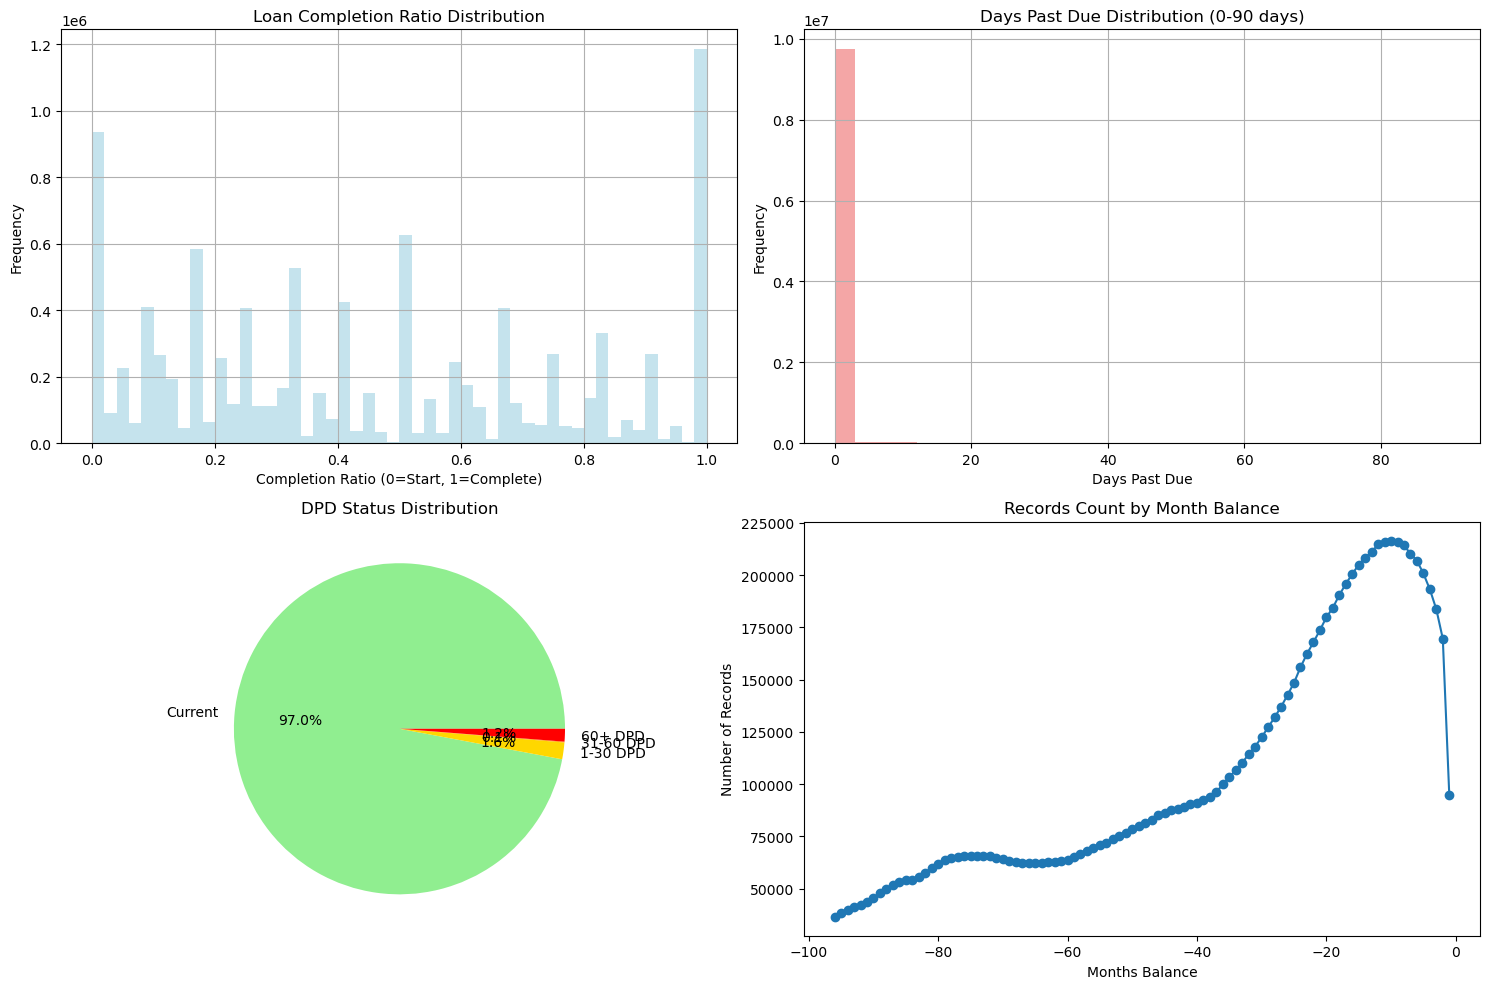

In [183]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Completion ratio
completion_filtered = pos_cash['COMPLETION_RATIO'][(pos_cash['COMPLETION_RATIO'] >= 0) & 
                                                          (pos_cash['COMPLETION_RATIO'] <= 1)]
completion_filtered.hist(bins=50, ax=axes[0,0], alpha=0.7, color='lightblue')
axes[0,0].set_title('Loan Completion Ratio Distribution')
axes[0,0].set_xlabel('Completion Ratio (0=Start, 1=Complete)')
axes[0,0].set_ylabel('Frequency')

# DPD distribution
dpd_filtered = pos_cash['SK_DPD'][pos_cash['SK_DPD'] <= 90] 
dpd_filtered.hist(bins=30, ax=axes[0,1], alpha=0.7, color='lightcoral')
axes[0,1].set_title('Days Past Due Distribution (0-90 days)')
axes[0,1].set_xlabel('Days Past Due')
axes[0,1].set_ylabel('Frequency')

# DPD pie chart
dpd_labels = ['Current', '1-30 DPD', '31-60 DPD', '60+ DPD']
dpd_counts = [current, dpd_1_30, dpd_31_60, dpd_60_plus]
axes[1,0].pie(dpd_counts, labels=dpd_labels, autopct='%1.1f%%',
             colors=['lightgreen', 'gold', 'orange', 'red'])
axes[1,0].set_title('DPD Status Distribution')

# Month balance
monthly_counts = pos_cash['MONTHS_BALANCE'].value_counts().sort_index()
monthly_counts.plot(kind='line', ax=axes[1,1], marker='o')
axes[1,1].set_title('Records Count by Month Balance')
axes[1,1].set_xlabel('Months Balance')
axes[1,1].set_ylabel('Number of Records')

plt.tight_layout()
plt.show()

#### 4.3 Credit Card Balance

##### 4.3.1 Basic inforamtion

In [184]:
# Basic information
credit_card.shape

(3840312, 23)

In [185]:
credit_card.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
count              3.090496e+06             3.535076e+06  ...   
mean               2.968805e+03             3.540204e+03  ...   
std                2.079689e+04             5.600154e+03  ...   
min                0.000000e+00             0.000000e+00  ...   
25%                0.000000e+00             0.000000e+00  ...   
50%                0.000000e+00             0.000000e+00  ...   
75%                0.000000e+00             6.633911e+03  ...   
max                2.239274e+06             2.028820e+05  ...   

       AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count              3.840312e+06   3.840312e+06          3.840312e+06   
mean               5.596588e+04   5.808881e+04          5.809829e+04   
std                1.025336e+05   1.059654e+05          1.059718e+05   
min               -4.233058e+05  -4.202502e+05         -4.202502e+05   
25%                0.000000e+00   0.000000e+00          0.000000e+00   
50%                0.000000e+00   0.000000e+00          0.000000e+00   
75%                8.535924e+04   8.889949e+04          8.891451e+04   
max                1.472317e+06   1.493338e+06          1.493338e+06   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count              3.090496e+06          3.840312e+06   
mean               3.094490e-01          7.031439e-01   
std                1.100401e+00          3.190347e+00   
min                0.000000e+00          0.000000e+00   
25%                0.000000e+00          0.000000e+00   
50%                0.000000e+00          0.000000e+00   
75%                0.000000e+00          0.000000e+00   
max                5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std                  8.263861e-02              3.240649e+00   
min                  0.000000e+00              0.000000e+00   
25%                  0.000000e+00              0.000000e+00   
50%                  0.000000e+00              0.000000e+00   
75%                  0.000000e+00              0.000000e+00   
max                  1.200000e+01              1.650000e+02   

       CNT_INST

In [186]:
credit_card.memory_usage(deep=True)

Index                               128
SK_ID_PREV                     30722496
SK_ID_CURR                     30722496
MONTHS_BALANCE                 30722496
AMT_BALANCE                    30722496
AMT_CREDIT_LIMIT_ACTUAL        30722496
AMT_DRAWINGS_ATM_CURRENT       30722496
AMT_DRAWINGS_CURRENT           30722496
AMT_DRAWINGS_OTHER_CURRENT     30722496
AMT_DRAWINGS_POS_CURRENT       30722496
AMT_INST_MIN_REGULARITY        30722496
AMT_PAYMENT_CURRENT            30722496
AMT_PAYMENT_TOTAL_CURRENT      30722496
AMT_RECEIVABLE_PRINCIPAL       30722496
AMT_RECIVABLE                  30722496
AMT_TOTAL_RECEIVABLE           30722496
CNT_DRAWINGS_ATM_CURRENT       30722496
CNT_DRAWINGS_CURRENT           30722496
CNT_DRAWINGS_OTHER_CURRENT     30722496
CNT_DRAWINGS_POS_CURRENT       30722496
CNT_INSTALMENT_MATURE_CUM      30722496
NAME_CONTRACT_STATUS          242330028
SK_DPD                         30722496
SK_DPD_DEF                     30722496
dtype: int64

In [187]:
# Key ID analysis
credit_card['SK_ID_CURR'].nunique()

103558

In [188]:
credit_card['SK_ID_PREV'].nunique()

104307

In [189]:
# Records per card
credit_card.shape[0] / credit_card['SK_ID_PREV'].nunique()

36.81739480571774

In [190]:
# Records per client
credit_card.shape[0] / credit_card['SK_ID_CURR'].nunique()

37.08368257401649

In [191]:
# Months balance analysis
credit_card['MONTHS_BALANCE'].describe()

count    3.840312e+06
mean    -3.452192e+01
std      2.666775e+01
min     -9.600000e+01
25%     -5.500000e+01
50%     -2.800000e+01
75%     -1.100000e+01
max     -1.000000e+00
Name: MONTHS_BALANCE, dtype: float64

In [192]:
# Amount field
amount_fields = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT',
                    'AMT_PAYMENT_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE'] 
existing_amounts = [field for field in amount_fields if field in credit_card.columns]

In [193]:
print(f"\nAmount Fields Found ({len(existing_amounts)}/{len(amount_fields)}):")
for field in existing_amounts:
    non_null = credit_card[field].notna().sum()
    mean_val = credit_card[field].mean() if non_null > 0 else 0
    print(f"  {field}: {non_null:,} non-null, mean: {mean_val:,.2f}")


Amount Fields Found (6/6):
  AMT_BALANCE: 3,840,312 non-null, mean: 58,300.16
  AMT_CREDIT_LIMIT_ACTUAL: 3,840,312 non-null, mean: 153,807.96
  AMT_DRAWINGS_CURRENT: 3,840,312 non-null, mean: 7,433.39
  AMT_PAYMENT_CURRENT: 3,072,324 non-null, mean: 10,280.54
  AMT_RECEIVABLE_PRINCIPAL: 3,840,312 non-null, mean: 55,965.88
  AMT_RECIVABLE: 3,840,312 non-null, mean: 58,088.81


In [194]:
# Count field
count_fields = ['CNT_DRAWINGS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']
existing_counts = [field for field in count_fields if field in credit_card.columns] 

In [195]:
dpd_fields = ['SK_DPD', 'SK_DPD_DEF']
existing_dpd = [field for field in dpd_fields if field in credit_card.columns]

In [196]:
print(f"\nBehavior Fields:")
for field in existing_counts + existing_dpd:
    if field in credit_card.columns:
        non_null = credit_card[field].notna().sum()
        mean_val = credit_card[field].mean() if non_null > 0 else 0
        print(f"  {field}: {non_null:,} non-null, mean: {mean_val:.2f}")


Behavior Fields:
  CNT_DRAWINGS_CURRENT: 3,840,312 non-null, mean: 0.70
  CNT_INSTALMENT_MATURE_CUM: 3,535,076 non-null, mean: 20.83
  SK_DPD: 3,840,312 non-null, mean: 9.28
  SK_DPD_DEF: 3,840,312 non-null, mean: 0.33


In [197]:
main_clients = set(train_app['SK_ID_CURR'])
cc_clients = set(credit_card['SK_ID_CURR'])
overlap = main_clients.intersection(cc_clients)

In [198]:
print(f"\nMain Table Relationship:")
print(f"  Credit card clients: {len(cc_clients):,}")
print(f"  Overlap with main: {len(overlap):,} ({len(overlap)/len(main_clients)*100:.1f}%)")


Main Table Relationship:
  Credit card clients: 103,558
  Overlap with main: 86,905 (28.3%)


##### 4.3.2 Credit card -usage & payment bahavior analysis

In [199]:
credit_card['CREDIT_UTILIZATION'] = credit_card['AMT_BALANCE'] / credit_card['AMT_CREDIT_LIMIT_ACTUAL']

In [200]:
utilization_stats = credit_card['CREDIT_UTILIZATION'].describe()

In [201]:
print(f"  Credit Limit:")
print(f"    Mean: {credit_card['AMT_CREDIT_LIMIT_ACTUAL'].mean():,.2f}")
print(f"    Median: {credit_card['AMT_CREDIT_LIMIT_ACTUAL'].median():,.2f}")

print(f"  Current Balance:")
print(f"    Mean: {credit_card['AMT_BALANCE'].mean():,.2f}")
print(f"    Median: {credit_card['AMT_BALANCE'].median():,.2f}")

print(f"  Credit Utilization Ratio:")
print(f"    Mean: {utilization_stats['mean']:.3f}")
print(f"    Median: {utilization_stats['50%']:.3f}")

  Credit Limit:
    Mean: 153,807.96
    Median: 112,500.00
  Current Balance:
    Mean: 58,300.16
    Median: 0.00
  Credit Utilization Ratio:
    Mean: nan
    Median: 0.013


In [202]:
# Classify
util_low = (credit_card['CREDIT_UTILIZATION'] <= 0.3).sum()
util_medium = ((credit_card['CREDIT_UTILIZATION'] > 0.3) & 
              (credit_card['CREDIT_UTILIZATION'] <= 0.7)).sum()
util_high = ((credit_card['CREDIT_UTILIZATION'] > 0.7) & 
            (credit_card['CREDIT_UTILIZATION'] <= 1.0)).sum()
util_over = (credit_card['CREDIT_UTILIZATION'] > 1.0).sum()
total_records = len(credit_card)

In [203]:
print(f"\nCredit Utilization Categories:")
print(f"  Low (≤30%): {util_low:,} ({util_low/total_records*100:.1f}%)")
print(f"  Medium (30-70%): {util_medium:,} ({util_medium/total_records*100:.1f}%)")
print(f"  High (70-100%): {util_high:,} ({util_high/total_records*100:.1f}%)")
print(f"  Over-limit (>100%): {util_over:,} ({util_over/total_records*100:.1f}%)")


Credit Utilization Categories:
  Low (≤30%): 1,732,151 (45.1%)
  Medium (30-70%): 339,531 (8.8%)
  High (70-100%): 680,459 (17.7%)
  Over-limit (>100%): 342,354 (8.9%)


In [204]:
drawing_fields = ['AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT']
payment_fields = ['AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT']

In [205]:
existing_drawings = [field for field in drawing_fields if field in credit_card.columns]
existing_payments = [field for field in payment_fields if field in credit_card.columns]

In [206]:
print(f"\nCard Drawing Behavior:")
for field in existing_drawings:
    mean_val = credit_card[field].mean()
    median_val = credit_card[field].median()
    non_zero = (credit_card[field] > 0).sum()
    print(f"  {field}:")
    print(f"    Mean: {mean_val:,.2f}")
    print(f"    Median: {median_val:,.2f}")
    print(f"    Active records: {non_zero:,} ({non_zero/total_records*100:.1f}%)")


Card Drawing Behavior:
  AMT_DRAWINGS_CURRENT:
    Mean: 7,433.39
    Median: 0.00
    Active records: 616,866 (16.1%)
  CNT_DRAWINGS_CURRENT:
    Mean: 0.70
    Median: 0.00
    Active records: 610,360 (15.9%)


In [207]:
print(f"\nPayment Behavior:")
for field in existing_payments:
    mean_val = credit_card[field].mean()
    median_val = credit_card[field].median()
    non_zero = (credit_card[field] > 0).sum()
    print(f"  {field}:")
    print(f"    Mean: {mean_val:,.2f}")
    print(f"    Median: {median_val:,.2f}")
    print(f"    Payment records: {non_zero:,} ({non_zero/total_records*100:.1f}%)")


Payment Behavior:
  AMT_PAYMENT_CURRENT:
    Mean: 10,280.54
    Median: 2,702.70
    Payment records: 2,681,817 (69.8%)
  AMT_PAYMENT_TOTAL_CURRENT:
    Mean: 7,588.86
    Median: 0.00
    Payment records: 1,668,089 (43.4%)


In [208]:
# Delinquency analysis
credit_card['SK_DPD'].describe()

count    3.840312e+06
mean     9.283667e+00
std      9.751570e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.260000e+03
Name: SK_DPD, dtype: float64

In [209]:
cc_current = (credit_card['SK_DPD'] == 0).sum()
cc_dpd_30 = ((credit_card['SK_DPD'] > 0) & (credit_card['SK_DPD'] <= 30)).sum()
cc_dpd_60 = ((credit_card['SK_DPD'] > 30) & (credit_card['SK_DPD'] <= 60)).sum()
cc_dpd_over = (credit_card['SK_DPD'] > 60).sum()

In [210]:
print(f"  Current: {cc_current:,} ({cc_current/total_records*100:.1f}%)")
print(f"  1-30 DPD: {cc_dpd_30:,} ({cc_dpd_30/total_records*100:.1f}%)")
print(f"  31-60 DPD: {cc_dpd_60:,} ({cc_dpd_60/total_records*100:.1f}%)")
print(f"  60+ DPD: {cc_dpd_over:,} ({cc_dpd_over/total_records*100:.1f}%)")

  Current: 3,686,957 (96.0%)
  1-30 DPD: 98,413 (2.6%)
  31-60 DPD: 4,474 (0.1%)
  60+ DPD: 50,468 (1.3%)


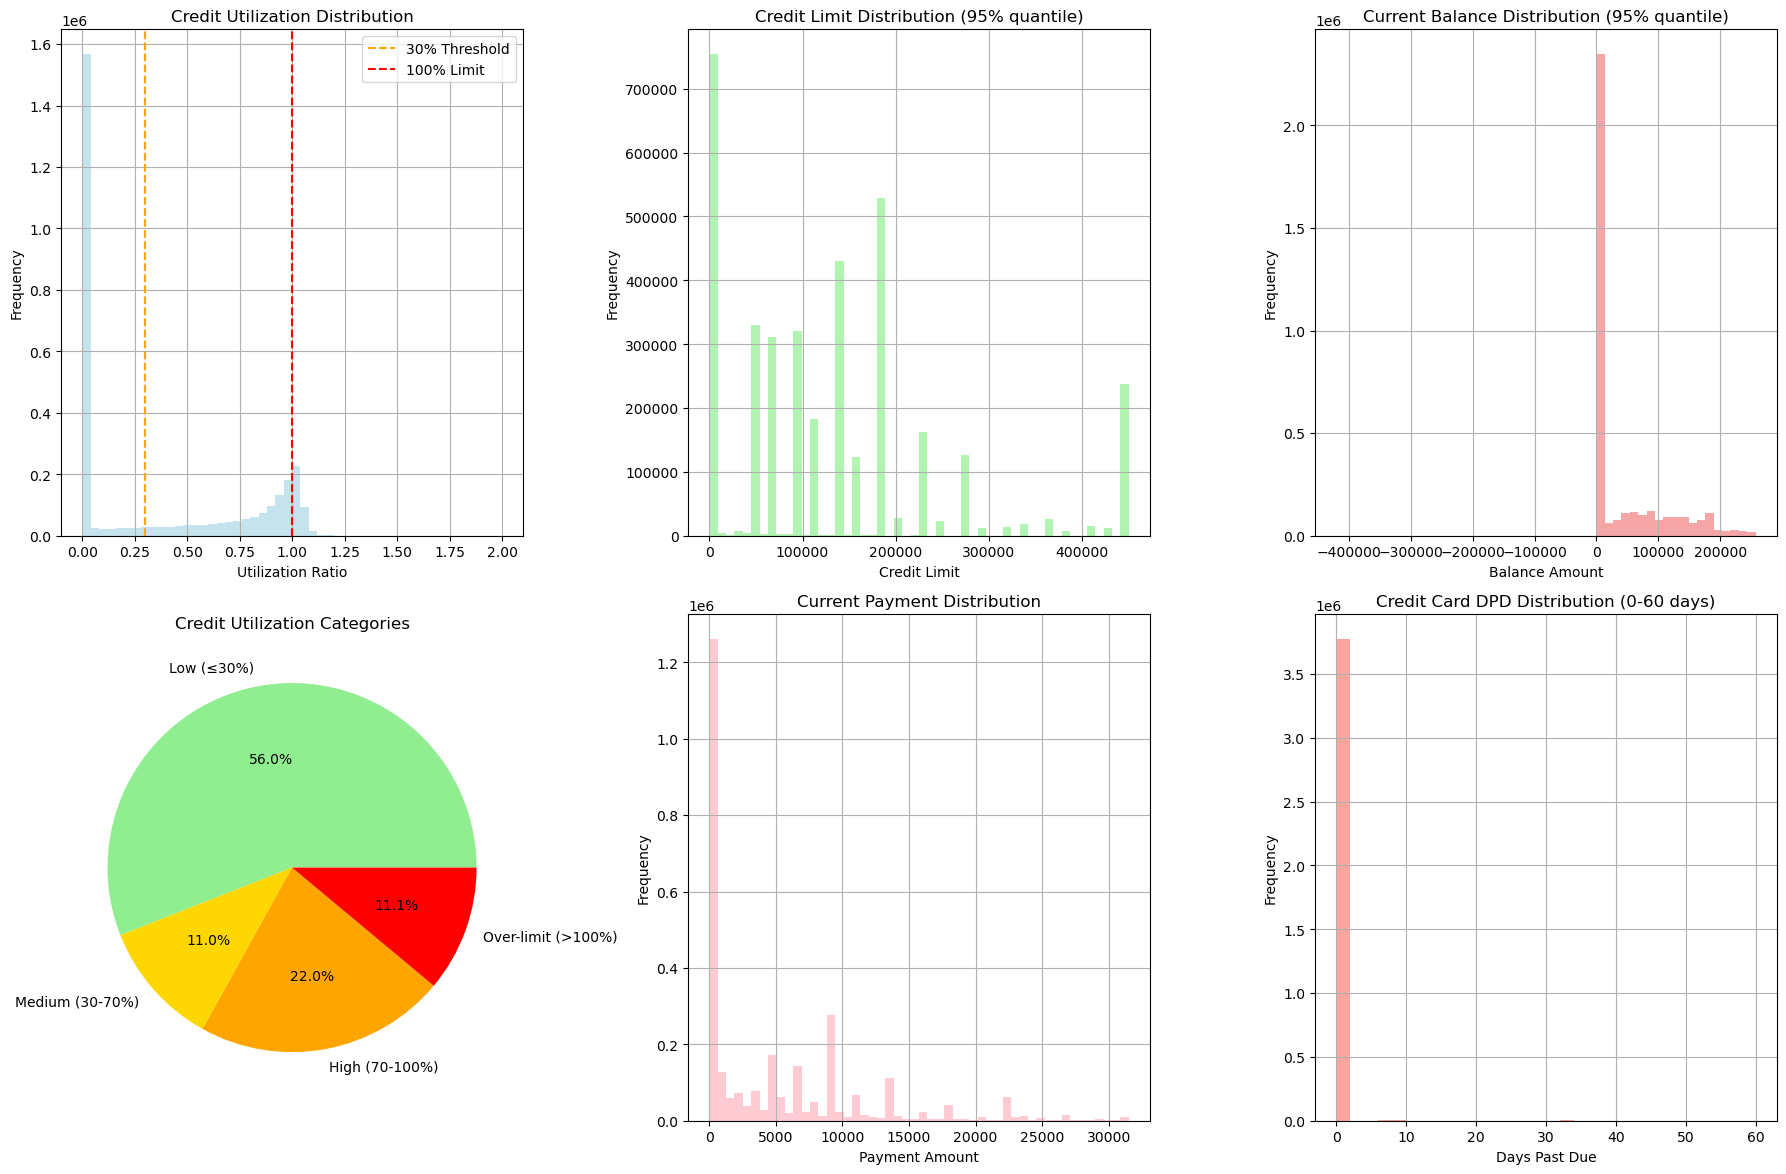

In [211]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Credit Utilization Distribution
util_filtered = credit_card['CREDIT_UTILIZATION'][(credit_card['CREDIT_UTILIZATION'] >= 0) & 
                                                         (credit_card['CREDIT_UTILIZATION'] <= 2)]
util_filtered.hist(bins=50, ax=axes[0,0], alpha=0.7, color='lightblue')
axes[0,0].set_title('Credit Utilization Distribution')
axes[0,0].set_xlabel('Utilization Ratio')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(0.3, color='orange', linestyle='--', label='30% Threshold')
axes[0,0].axvline(1.0, color='red', linestyle='--', label='100% Limit')
axes[0,0].legend()

# Credit Limit Distribution
limit_filtered = credit_card['AMT_CREDIT_LIMIT_ACTUAL'][credit_card['AMT_CREDIT_LIMIT_ACTUAL'] <= 
                                                               credit_card['AMT_CREDIT_LIMIT_ACTUAL'].quantile(0.95)]
limit_filtered.hist(bins=50, ax=axes[0,1], alpha=0.7, color='lightgreen')
axes[0,1].set_title('Credit Limit Distribution (95% quantile)')
axes[0,1].set_xlabel('Credit Limit')
axes[0,1].set_ylabel('Frequency')

# Current Balance Distribution
balance_filtered = credit_card['AMT_BALANCE'][credit_card['AMT_BALANCE'] <= 
                                                     credit_card['AMT_BALANCE'].quantile(0.95)]
balance_filtered.hist(bins=50, ax=axes[0,2], alpha=0.7, color='lightcoral')
axes[0,2].set_title('Current Balance Distribution (95% quantile)')
axes[0,2].set_xlabel('Balance Amount')
axes[0,2].set_ylabel('Frequency')

# Credit Utilization Categories
util_labels = ['Low (≤30%)', 'Medium (30-70%)', 'High (70-100%)', 'Over-limit (>100%)']
util_counts = [util_low, util_medium, util_high, util_over]
axes[1,0].pie(util_counts, labels=util_labels, autopct='%1.1f%%',
             colors=['lightgreen', 'gold', 'orange', 'red'])
axes[1,0].set_title('Credit Utilization Categories')

# Current Payment Distribution
payment_filtered = credit_card['AMT_PAYMENT_CURRENT'][credit_card['AMT_PAYMENT_CURRENT'] <= 
                                                             credit_card['AMT_PAYMENT_CURRENT'].quantile(0.95)]
payment_filtered.hist(bins=50, ax=axes[1,1], alpha=0.7, color='lightpink')
axes[1,1].set_title('Current Payment Distribution')
axes[1,1].set_xlabel('Payment Amount')
axes[1,1].set_ylabel('Frequency')

# Credit Card DPD Distribution
dpd_cc_filtered = credit_card['SK_DPD'][credit_card['SK_DPD'] <= 60]
dpd_cc_filtered.hist(bins=30, ax=axes[1,2], alpha=0.7, color='salmon')
axes[1,2].set_title('Credit Card DPD Distribution (0-60 days)')
axes[1,2].set_xlabel('Days Past Due')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 4.3.3 Key Insights
1. ~50% of applicants are first-time Home Credit customers
2. ~67% have external credit history (bureau data)
3. Payment behavior data covers ~30-40% of applicants
4. Strong predictive patterns in payment timing and amounts
5. Historical payment discipline is highly predictive of future default

##### 4.3.4 Next Steps
1. All 7 tables explored
2. Ready for comprehensive data cleaning and feature engineering
3. Ready for EDA visualizations connecting features to target variable
4. Ready for preliminary ML model development

# Data Cleaning & Feature Engineering

# 1. Handle Train Set and Test Set

#### 1. Load Data

In [212]:
# Load training dataset and testing dataset
train_app = pd.read_csv('./Dataset/application_train.csv')
test_app = pd.read_csv('./Dataset/application_test.csv')

In [213]:
print(f"Application Train: {train_app.shape}")
print(f"Application Test: {test_app.shape}")
print(f"Target in train: {train_app['TARGET'].value_counts().to_dict()}")

Application Train: (307511, 122)
Application Test: (48744, 121)
Target in train: {0: 282686, 1: 24825}


In [214]:
# Check missing values in training dataset
missing_train = train_app.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
missing_train

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [215]:
# Data types
train_app.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

#### 2.Handle missing values

In [216]:
missing_pct = (train_app.isnull().sum() / len(train_app)) * 100
missing_pct

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [217]:
missing_pct.sort_values(ascending=False).head(10)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
dtype: float64

In [218]:
threshold = 65
cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()

In [219]:
# Handle missing values in training set
app_train_clean = train_app.drop(columns=cols_to_drop)
app_train_clean.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 105 columns]

In [220]:
app_train_clean.shape

(307511, 105)

In [221]:
fill_values = {}

In [222]:
for col in app_train_clean.columns:
    if col in ['SK_ID_CURR', 'TARGET']:
        continue

    if app_train_clean[col].isnull().sum() > 0:
        missing_pct_col = (app_train_clean[col].isnull().sum() / len(app_train_clean)) * 100

        if missing_pct_col > 50:
            app_train_clean[f'{col}_MISSING'] = app_train_clean[col].isnull().astype(int)

        if app_train_clean[col].dtype == 'object':
            mode_val = app_train_clean[col].mode()
            if len(mode_val) > 0:
                fill_val = mode_val[0]
            else:
                fill_val = 'Unknown'
            fill_values[col] = fill_val
        else:
            if 'AMT_' in col:
                # Use median to prevent outliers
                fill_val = app_train_clean[col].median()
            elif 'DAYS_' in col:
                # refer to not applicable
                fill_val = 0
            elif col.startswith('FLAG_'):
                fill_val = 0
            else:
                fill_val = app_train_clean[col].mean()
            fill_values[col] = fill_val

In [223]:
for col, fill_val in fill_values.items():
    app_train_clean[col].fillna(fill_val, inplace=True)

In [224]:
# Train set shape
app_train_clean.shape

(307511, 129)

In [225]:
# Missing values after cleaning
app_train_clean.isnull().sum().sum()

0

In [226]:
# Apply same transformations to test set
app_test_clean = test_app.drop(columns=[col for col in cols_to_drop if col in test_app.columns])

In [227]:
for col in app_train_clean.columns:
    if col.endswith('_MISSING') and col not in app_test_clean.columns:
        original_col = col.replace('_MISSING', '')
        if original_col in app_test_clean.columns:
            app_test_clean[col] = app_test_clean[original_col].isnull().astype(int)
            
for col, fill_val in fill_values.items():
    if col in app_test_clean.columns:
        app_test_clean[col].fillna(fill_val, inplace=True)

In [228]:
# Test set shape
app_test_clean.shape

(48744, 128)

In [229]:
# Missing values in test
app_test_clean.isnull().sum().sum()

0

#### 3. Handle Outliers

In [230]:
outlier_bounds = {}

In [231]:
numeric_cols = app_train_clean.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['SK_ID_CURR', 'TARGET'] 
                and not col.endswith('_MISSING')]
numeric_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGARE

In [232]:
# IQR method
for col in numeric_cols:
    Q1 = app_train_clean[col].quantile(0.25)
    Q3 = app_train_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if col.startswith('DAYS_'):
        upper_bound = min(upper_bound, 0)
        if 'BIRTH' in col or 'EMPLOYED' in col:
            lower_bound = max(lower_bound, -25000)

    elif col.startswith('AMT_'):
        lower_bound = max(lower_bound, 0)

    elif col.startswith('FLAG_'):
        continue

    outlier_bounds[col] = {'lower': lower_bound, 'upper': upper_bound}

    app_train_clean.loc[app_train_clean[col] < lower_bound, col] = lower_bound
    app_train_clean.loc[app_train_clean[col] > upper_bound, col] = upper_bound

In [233]:
len(outlier_bounds)

62

In [234]:
for col, bounds in outlier_bounds.items():
    if col in app_test_clean.columns:
        app_test_clean.loc[app_test_clean[col] < bounds['lower'], col] = bounds['lower']
        app_test_clean.loc[app_test_clean[col] > bounds['upper'], col] = bounds['upper']

#### 4. Create New Features

In [235]:
# Create age features
app_train_clean['AGE_YEARS'] = -app_train_clean['DAYS_BIRTH'] / 365

In [236]:
app_test_clean['AGE_YEARS'] = -app_test_clean['DAYS_BIRTH'] / 365

In [237]:
# Create employment features
app_train_clean['EMPLOYED_YEARS'] = -app_train_clean['DAYS_EMPLOYED'] / 365
app_test_clean['EMPLOYED_YEARS'] = -app_test_clean['DAYS_EMPLOYED'] / 365

In [238]:
# Create registration features
app_train_clean['REGISTRATION_YEARS'] = -app_train_clean['DAYS_REGISTRATION'] / 365
app_test_clean['REGISTRATION_YEARS'] = -app_test_clean['DAYS_REGISTRATION'] / 365

In [239]:
# Create Id publish features
app_train_clean['ID_PUBLISH_YEARS'] = -app_train_clean['DAYS_ID_PUBLISH'] / 365
app_test_clean['ID_PUBLISH_YEARS'] = -app_test_clean['DAYS_ID_PUBLISH'] / 365

In [240]:
# Create ratio features
# Create credit income ratio
app_train_clean['CREDIT_INCOME_RATIO'] = app_train_clean['AMT_CREDIT'] / app_train_clean['AMT_INCOME_TOTAL']
app_test_clean['CREDIT_INCOME_RATIO'] = app_test_clean['AMT_CREDIT'] / app_test_clean['AMT_INCOME_TOTAL']

In [241]:
# Create annuity income reatio
app_train_clean['ANNUITY_INCOME_RATIO'] = app_train_clean['AMT_ANNUITY'] / app_train_clean['AMT_INCOME_TOTAL']
app_test_clean['ANNUITY_INCOME_RATIO'] = app_test_clean['AMT_ANNUITY'] / app_test_clean['AMT_INCOME_TOTAL']

In [242]:
# Create annuity credit ratio
app_train_clean['ANNUITY_CREDIT_RATIO'] = app_train_clean['AMT_ANNUITY'] / app_train_clean['AMT_CREDIT']
app_test_clean['ANNUITY_CREDIT_RATIO'] = app_test_clean['AMT_ANNUITY'] / app_test_clean['AMT_CREDIT']

In [243]:
# Create goods price ratio
app_train_clean['GOODS_PRICE_RATIO'] = app_train_clean['AMT_GOODS_PRICE'] / app_train_clean['AMT_CREDIT']
app_test_clean['GOODS_PRICE_RATIO'] = app_test_clean['AMT_GOODS_PRICE'] / app_test_clean['AMT_CREDIT']

In [244]:
# Create income per person
app_train_clean['INCOME_PER_PERSON'] = app_train_clean['AMT_INCOME_TOTAL'] / app_train_clean['CNT_FAM_MEMBERS']
app_test_clean['INCOME_PER_PERSON'] = app_test_clean['AMT_INCOME_TOTAL'] / app_test_clean['CNT_FAM_MEMBERS']

In [245]:
# Create children ratio
app_train_clean['CHILDREN_RATIO'] = app_train_clean['CNT_CHILDREN'] / app_train_clean['CNT_FAM_MEMBERS']
app_test_clean['CHILDREN_RATIO'] = app_test_clean['CNT_CHILDREN'] / app_test_clean['CNT_FAM_MEMBERS']

In [246]:
# Create employed age ratio
app_train_clean['EMPLOYED_AGE_RATIO'] = app_train_clean['EMPLOYED_YEARS'] / app_train_clean['AGE_YEARS']
app_test_clean['EMPLOYED_AGE_RATIO'] = app_test_clean['EMPLOYED_YEARS'] / app_test_clean['AGE_YEARS']

In [247]:
app_train_clean['EMPLOYED_AGE_RATIO'] = app_train_clean['EMPLOYED_AGE_RATIO'].clip(0, 1)
app_test_clean['EMPLOYED_AGE_RATIO'] = app_test_clean['EMPLOYED_AGE_RATIO'].clip(0, 1)

In [248]:
# Average weighted on external sources
ext_sources = [col for col in app_train_clean.columns if 'EXT_SOURCE' in col and not col.endswith('_MISSING')]
ext_sources

['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [249]:
app_train_clean['EXT_SOURCE_MEAN'] = app_train_clean[ext_sources].mean(axis=1)
app_test_clean['EXT_SOURCE_MEAN'] = app_test_clean[ext_sources].mean(axis=1)

In [250]:
app_train_clean['EXT_SOURCE_WEIGHTED'] = (app_train_clean[ext_sources[0]] * 0.5 + 
                                                   app_train_clean[ext_sources[1]] * 0.3 + 
                                                   app_train_clean[ext_sources[2]] * 0.2)
app_test_clean['EXT_SOURCE_WEIGHTED'] = (app_test_clean[ext_sources[0]] * 0.5 + 
                                                  app_test_clean[ext_sources[1]] * 0.3 + 
                                                  app_test_clean[ext_sources[2]] * 0.2)

In [251]:
# Count the number of documents
doc_cols = [col for col in app_train_clean.columns if col.startswith('FLAG_DOCUMENT_')]
doc_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [252]:
app_train_clean['DOCUMENTS_COUNT'] = app_train_clean[doc_cols].sum(axis=1)
app_test_clean['DOCUMENTS_COUNT'] = app_test_clean[doc_cols].sum(axis=1)

#### 5. Encoding categorical variables

In [253]:
categorical_cols = app_train_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [254]:
if 'TARGET' in categorical_cols:
    categorical_cols.remove('TARGET')

In [255]:
encoders = {}

In [256]:
for col in categorical_cols:
    le = LabelEncoder()
    
    le.fit(app_train_clean[col].astype(str))
    encoders[col] = le
    app_train_clean[col] = le.transform(app_train_clean[col].astype(str))
    
    test_values = app_test_clean[col].astype(str)
    app_test_clean[col] = test_values.apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

#### 6. Check the results

In [257]:
app_train_clean.shape

(307511, 143)

In [258]:
app_test_clean.shape

(48744, 142)

In [259]:
# Missing values
app_train_clean.isnull().sum().sum()

0

In [260]:
app_test_clean.isnull().sum().sum()

0

In [261]:
# Data types in train
app_train_clean.dtypes.value_counts()

int64      77
float64    66
Name: count, dtype: int64

In [262]:
train_cols = set(app_train_clean.columns) - {'TARGET'}
test_cols = set(app_test_clean.columns)
if train_cols == test_cols:
    print("\nTrain and test have matching columns")


Train and test have matching columns


## 2. Handle Bureau Table

In [263]:
# Load data
bureau = pd.read_csv('./Dataset/bureau.csv')

In [264]:
bureau.shape

(1716428, 17)

In [265]:
# Check missing values
bureau_missing = bureau.isnull().sum()
bureau_missing

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [266]:
# Handle missing values
numeric_cols_bureau = bureau.select_dtypes(include=[np.number]).columns
for col in numeric_cols_bureau:
    if bureau[col].isnull().sum() > 0:
        if 'AMT_' in col:
            bureau[col].fillna(0, inplace=True)  
        elif 'DAYS_' in col:
            bureau[col].fillna(0, inplace=True) 
        elif 'CNT_' in col:
            bureau[col].fillna(0, inplace=True) 
        else:
            bureau[col].fillna(bureau[col].median(), inplace=True)

In [267]:
categorical_cols_bureau = bureau.select_dtypes(include=['object']).columns
for col in categorical_cols_bureau:
    if bureau[col].isnull().sum() > 0:
        mode_val = bureau[col].mode()
        if len(mode_val) > 0:
            bureau[col].fillna(mode_val[0], inplace=True)
        else:
            bureau[col].fillna('Unknown', inplace=True)

In [268]:
bureau.isnull().sum().sum()

0

In [269]:
# Aggregate
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
        'SK_ID_BUREAU': 'count',  
        'DAYS_CREDIT': 'mean',  
        'CREDIT_DAY_OVERDUE': 'max', 
        'AMT_CREDIT_SUM': 'mean',  
        'AMT_CREDIT_SUM_DEBT': 'mean'  
    }).reset_index()

In [270]:
bureau_agg.columns = ['SK_ID_CURR', 'BUREAU_LOAN_COUNT', 'BUREAU_DAYS_CREDIT_MEAN',
                         'BUREAU_MAX_OVERDUE', 'BUREAU_CREDIT_MEAN', 'BUREAU_DEBT_MEAN']

In [271]:
app_train_clean = app_train_clean.merge(bureau_agg, on='SK_ID_CURR', how='left')
app_test_clean = app_test_clean.merge(bureau_agg, on='SK_ID_CURR', how='left')

In [272]:
bureau_cols = [col for col in bureau_agg.columns if col != 'SK_ID_CURR']
app_train_clean[bureau_cols] = app_train_clean[bureau_cols].fillna(0)
app_test_clean[bureau_cols] = app_test_clean[bureau_cols].fillna(0)

In [273]:
len(bureau_cols)

5

In [274]:
app_train_clean.shape

(307511, 148)

In [275]:
app_test_clean.shape

(48744, 147)

## 3. Handle Previous Application Table

In [276]:
# Load data
prev_app = pd.read_csv('./Dataset/previous_application.csv')

In [277]:
prev_app.shape

(1670214, 37)

In [278]:
# Check missing values
prev_missing = prev_app.isnull().sum().sort_values(ascending=False)
prev_missing

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [279]:
# Handle missing values
numeric_cols_prev = prev_app.select_dtypes(include=[np.number]).columns
for col in numeric_cols_prev:
        if prev_app[col].isnull().sum() > 0:
            if 'AMT_' in col or 'CNT_' in col:
                prev_app[col].fillna(0, inplace=True)
            elif 'DAYS_' in col:
                prev_app[col].fillna(0, inplace=True)
            elif 'RATE_' in col:
                prev_app[col].fillna(prev_app[col].median(), inplace=True)
            else:
                prev_app[col].fillna(0, inplace=True)

In [280]:
categorical_cols_prev = prev_app.select_dtypes(include=['object']).columns
for col in categorical_cols_prev:
    if prev_app[col].isnull().sum() > 0:
        prev_app[col].fillna('Unknown', inplace=True)

In [281]:
prev_app.isnull().sum().sum()

0

In [282]:
# Aggregate
prev_agg = prev_app.groupby('SK_ID_CURR').agg({
        'SK_ID_PREV': 'count', 
        'AMT_APPLICATION': 'mean',  
        'AMT_CREDIT': 'mean', 
        'DAYS_DECISION': 'mean'  
    }).reset_index()

In [283]:
prev_agg.columns = ['SK_ID_CURR', 'PREV_APP_COUNT', 'PREV_AMT_APPLICATION_MEAN',
                       'PREV_AMT_CREDIT_MEAN', 'PREV_DAYS_DECISION_MEAN']

In [284]:
app_train_clean = app_train_clean.merge(prev_agg, on='SK_ID_CURR', how='left')
app_test_clean = app_test_clean.merge(prev_agg, on='SK_ID_CURR', how='left')

In [285]:
prev_cols = [col for col in prev_agg.columns if col != 'SK_ID_CURR']
app_train_clean[prev_cols] = app_train_clean[prev_cols].fillna(0)
app_test_clean[prev_cols] = app_test_clean[prev_cols].fillna(0)

In [286]:
len(prev_cols)

4

In [287]:
app_train_clean.shape

(307511, 152)

In [288]:
app_test_clean.shape

(48744, 151)

## 4. Handle Installments Payments

In [289]:
# Load data
installments = pd.read_csv('./Dataset/installments_payments.csv')

In [290]:
installments.shape

(13605401, 8)

In [291]:
# Check missing values
installments.isnull().sum().sum()

5810

In [292]:
# Handle missing values
numeric_cols_inst = installments.select_dtypes(include=[np.number]).columns
for col in numeric_cols_inst:
    if installments[col].isnull().sum() > 0:
        installments[col].fillna(0, inplace=True)

In [293]:
if 'AMT_PAYMENT' in installments.columns and 'AMT_INSTALMENT' in installments.columns:
        installments['PAYMENT_RATIO'] = installments['AMT_PAYMENT'] / (installments['AMT_INSTALMENT'] + 0.001)
    
if 'DAYS_ENTRY_PAYMENT' in installments.columns and 'DAYS_INSTALMENT' in installments.columns:
    installments['PAYMENT_DELAY'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']

In [294]:
# Aggregate
inst_agg = installments.groupby('SK_ID_CURR').agg({
        'SK_ID_PREV': 'nunique', 
        'NUM_INSTALMENT_NUMBER': 'max',  
        'AMT_INSTALMENT': 'mean', 
        'AMT_PAYMENT': 'mean',  
        'PAYMENT_RATIO': 'mean',  
        'PAYMENT_DELAY': ['mean', 'max']  
    }).reset_index()

In [295]:
inst_agg.columns = ['SK_ID_CURR', 'INST_LOAN_COUNT', 'INST_MAX_INSTALLMENTS',
                       'INST_AMT_MEAN', 'INST_PAYMENT_MEAN', 'INST_PAYMENT_RATIO_MEAN',
                       'INST_DELAY_MEAN', 'INST_DELAY_MAX']

In [296]:
app_train_clean = app_train_clean.merge(inst_agg, on='SK_ID_CURR', how='left')
app_test_clean = app_test_clean.merge(inst_agg, on='SK_ID_CURR', how='left')

In [297]:
inst_cols = [col for col in inst_agg.columns if col != 'SK_ID_CURR']
app_train_clean[inst_cols] = app_train_clean[inst_cols].fillna(0)
app_test_clean[inst_cols] = app_test_clean[inst_cols].fillna(0)

In [298]:
len(inst_cols)

7

In [299]:
app_train_clean.shape

(307511, 159)

In [300]:
app_test_clean.shape

(48744, 158)

## 5. Handle POS Cash Balance

In [301]:
# Load data
pos_cash = pd.read_csv('./Dataset/POS_CASH_balance.csv')

In [302]:
pos_cash.shape

(10001358, 8)

In [303]:
# Check missing data
pos_cash.isnull().sum().sum()

52158

In [304]:
# Handle missing data
numeric_cols_pos = pos_cash.select_dtypes(include=[np.number]).columns
for col in numeric_cols_pos:
    if pos_cash[col].isnull().sum() > 0:
        pos_cash[col].fillna(0, inplace=True)

In [305]:
categorical_cols_pos = pos_cash.select_dtypes(include=['object']).columns
for col in categorical_cols_pos:
    if pos_cash[col].isnull().sum() > 0:
        pos_cash[col].fillna('Unknown', inplace=True)

In [306]:
pos_cash.isnull().sum().sum()

0

In [307]:
# Aggregate
pos_agg = pos_cash.groupby('SK_ID_CURR').agg({
        'SK_ID_PREV': 'nunique',  
        'MONTHS_BALANCE': 'count',  
        'CNT_INSTALMENT': 'mean', 
        'CNT_INSTALMENT_FUTURE': 'mean',  
        'SK_DPD': ['mean', 'max'], 
        'SK_DPD_DEF': ['mean', 'max'] 
    }).reset_index()

In [308]:
pos_agg.columns = ['SK_ID_CURR', 'POS_LOAN_COUNT', 'POS_MONTHS_COUNT',
                  'POS_CNT_INSTALMENT_MEAN', 'POS_CNT_INSTALMENT_FUTURE_MEAN',
                  'POS_DPD_MEAN', 'POS_DPD_MAX', 'POS_DPD_DEF_MEAN', 'POS_DPD_DEF_MAX']

In [309]:
app_train_clean = app_train_clean.merge(pos_agg, on='SK_ID_CURR', how='left')
app_test_clean = app_test_clean.merge(pos_agg, on='SK_ID_CURR', how='left')

In [310]:
pos_cols = [col for col in pos_agg.columns if col != 'SK_ID_CURR']
app_train_clean[pos_cols] = app_train_clean[pos_cols].fillna(0)
app_test_clean[pos_cols] = app_test_clean[pos_cols].fillna(0)

In [311]:
len(pos_cols)

8

In [312]:
app_train_clean.shape

(307511, 167)

In [313]:
app_test_clean.shape

(48744, 166)

## 6. Handle Credit Card Balance

In [314]:
credit_card = pd.read_csv('./Dataset/credit_card_balance.csv')

In [315]:
credit_card.shape

(3840312, 23)

In [316]:
cc_missing = credit_card.isnull().sum().sort_values(ascending=False)
cc_missing

AMT_PAYMENT_CURRENT           767988
AMT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_POS_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
AMT_INST_MIN_REGULARITY       305236
SK_ID_PREV                         0
AMT_TOTAL_RECEIVABLE               0
SK_DPD                             0
NAME_CONTRACT_STATUS               0
CNT_DRAWINGS_CURRENT               0
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECIVABLE                      0
AMT_RECEIVABLE_PRINCIPAL           0
SK_ID_CURR                         0
AMT_DRAWINGS_CURRENT               0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_BALANCE                        0
MONTHS_BALANCE                     0
SK_DPD_DEF                         0
dtype: int64

In [317]:
numeric_cols_cc = credit_card.select_dtypes(include=[np.number]).columns
for col in numeric_cols_cc:
    if credit_card[col].isnull().sum() > 0:
        credit_card[col].fillna(0, inplace=True)

In [318]:
categorical_cols_cc = credit_card.select_dtypes(include=['object']).columns
for col in categorical_cols_cc:
    if credit_card[col].isnull().sum() > 0:
        credit_card[col].fillna('Unknown', inplace=True)

In [319]:
credit_card.isnull().sum().sum()

0

In [320]:
if 'AMT_BALANCE' in credit_card.columns and 'AMT_CREDIT_LIMIT_ACTUAL' in credit_card.columns:
        credit_card['CREDIT_UTILIZATION'] = credit_card['AMT_BALANCE'] / (credit_card['AMT_CREDIT_LIMIT_ACTUAL'] + 0.001)

In [321]:
# Aggregate
cc_agg = credit_card.groupby('SK_ID_CURR').agg({
        'SK_ID_PREV': 'nunique',  
        'MONTHS_BALANCE': 'count',  
        'AMT_BALANCE': 'mean',  
        'AMT_CREDIT_LIMIT_ACTUAL': 'mean',  
        'AMT_DRAWINGS_CURRENT': 'mean',  
        'AMT_PAYMENT_CURRENT': 'mean',  
        'CNT_DRAWINGS_CURRENT': 'sum',  
        'SK_DPD': ['mean', 'max'],  
        'CREDIT_UTILIZATION': 'mean'  
    }).reset_index()

In [322]:
cc_agg.columns = ['SK_ID_CURR', 'CC_COUNT', 'CC_MONTHS_COUNT', 'CC_BALANCE_MEAN',
                     'CC_LIMIT_MEAN', 'CC_DRAWINGS_MEAN', 'CC_PAYMENT_MEAN',
                     'CC_DRAWINGS_TOTAL', 'CC_DPD_MEAN', 'CC_DPD_MAX', 'CC_UTILIZATION_MEAN']

In [323]:
app_train_clean = app_train_clean.merge(cc_agg, on='SK_ID_CURR', how='left')
app_test_clean = app_test_clean.merge(cc_agg, on='SK_ID_CURR', how='left')

In [324]:
cc_cols = [col for col in cc_agg.columns if col != 'SK_ID_CURR']
app_train_clean[cc_cols] = app_train_clean[cc_cols].fillna(0)
app_test_clean[cc_cols] = app_test_clean[cc_cols].fillna(0)

In [325]:
len(cc_cols)

10

In [326]:
app_train_clean.shape

(307511, 177)

In [327]:
app_test_clean.shape

(48744, 176)

## 7. Handle Bureau Balance Table

In [328]:
# Load data
bureau_balance = pd.read_csv('./Dataset/bureau_balance.csv')

In [329]:
bureau_balance.shape

(27299925, 3)

In [330]:
bureau_balance.isnull().sum().sum()

0

In [331]:
# Aggregate
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
        'MONTHS_BALANCE': 'count',  
        'STATUS': [
            lambda x: (x == 'C').sum(),  
            lambda x: (x == 'X').sum(),  
            lambda x: (x.isin(['1', '2', '3', '4', '5'])).sum()  
        ]
    }).reset_index()

In [332]:
bb_agg.columns = ['SK_ID_BUREAU', 'BB_MONTHS', 'BB_STATUS_CLOSED', 'BB_STATUS_UNKNOWN', 'BB_STATUS_DPD']

In [333]:
bureau_full = bureau.merge(bb_agg, on='SK_ID_BUREAU', how='left')

In [334]:
bb_cols_in_bureau = ['BB_MONTHS', 'BB_STATUS_CLOSED', 'BB_STATUS_UNKNOWN', 'BB_STATUS_DPD']
for col in bb_cols_in_bureau:
    if col in bureau_full.columns:
        bureau_full[col].fillna(0, inplace=True)

In [335]:
bb_client_agg = bureau_full.groupby('SK_ID_CURR').agg({
            'BB_MONTHS': 'sum',
            'BB_STATUS_CLOSED': 'sum',
            'BB_STATUS_DPD': 'sum'
        }).reset_index()

In [336]:
bb_client_agg.columns = ['SK_ID_CURR', 'BUREAU_BALANCE_MONTHS_TOTAL',
                                'BUREAU_BALANCE_CLOSED_TOTAL', 'BUREAU_BALANCE_DPD_TOTAL']

In [337]:
app_train_clean = app_train_clean.merge(bb_client_agg, on='SK_ID_CURR', how='left')
app_test_clean = app_test_clean.merge(bb_client_agg, on='SK_ID_CURR', how='left')

In [338]:
bb_cols = [col for col in bb_client_agg.columns if col != 'SK_ID_CURR']
app_train_clean[bb_cols] = app_train_clean[bb_cols].fillna(0)
app_test_clean[bb_cols] = app_test_clean[bb_cols].fillna(0)

In [339]:
len(bb_cols)

3

In [340]:
app_train_clean.shape

(307511, 180)

In [341]:
app_test_clean.shape

(48744, 179)

## 8. Final Data Overview

In [342]:
original_features = train_app.shape[1]
original_features

122

In [343]:
new_features = app_train_clean.shape[1] - original_features
new_features

58

In [344]:
app_train_clean.isnull().sum().sum()

0

In [345]:
app_test_clean.isnull().sum().sum()

0

In [346]:
train_cols = set(app_train_clean.columns) - {'TARGET'}
test_cols = set(app_test_clean.columns)

In [347]:
if train_cols == test_cols:
    print(f"Train and test have matching columns")

Train and test have matching columns


In [348]:
feature_groups = {
    'Original': [],
    'Time-based': [],
    'Ratio': [],
    'Bureau': [],
    'Previous App': [],
    'Installments': [],
    'POS Cash': [],
    'Credit Card': [],
    'Other': []
}

In [349]:
for col in app_train_clean.columns:
    if col in ['SK_ID_CURR', 'TARGET']:
        continue
    elif 'YEARS' in col or 'AGE' in col:
        feature_groups['Time-based'].append(col)
    elif 'RATIO' in col or 'PER_PERSON' in col:
        feature_groups['Ratio'].append(col)
    elif col.startswith('BUREAU'):
        feature_groups['Bureau'].append(col)
    elif col.startswith('PREV'):
        feature_groups['Previous App'].append(col)
    elif col.startswith('INST'):
        feature_groups['Installments'].append(col)
    elif col.startswith('POS'):
        feature_groups['POS Cash'].append(col)
    elif col.startswith('CC'):
        feature_groups['Credit Card'].append(col)
    elif col.endswith('_MISSING') or col in ['DOCUMENTS_COUNT', 'ENQUIRIES_COUNT', 'EXT_SOURCE_MEAN', 'EXT_SOURCE_WEIGHTED']:
        feature_groups['Other'].append(col)
    else:
        feature_groups['Original'].append(col)

In [350]:
feature_groups

{'Original': ['NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_ID_PUBLISH',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'REGION_RATING_CLIENT',
  'REGION_RATING_CLIENT_W_CITY',
  'WEEKDAY_APPR_PROCESS_START',
  'HOUR_APPR_PROCESS_START',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'ORGANIZATION_TYPE',
  'EXT_SOURCE_1',
  'EXT_SOURCE_2',
  'EXT_SOURCE_3',
  'APARTMENTS_AVG',
  'BASEMENTAREA_AVG',
  'ELEVATORS_AVG',
  'ENTRANCES_AVG',

In [351]:
print(f"\nFeature groups:")
for group, features in feature_groups.items():
    if len(features) > 0:
        print(f"  {group}: {len(features)} features")


Feature groups:
  Original: 99 features
  Time-based: 8 features
  Ratio: 8 features
  Bureau: 8 features
  Previous App: 4 features
  Installments: 6 features
  POS Cash: 8 features
  Credit Card: 10 features
  Other: 27 features


## 9. Save Data

In [353]:
app_train_clean.to_csv('./Dataset/application_train_cleaned.csv', index=False)
app_test_clean.to_csv('./Dataset/application_test_cleaned.csv', index=False)